## Test Model 2030

In [423]:
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
from pypsa.plot import add_legend_patches
import gurobipy
import cartopy.crs as ccrs
from pypsa.optimization import optimize
import matplotlib.cm as cm
import numpy as np

pd.set_option("display.max_rows", None)  # Display all rows
pd.set_option("display.max_columns", None)  # Display all columns


## Import Network

In [739]:
n = pypsa.Network("C:\\Users\\Jeremy\\Documents\\MasterThesis\\Models\\Model_DE\\3nodes\\elec_s_3_ec_lv1.5_Co2L0.45-3h.nc")


INFO:pypsa.io:Imported network elec_s_3_ec_lv1.5_Co2L0.45-3h.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [740]:
n.global_constraints.loc['CO2Limit','constant'] = 200000000 #TCO2 184500000

In [741]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 6 entries
Component 'Carrier' has 23 entries
Component 'GlobalConstraint' has 2 entries
Component 'Line' has 3 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 9 entries
Component 'Load' has 3 entries
Component 'Generator' has 43 entries
Component 'StorageUnit' has 7 entries
Component 'Store' has 3 entries


In [742]:
#remove nuclear fleet from germany
n.generators.loc[n.generators.index.str.endswith('nuclear'), 'p_nom'] = 0


In [743]:
# set marginal cost of load shedding to 3000€/MWh
for bus in n.generators.bus:
    for index in n.generators.index:
        if not bus.endswith('H2') and index.endswith('load'):
            n.generators.loc[index, 'marginal_cost'] = 3000

#edit load shedding's unit from kW to MW
for index in n.generators.index:
    if index.endswith('load') and not index.endswith('H2 load'):
        n.generators.loc[index, 'sign'] = 1

In [744]:
#solve network
n.optimize(solver_name='gurobi')
#n.lopf(solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 15/15 [00:00<00:00, 15.04it/s]
INFO:linopy.io: Writing time: 7.1s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1vtgw0g2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1vtgw0g2.lp


Reading time = 2.31 seconds


INFO:gurobipy:Reading time = 2.31 seconds


obj: 511049 rows, 242381 columns, 996354 nonzeros


INFO:gurobipy:obj: 511049 rows, 242381 columns, 996354 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 511049 rows, 242381 columns and 996354 nonzeros


INFO:gurobipy:Optimize a model with 511049 rows, 242381 columns and 996354 nonzeros


Model fingerprint: 0xe855f806


INFO:gurobipy:Model fingerprint: 0xe855f806


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 9e+09]


INFO:gurobipy:  Bounds range     [3e+01, 9e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 352783 rows and 49090 columns


INFO:gurobipy:Presolve removed 352783 rows and 49090 columns


Presolve time: 0.83s


INFO:gurobipy:Presolve time: 0.83s


Presolved: 158266 rows, 193291 columns, 576962 nonzeros


INFO:gurobipy:Presolved: 158266 rows, 193291 columns, 576962 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.21s


INFO:gurobipy:Ordering time: 0.21s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 31


INFO:gurobipy: Dense cols : 31


 AA' NZ     : 4.713e+05


INFO:gurobipy: AA' NZ     : 4.713e+05


 Factor NZ  : 2.240e+06 (roughly 160 MB of memory)


INFO:gurobipy: Factor NZ  : 2.240e+06 (roughly 160 MB of memory)


 Factor Ops : 6.702e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.702e+07 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81333899e+19 -7.34524995e+19  1.73e+13 2.04e+06  2.82e+15     2s


INFO:gurobipy:   0   1.81333899e+19 -7.34524995e+19  1.73e+13 2.04e+06  2.82e+15     2s


   1   1.45148841e+19 -2.74638924e+19  1.45e+13 6.09e+05  1.61e+15     2s


INFO:gurobipy:   1   1.45148841e+19 -2.74638924e+19  1.45e+13 6.09e+05  1.61e+15     2s


   2   1.18559094e+19 -2.06977483e+19  1.20e+13 3.97e+05  1.26e+15     2s


INFO:gurobipy:   2   1.18559094e+19 -2.06977483e+19  1.20e+13 3.97e+05  1.26e+15     2s


   3   6.35564278e+18 -1.16119797e+19  5.89e+12 9.55e+04  6.03e+14     2s


INFO:gurobipy:   3   6.35564278e+18 -1.16119797e+19  5.89e+12 9.55e+04  6.03e+14     2s


   4   2.05329531e+18 -3.26722865e+18  1.84e+12 1.68e+04  1.83e+14     2s


INFO:gurobipy:   4   2.05329531e+18 -3.26722865e+18  1.84e+12 1.68e+04  1.83e+14     2s


   5   9.46881580e+17 -1.20399291e+18  8.16e+11 5.79e+03  8.13e+13     3s


INFO:gurobipy:   5   9.46881580e+17 -1.20399291e+18  8.16e+11 5.79e+03  8.13e+13     3s


   6   1.38201733e+17 -1.52356517e+17  7.14e+10 3.57e+02  7.25e+12     3s


INFO:gurobipy:   6   1.38201733e+17 -1.52356517e+17  7.14e+10 3.57e+02  7.25e+12     3s


   7   3.31998706e+16 -3.58859872e+16  6.69e+08 5.91e+01  2.48e+11     3s


INFO:gurobipy:   7   3.31998706e+16 -3.58859872e+16  6.69e+08 5.91e+01  2.48e+11     3s


   8   9.41037389e+15 -7.87209151e+15  1.52e+08 1.01e+01  5.60e+10     3s


INFO:gurobipy:   8   9.41037389e+15 -7.87209151e+15  1.52e+08 1.01e+01  5.60e+10     3s


   9   2.36061523e+15 -2.34739937e+15  2.91e+07 1.44e+00  1.32e+10     4s


INFO:gurobipy:   9   2.36061523e+15 -2.34739937e+15  2.91e+07 1.44e+00  1.32e+10     4s


  10   1.84101682e+14 -7.01577678e+14  1.24e+06 2.90e-01  2.20e+09     4s


INFO:gurobipy:  10   1.84101682e+14 -7.01577678e+14  1.24e+06 2.90e-01  2.20e+09     4s


  11   9.45884940e+12 -1.54270904e+14  4.03e+04 6.13e-02  3.99e+08     4s


INFO:gurobipy:  11   9.45884940e+12 -1.54270904e+14  4.03e+04 6.13e-02  3.99e+08     4s


  12   3.26886832e+12 -3.25499431e+13  5.80e+00 1.26e-02  8.68e+07     4s


INFO:gurobipy:  12   3.26886832e+12 -3.25499431e+13  5.80e+00 1.26e-02  8.68e+07     4s


  13   9.46565823e+11 -1.31406099e+13  7.48e-01 4.99e-03  3.39e+07     5s


INFO:gurobipy:  13   9.46565823e+11 -1.31406099e+13  7.48e-01 4.99e-03  3.39e+07     5s


  14   5.24828758e+11 -5.15679356e+12  2.48e-01 1.94e-03  1.37e+07     5s


INFO:gurobipy:  14   5.24828758e+11 -5.15679356e+12  2.48e-01 1.94e-03  1.37e+07     5s


  15   3.86202147e+11 -1.72805970e+12  1.53e-01 6.61e-04  5.08e+06     5s


INFO:gurobipy:  15   3.86202147e+11 -1.72805970e+12  1.53e-01 6.61e-04  5.08e+06     5s


  16   2.14438683e+11 -8.40632489e+11  6.27e-02 3.19e-04  2.53e+06     5s


INFO:gurobipy:  16   2.14438683e+11 -8.40632489e+11  6.27e-02 3.19e-04  2.53e+06     5s


  17   1.43541960e+11 -6.09083046e+11  3.73e-02 2.27e-04  1.81e+06     6s


INFO:gurobipy:  17   1.43541960e+11 -6.09083046e+11  3.73e-02 2.27e-04  1.81e+06     6s


  18   6.69569020e+10 -2.25200784e+11  1.33e-02 8.30e-05  7.02e+05     6s


INFO:gurobipy:  18   6.69569020e+10 -2.25200784e+11  1.33e-02 8.30e-05  7.02e+05     6s


  19   4.25493594e+10 -1.07886862e+11  6.91e-03 4.11e-05  3.61e+05     6s


INFO:gurobipy:  19   4.25493594e+10 -1.07886862e+11  6.91e-03 4.11e-05  3.61e+05     6s


  20   3.20507616e+10 -5.93494047e+10  4.27e-03 2.39e-05  2.20e+05     6s


INFO:gurobipy:  20   3.20507616e+10 -5.93494047e+10  4.27e-03 2.39e-05  2.20e+05     6s


  21   2.61700266e+10 -4.12329016e+10  2.95e-03 1.78e-05  1.62e+05     6s


INFO:gurobipy:  21   2.61700266e+10 -4.12329016e+10  2.95e-03 1.78e-05  1.62e+05     6s


  22   2.06207909e+10 -2.60166827e+09  1.85e-03 3.96e-06  5.58e+04     7s


INFO:gurobipy:  22   2.06207909e+10 -2.60166827e+09  1.85e-03 3.96e-06  5.58e+04     7s


  23   1.64377361e+10  2.87618220e+09  1.23e-03 1.67e-06  3.26e+04     7s


INFO:gurobipy:  23   1.64377361e+10  2.87618220e+09  1.23e-03 1.67e-06  3.26e+04     7s


  24   1.41221719e+10  5.88364041e+09  8.57e-04 7.25e-07  1.98e+04     7s


INFO:gurobipy:  24   1.41221719e+10  5.88364041e+09  8.57e-04 7.25e-07  1.98e+04     7s


  25   1.21240980e+10  6.83124893e+09  5.35e-04 4.60e-07  1.27e+04     8s


INFO:gurobipy:  25   1.21240980e+10  6.83124893e+09  5.35e-04 4.60e-07  1.27e+04     8s


  26   1.13190268e+10  7.25941914e+09  4.09e-04 3.44e-07  9.75e+03     8s


INFO:gurobipy:  26   1.13190268e+10  7.25941914e+09  4.09e-04 3.44e-07  9.75e+03     8s


  27   1.09180163e+10  7.59041147e+09  3.43e-04 2.65e-07  7.99e+03     8s


INFO:gurobipy:  27   1.09180163e+10  7.59041147e+09  3.43e-04 2.65e-07  7.99e+03     8s


  28   1.02854946e+10  7.75096062e+09  2.46e-04 2.23e-07  6.09e+03     8s


INFO:gurobipy:  28   1.02854946e+10  7.75096062e+09  2.46e-04 2.23e-07  6.09e+03     8s


  29   1.01522126e+10  8.07274123e+09  2.26e-04 1.42e-07  4.99e+03     9s


INFO:gurobipy:  29   1.01522126e+10  8.07274123e+09  2.26e-04 1.42e-07  4.99e+03     9s


  30   9.52519253e+09  8.25773603e+09  1.31e-04 9.45e-08  3.04e+03     9s


INFO:gurobipy:  30   9.52519253e+09  8.25773603e+09  1.31e-04 9.45e-08  3.04e+03     9s


  31   9.27530414e+09  8.45624973e+09  9.35e-05 4.19e-08  1.97e+03     9s


INFO:gurobipy:  31   9.27530414e+09  8.45624973e+09  9.35e-05 4.19e-08  1.97e+03     9s


  32   8.98749615e+09  8.50844754e+09  5.23e-05 2.86e-08  1.15e+03     9s


INFO:gurobipy:  32   8.98749615e+09  8.50844754e+09  5.23e-05 2.86e-08  1.15e+03     9s


  33   8.92401806e+09  8.53033545e+09  4.29e-05 2.29e-08  9.46e+02    10s


INFO:gurobipy:  33   8.92401806e+09  8.53033545e+09  4.29e-05 2.29e-08  9.46e+02    10s


  34   8.87480271e+09  8.54618971e+09  3.55e-05 1.88e-08  7.89e+02    10s


INFO:gurobipy:  34   8.87480271e+09  8.54618971e+09  3.55e-05 1.88e-08  7.89e+02    10s


  35   8.86587500e+09  8.56414830e+09  3.42e-05 1.43e-08  7.25e+02    10s


INFO:gurobipy:  35   8.86587500e+09  8.56414830e+09  3.42e-05 1.43e-08  7.25e+02    10s


  36   8.83908407e+09  8.58139085e+09  3.04e-05 1.00e-08  6.19e+02    10s


INFO:gurobipy:  36   8.83908407e+09  8.58139085e+09  3.04e-05 1.00e-08  6.19e+02    10s


  37   8.81312310e+09  8.59310633e+09  2.67e-05 7.27e-09  5.28e+02    11s


INFO:gurobipy:  37   8.81312310e+09  8.59310633e+09  2.67e-05 7.27e-09  5.28e+02    11s


  38   8.76839297e+09  8.60449166e+09  2.04e-05 4.68e-09  3.94e+02    11s


INFO:gurobipy:  38   8.76839297e+09  8.60449166e+09  2.04e-05 4.68e-09  3.94e+02    11s


  39   8.73199997e+09  8.61173322e+09  1.53e-05 2.94e-09  2.89e+02    11s


INFO:gurobipy:  39   8.73199997e+09  8.61173322e+09  1.53e-05 2.94e-09  2.89e+02    11s


  40   8.70348334e+09  8.61915138e+09  1.11e-05 1.39e-09  2.03e+02    11s


INFO:gurobipy:  40   8.70348334e+09  8.61915138e+09  1.11e-05 1.39e-09  2.03e+02    11s


  41   8.66885183e+09  8.62246484e+09  7.19e-06 1.06e-09  1.11e+02    12s


INFO:gurobipy:  41   8.66885183e+09  8.62246484e+09  7.19e-06 1.06e-09  1.11e+02    12s


  42   8.65421141e+09  8.62487058e+09  6.96e-06 8.25e-10  7.05e+01    12s


INFO:gurobipy:  42   8.65421141e+09  8.62487058e+09  6.96e-06 8.25e-10  7.05e+01    12s


  43   8.64391473e+09  8.62581445e+09  5.06e-06 8.86e-10  4.35e+01    12s


INFO:gurobipy:  43   8.64391473e+09  8.62581445e+09  5.06e-06 8.86e-10  4.35e+01    12s


  44   8.63605488e+09  8.62637522e+09  3.57e-06 9.72e-10  2.32e+01    12s


INFO:gurobipy:  44   8.63605488e+09  8.62637522e+09  3.57e-06 9.72e-10  2.32e+01    12s


  45   8.63239518e+09  8.62688171e+09  6.31e-06 1.18e-09  1.32e+01    12s


INFO:gurobipy:  45   8.63239518e+09  8.62688171e+09  6.31e-06 1.18e-09  1.32e+01    12s


  46   8.62942995e+09  8.62708543e+09  6.27e-06 1.08e-09  5.63e+00    13s


INFO:gurobipy:  46   8.62942995e+09  8.62708543e+09  6.27e-06 1.08e-09  5.63e+00    13s


  47   8.62806870e+09  8.62717768e+09  1.44e-05 1.01e-09  2.14e+00    13s


INFO:gurobipy:  47   8.62806870e+09  8.62717768e+09  1.44e-05 1.01e-09  2.14e+00    13s


  48   8.62762117e+09  8.62722256e+09  6.13e-06 9.07e-10  9.57e-01    13s


INFO:gurobipy:  48   8.62762117e+09  8.62722256e+09  6.13e-06 9.07e-10  9.57e-01    13s


  49   8.62744273e+09  8.62724541e+09  2.92e-06 9.61e-10  4.74e-01    13s


INFO:gurobipy:  49   8.62744273e+09  8.62724541e+09  2.92e-06 9.61e-10  4.74e-01    13s


  50   8.62734888e+09  8.62725885e+09  1.25e-06 9.92e-10  2.16e-01    14s


INFO:gurobipy:  50   8.62734888e+09  8.62725885e+09  1.25e-06 9.92e-10  2.16e-01    14s


  51   8.62732160e+09  8.62726348e+09  8.00e-07 7.45e-10  1.40e-01    14s


INFO:gurobipy:  51   8.62732160e+09  8.62726348e+09  8.00e-07 7.45e-10  1.40e-01    14s


  52   8.62728828e+09  8.62726738e+09  2.22e-07 6.74e-10  5.02e-02    14s


INFO:gurobipy:  52   8.62728828e+09  8.62726738e+09  2.22e-07 6.74e-10  5.02e-02    14s


  53   8.62727775e+09  8.62727049e+09  7.52e-08 8.93e-10  1.74e-02    15s


INFO:gurobipy:  53   8.62727775e+09  8.62727049e+09  7.52e-08 8.93e-10  1.74e-02    15s


  54   8.62727466e+09  8.62727159e+09  3.44e-08 1.03e-09  7.38e-03    15s


INFO:gurobipy:  54   8.62727466e+09  8.62727159e+09  3.44e-08 1.03e-09  7.38e-03    15s


  55   8.62727226e+09  8.62727185e+09  5.86e-09 6.35e-10  1.00e-03    16s


INFO:gurobipy:  55   8.62727226e+09  8.62727185e+09  5.86e-09 6.35e-10  1.00e-03    16s


  56   8.62727202e+09  8.62727195e+09  1.64e-09 9.41e-10  1.57e-04    16s


INFO:gurobipy:  56   8.62727202e+09  8.62727195e+09  1.64e-09 9.41e-10  1.57e-04    16s


  57   8.62727196e+09  8.62727196e+09  2.58e-08 1.00e-09  1.16e-06    16s


INFO:gurobipy:  57   8.62727196e+09  8.62727196e+09  2.58e-08 1.00e-09  1.16e-06    16s


  58   8.62727196e+09  8.62727196e+09  1.84e-05 3.44e-09  1.54e-09    16s


INFO:gurobipy:  58   8.62727196e+09  8.62727196e+09  1.84e-05 3.44e-09  1.54e-09    16s


INFO:gurobipy:


Barrier solved model in 58 iterations and 16.36 seconds (5.24 work units)


INFO:gurobipy:Barrier solved model in 58 iterations and 16.36 seconds (5.24 work units)


Optimal objective 8.62727196e+09


INFO:gurobipy:Optimal objective 8.62727196e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   81339 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   81339 DPushes remaining with DInf 0.0000000e+00                17s


    1919 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:    1919 DPushes remaining with DInf 0.0000000e+00                21s


      29 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:      29 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.25


INFO:gurobipy:


    4332 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:    4332 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8645459e-09     28s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8645459e-09     28s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   48545    8.6272720e+09   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:   48545    8.6272720e+09   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:


Solved in 48545 iterations and 28.97 seconds (12.36 work units)


INFO:gurobipy:Solved in 48545 iterations and 28.97 seconds (12.36 work units)


Optimal objective  8.627271958e+09


INFO:gurobipy:Optimal objective  8.627271958e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 242381 primals, 511049 duals
Objective: 8.63e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

('ok', 'optimal')

In [745]:
def system_cost(n): #n.statistics.capex()
    tsc = n.statistics.capex() + n.statistics.opex()
    return tsc.droplevel(0).div(1e6) # million €/a

In [746]:
tot_cos_base=n.objective/1e9
system_cost_base = system_cost(n)
marg_price_region_base = n.buses_t.marginal_price.mean()
stat_base = n.statistics()

## Plot Network

<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


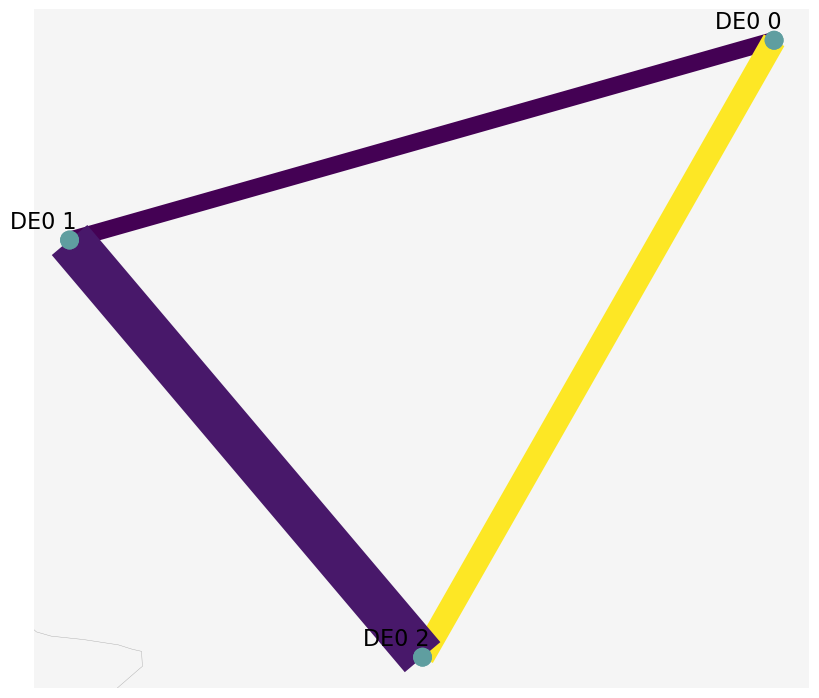

In [747]:
loading = (n.lines_t.p0.abs().mean().sort_index()/(n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

fig, ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

n.plot(
    ax=ax,
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3, #GW
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0.003
)

bus = n.buses
region = []
for index, row in bus.iterrows():
    x = row['x']
    y = row['y']
    if "H2" in index:
        pass
    else:
        region.append(index)
        ax.annotate(
        index,
        xy=(x, y),
        xytext=(5, 5),  # Adjust the position of the annotation
        textcoords="offset points",
        ha='right', va='bottom'
    )

plt.show


## Installed Capacity Map Plot

In [748]:
#color list for installed cap
tech_list = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
tech_list.remove('load')
color_cap = []

for i in range(len(tech_list)):
    for j in range(len(n.carriers.index)):
        if tech_list[i] == n.carriers.index[j]:
            color_cap.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  

cap = n.generators[n.generators['carrier']!='load'].groupby(['bus', 'carrier']).p_nom_opt.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\3847545614.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_cap.append(n.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


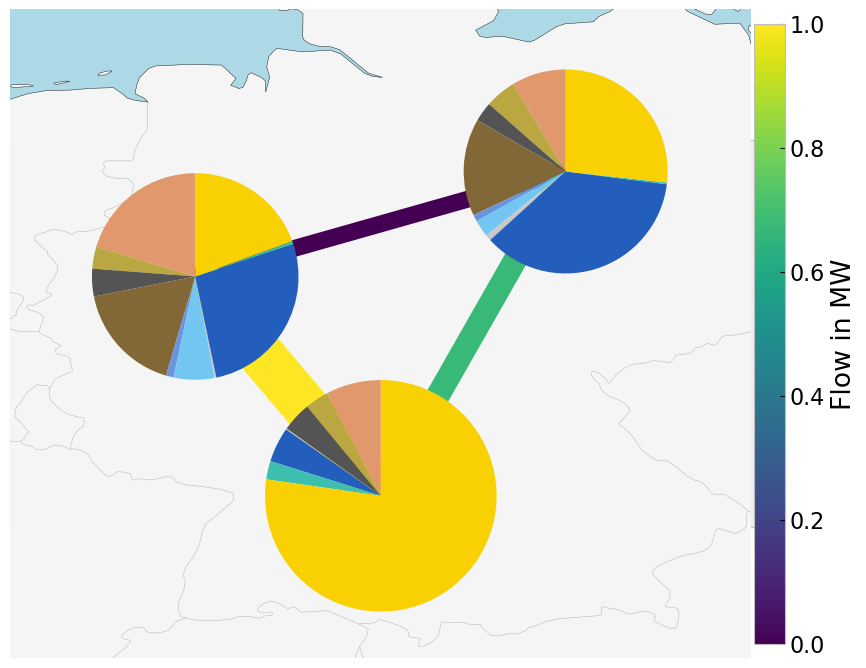

In [749]:
fig, ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

collection = n.plot(
    bus_sizes=cap / 5e4,
    bus_colors = color_cap,
    margin=0.5,
    #flow="mean",
    line_widths=n.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)
        
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

## Generation Map Plot

In [750]:
#color list for energy generated 
tech_list_gen_table = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
colors_gen_table = []

for i in range(len(tech_list_gen_table)):
    for j in range(len(n.carriers.index)):
        if tech_list_gen_table[i] == n.carriers.index[j]:
            colors_gen_table.append(n.carriers.color[j])
            break  # break the inner loop once a match is found 

#Adjust Load shedding's unit to MW from kW
#for column in n.generators_t.p.columns:
#    if column.endswith('load') and not column.endswith('H2 load'):
#        n.generators_t.p[column]/=1e3
        

gen = n.generators.assign(g=n.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\971004373.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_gen_table.append(n.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


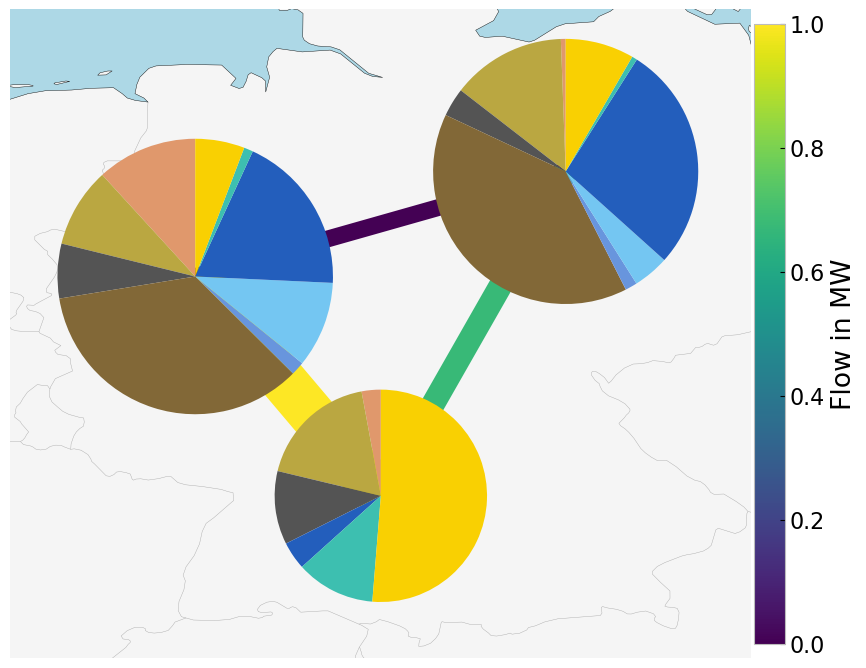

In [751]:
carriers = n.generators.carrier.unique()

plt.figure(figsize =(10,10))

collection = n.plot(
    bus_sizes=gen / 1e4,
    bus_colors = colors_gen_table,
    margin=0.5,
    #flow="mean",
    line_widths=n.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

## Installed Capacity

In [752]:
def inst_cap_table(n,colors):

    capacities = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
    capacities.fillna(0, inplace=True)
    gen = (capacities.unstack()/1000).drop(columns=['load'],inplace=False)
    gen.fillna(0, inplace=True)

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    gen.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                title=f"Installed power capacity"
    )

    plt.show()
    return capacities

<Figure size 640x480 with 0 Axes>

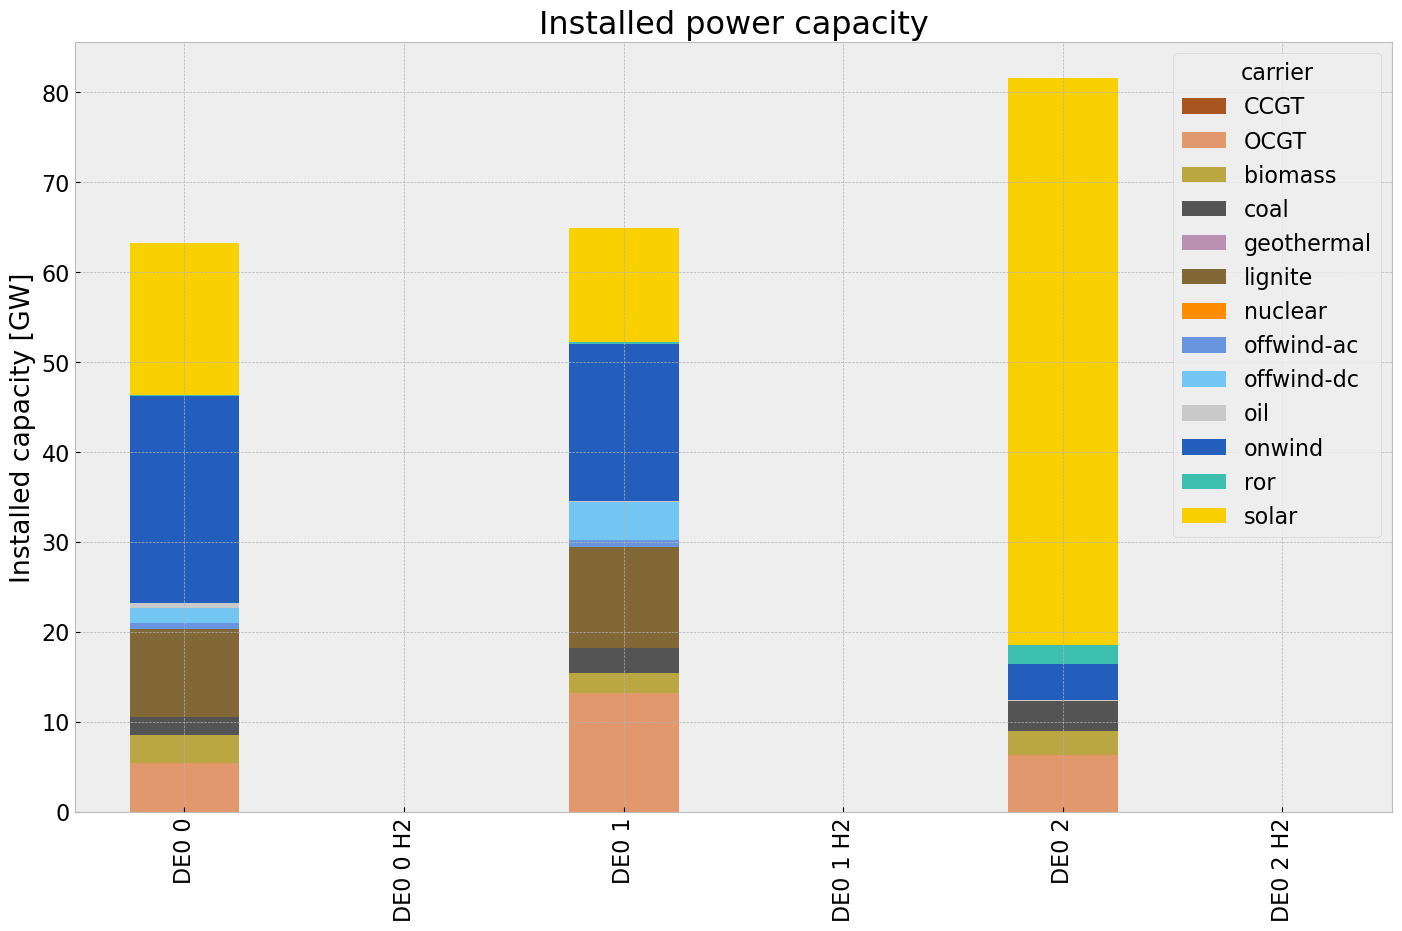

In [753]:
# consolidated istalled cap without load_shedding

#capacities_base = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
#capacities_base.fillna(0, inplace=True)
#gen = (capacities_base.unstack()/1000).drop(columns=['load'],inplace=False)

capacities_base = inst_cap_table(n, color_cap)


## Generation

<Figure size 640x480 with 0 Axes>

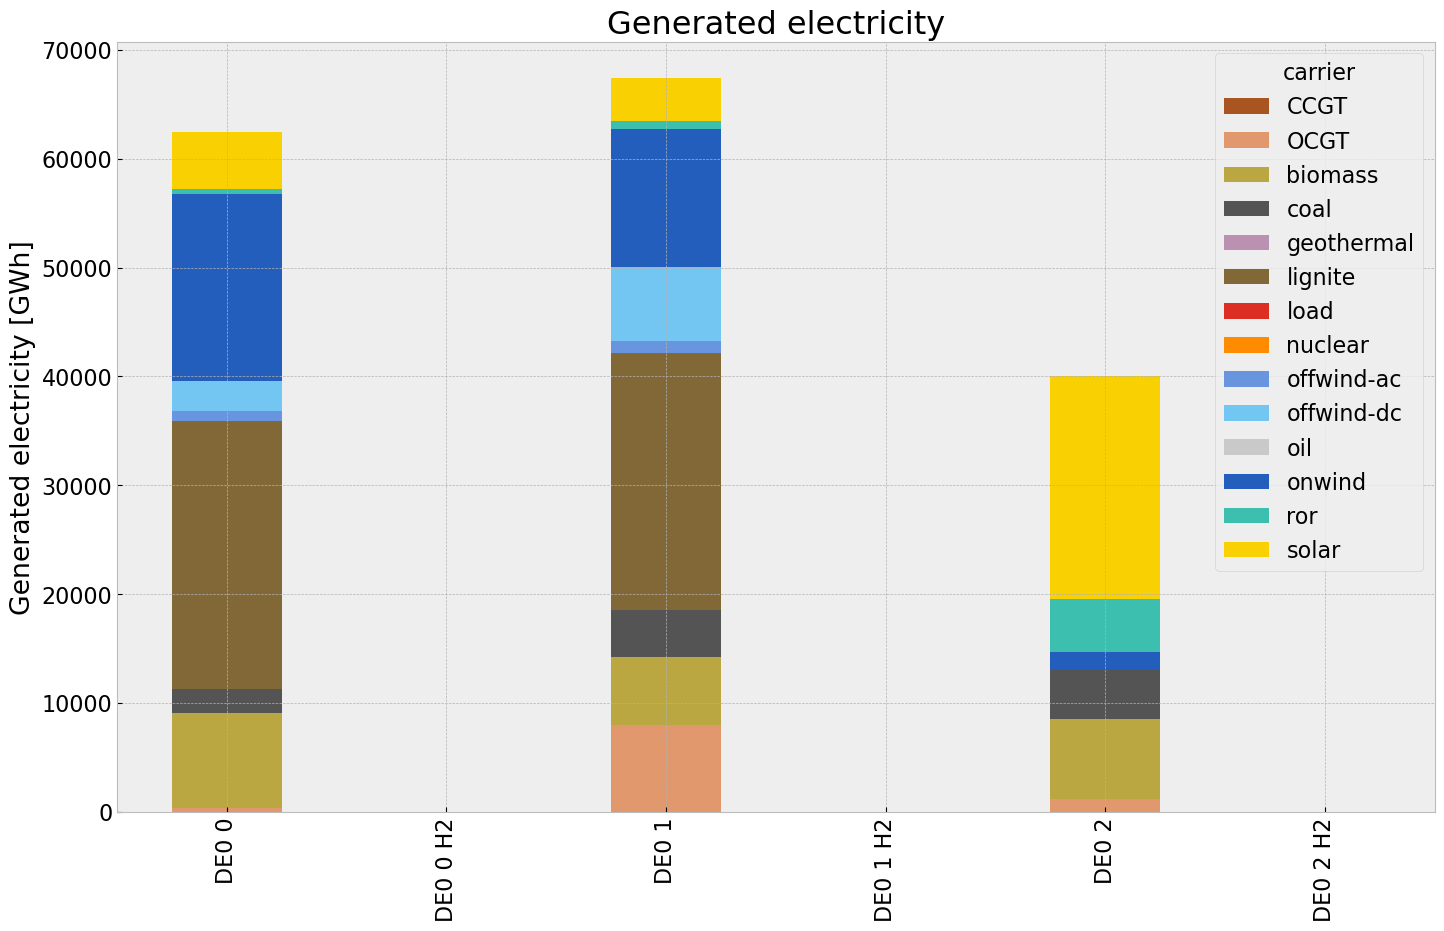

In [754]:
def gen_power_table(n, color):

    carrier = n.generators.carrier.unique()
    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                    #print(generations.loc[r, tech])
                except KeyError:
                    print('error')
    generations.fillna(0, inplace=True)

    generations = (generations.unstack()/1000)#GWh
    #generations['load']/=1e3


    plt.figure()
    plt.rcParams.update({'font.size': 16})

    generations.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=color,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                title=f"Generated electricity"
    )

    plt.show()
    return generations

gen_base = gen_power_table(n,colors_gen_table)

## Snapshot

In [755]:
sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
tech_list_gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
links = n.links_t.p0.groupby(n.links.carrier, axis =1).sum().drop(['DC','H2 electrolysis'], axis=1, inplace =False).head()
tech_list_gen = pd.concat([tech_list_gen, sto], axis=1).columns.tolist()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\3551839577.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\3551839577.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  tech_list_gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\3551839577.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p0.groupby(n.links.carrier, axis =1).sum().drop(['DC','H2 electrolysis'], axis=1, inplace =False).head()


In [756]:
colors_gen = []

for i in range(len(tech_list_gen)):
    for j in range(len(n.carriers.index)):
        if tech_list_gen[i] == n.carriers.index[j]:
            colors_gen.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\3660868222.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_gen.append(n.carriers.color[j])


In [757]:
def gen_curve(n, start, end, colors):

    plt.rcParams.update({'font.size': 16})


    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    #p_by_carrier['load'] /= 1e3

    #links fuel cell
    links = n.links_t.p1.groupby(n.links.carrier, axis=1).sum().div(1e3)
    links = links.drop(columns='DC', inplace=False)
    links['H2 fuel cell']*=-1
       
    # join generator, links, and storage unit
    if not n.storage_units.empty:
        sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)     
        p_by_carrier = pd.concat([p_by_carrier, sto, links], axis=1)
        
    p_by_carrier.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')

    start_date = start
    end_date = end
    
    # Create a date range for the specified time range
    time = pd.date_range(start=start_date, end=end_date, freq='3H')
    
    fig, ax = plt.subplots(figsize=(20, 10))
    
    p_no_H = p_by_carrier.drop(columns = 'H2 electrolysis', inplace = False)
    p_no_H.where(p_no_H>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=colors,
        grid=True,

    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=["yellowgreen", "magenta", "purple", "grey"],
            grid=True,
        )
    
    loads = n.loads_t.p_set.sum(axis=1).div(1e3)
    loads.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')
    
    loads.loc[time].plot(ax=ax, c='k',grid=True)


    plt.legend(loc=(1.05,0))
    
    ax.set_ylabel("Power [GW]")
    ax.set_title(f"Hourly electricity production")


    ax.set_ylim(-100,150)

In [758]:
#e_balance = n.statistics.energy_balance(aggregate_time=False, aggregate_bus=False).loc[:, :, "AC",:].droplevel(2)
#e_balance.to_excel('energybalance.xlsx', index=True) 


In [759]:
#tes = n.statistics.energy_balance(aggregate_time=False, aggregate_bus=False).loc[:, :, "AC", :].droplevel(2)
#tes.to_csv('energybalance.csv', index=True)

In [760]:
#n.loads_t.p_set.sum(axis=1).loc[pd.date_range(start='2013-01-08', end='2013-01-14', freq='3H')].div(1e3).plot(ax=ax, c='k',grid=True)


In [761]:
#p_by_carrier.where(p_by_carrier>0).loc[pd.date_range(start='2013-01-08', end='2013-01-14', freq='3H')].sum(axis=1)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p_by_carrier.index = pd.date_range(start='2030-01-01', end=

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:51: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  loads.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')


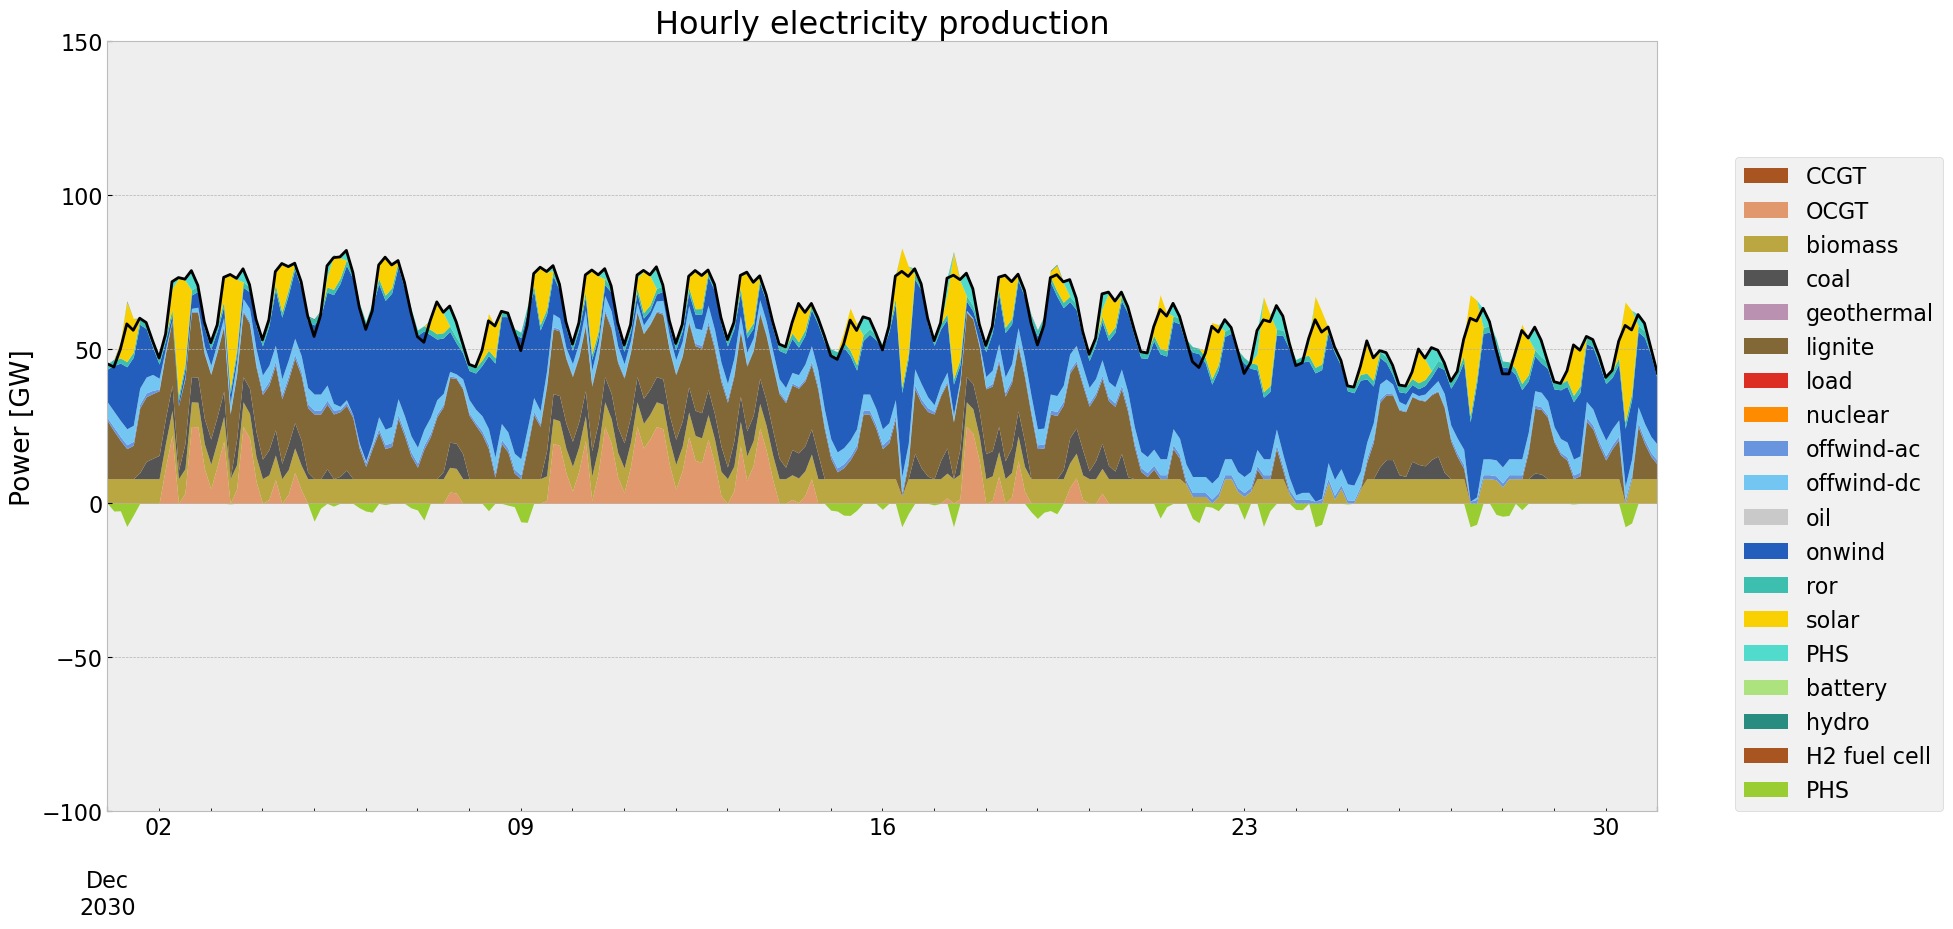

In [762]:
# winter
gen_curve(n, '2030-12-01', '2030-12-31', colors_gen)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p_by_carrier.index = pd.date_range(start='2030-01-01', end=

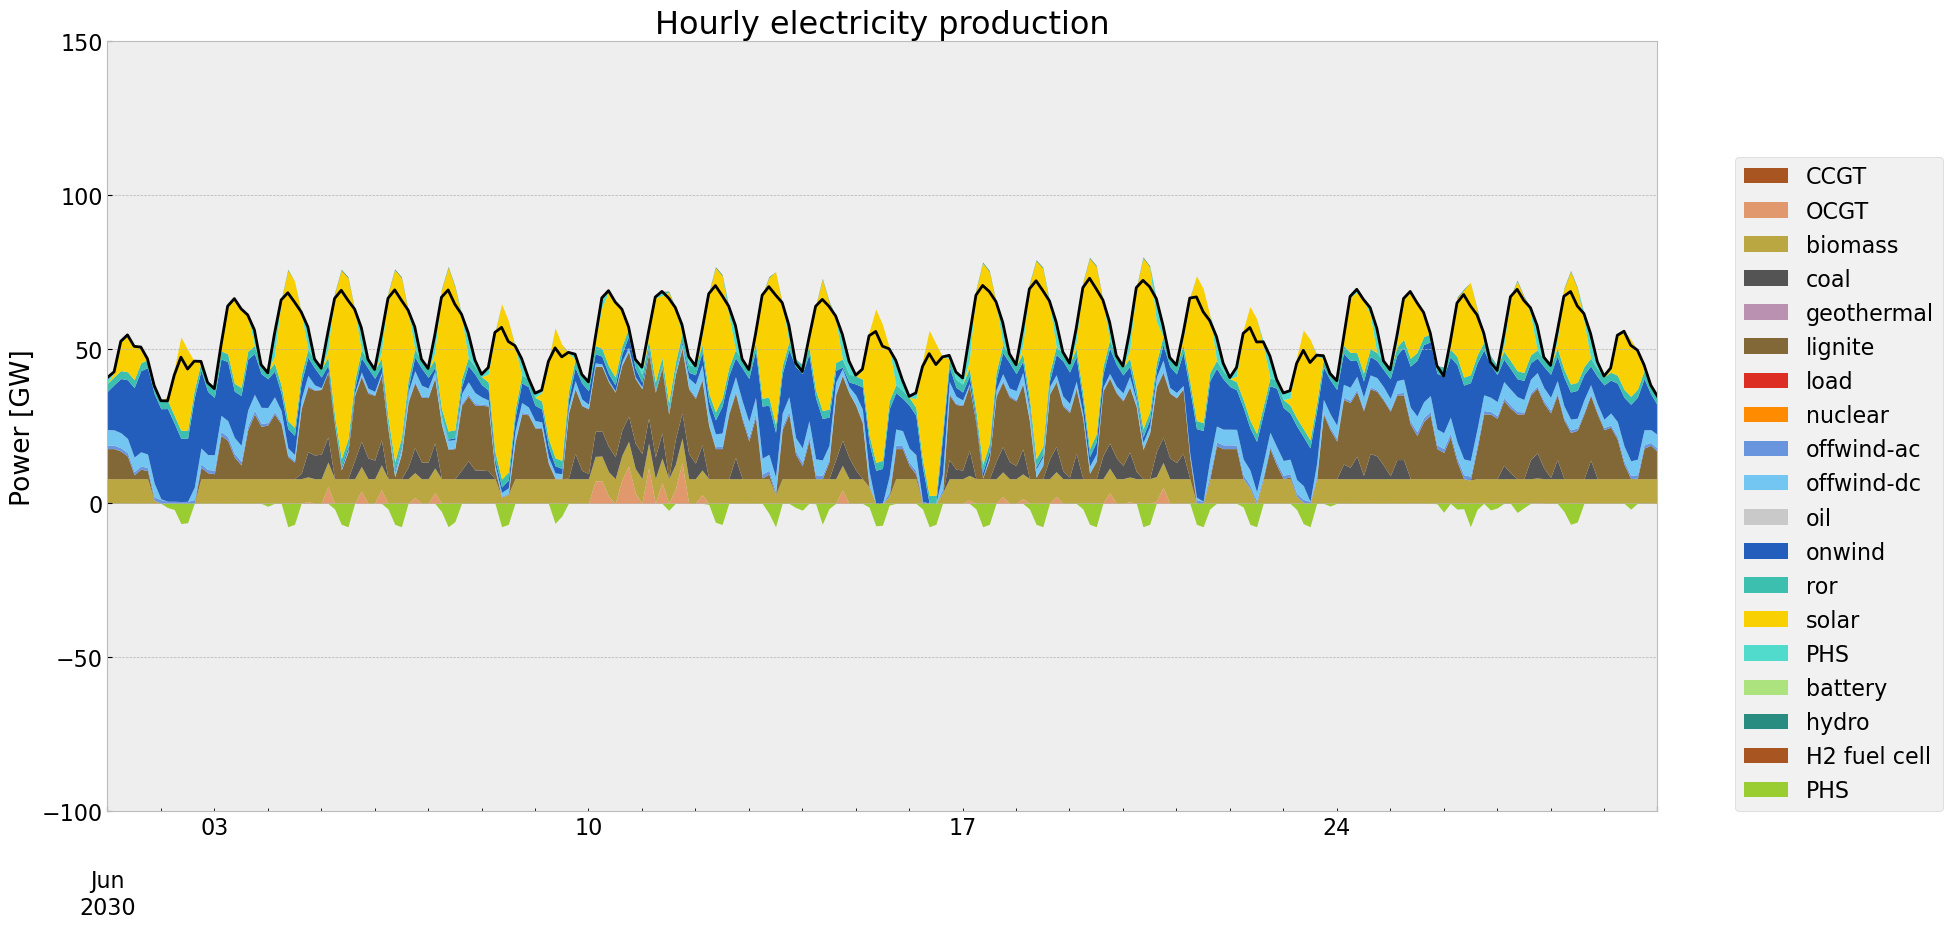

In [763]:
#summer
gen_curve(n, '2030-06-01', '2030-06-30', colors_gen)

## Storage

In [764]:
def inst_store_table(n):
    
    plt.rcParams.update({'font.size': 16})

    (n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["yellowgreen","magenta","red","blue"],
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                #title=f"Installed power capacities of storage systems in Italy in {year}",
                                ylim=[0,20]
    )

    return n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000

carrier      PHS  battery   hydro
bus                              
DE0 0    2.87980      0.0     NaN
DE0 1    2.22142      0.0     NaN
DE0 2    2.49800      0.0  0.2895

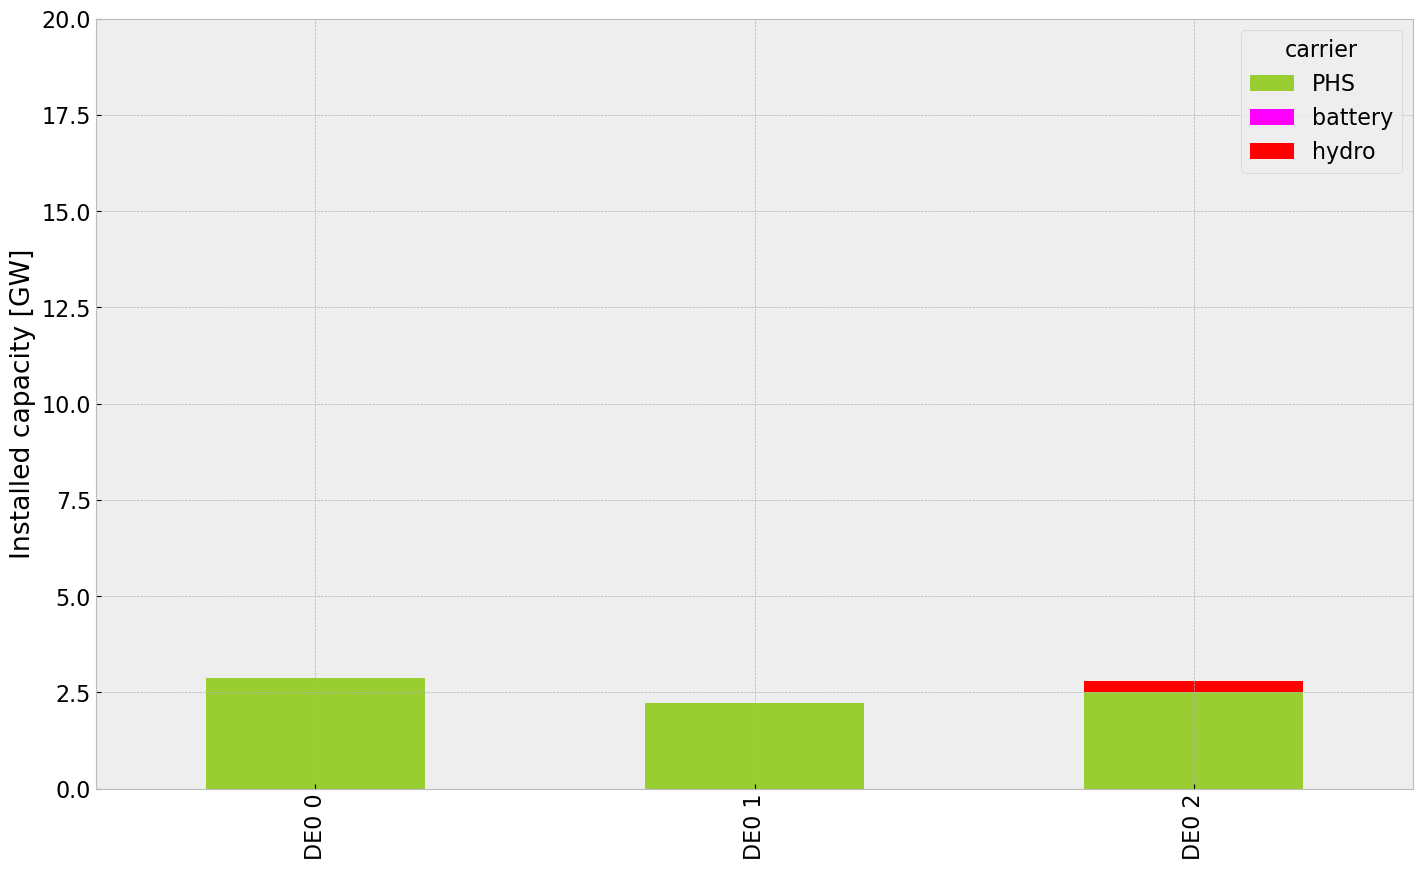

In [765]:
inst_store_table(n)

In [766]:
n.stores.groupby(['bus','carrier']).e_nom_opt.sum().unstack()/1000

carrier    H2
bus          
DE0 0 H2  0.0
DE0 1 H2  0.0
DE0 2 H2  0.0

carrier    H2
bus          
DE0 0 H2  0.0
DE0 1 H2  0.0
DE0 2 H2  0.0

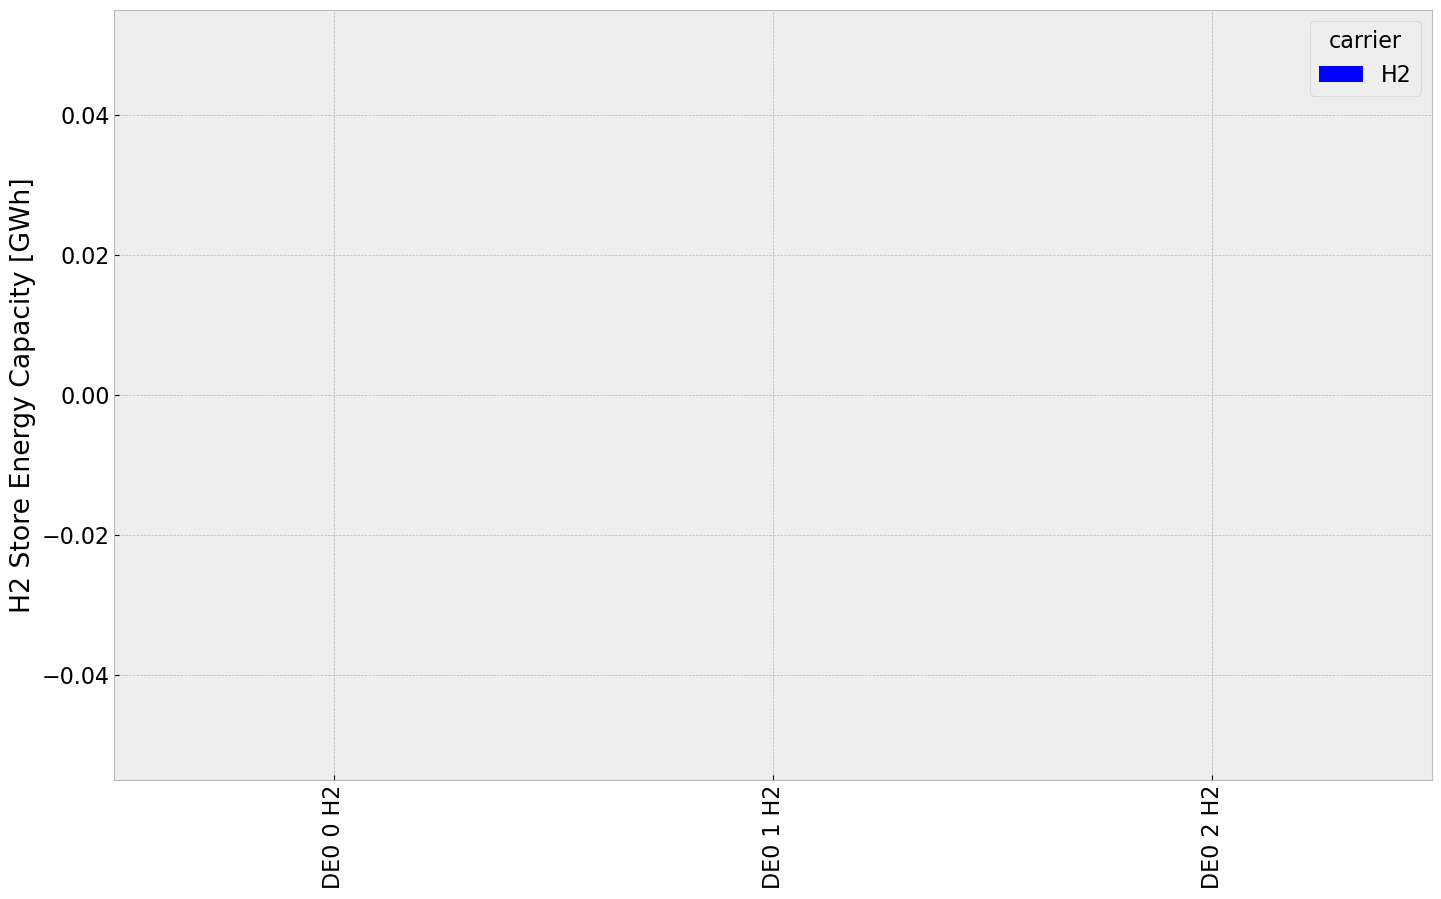

In [767]:
def inst_storeh2_table(n):
    
    plt.rcParams.update({'font.size': 16})

    (n.stores.groupby(['bus','carrier']).e_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["blue"],
                                grid=True,
                                xlabel="",
                                ylabel="H2 Store Energy Capacity [GWh]",
                                #title=f"Installed power capacities of storage systems in Italy in {year}",
                                #ylim=[0,7500]
    )

    return n.stores.groupby(['bus','carrier']).e_nom_opt.sum().unstack()/1000

inst_storeh2_table(n)

In [768]:
n.stores

bus carrier  e_nom_extendable  e_cyclic  capital_cost  \
Store                                                                  
DE0 0 H2  DE0 0 H2      H2              True      True     148.31893   
DE0 1 H2  DE0 1 H2      H2              True      True     148.31893   
DE0 2 H2  DE0 2 H2      H2              True      True     148.31893   

          marginal_cost  build_year  e_nom_opt type  e_nom  e_nom_mod  \
Store                                                                   
DE0 0 H2       0.010021           0        0.0         0.0        0.0   
DE0 1 H2       0.010339           0        0.0         0.0        0.0   
DE0 2 H2       0.010172           0        0.0         0.0        0.0   

          e_nom_min  e_nom_max  e_min_pu  e_max_pu  e_initial  \
Store                                                           
DE0 0 H2        0.0        inf       0.0       1.0        0.0   
DE0 1 H2        0.0        inf       0.0       1.0        0.0   
DE0 2 H2        0.0        inf       0.0       1.0        0.0   

          e_initial_per_period  e_cyclic_per_period  p_set  q_set  sign  \
Store                                                                     
DE0 0 H2                 False                 True    0.0    0.0   1.0   
DE0 1 H2                 False                 True    0.0    0.0   1.0   
DE0 2 H2                 False                 True    0.0    0.0   1.0   

          marginal_cost_quadratic  standing_loss  lifetime  
Store                                                       
DE0 0 H2                      0.0            0.0       inf  
DE0 1 H2                      0.0            0.0       inf  
DE0 2 H2                      0.0            0.0       inf

In [769]:
def state_of_charge_plot(n):
    
    soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)

    soc.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    soc.plot(ax=ax,
        grid=True,
        ylabel="State of charge [GWh]",
        xlabel="Time",
        #title=f"State of charge of aggregated storage systems in Italy in {year}",
        linewidth=1.5,
)

plt.show(n)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\440258284.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\440258284.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  soc.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')


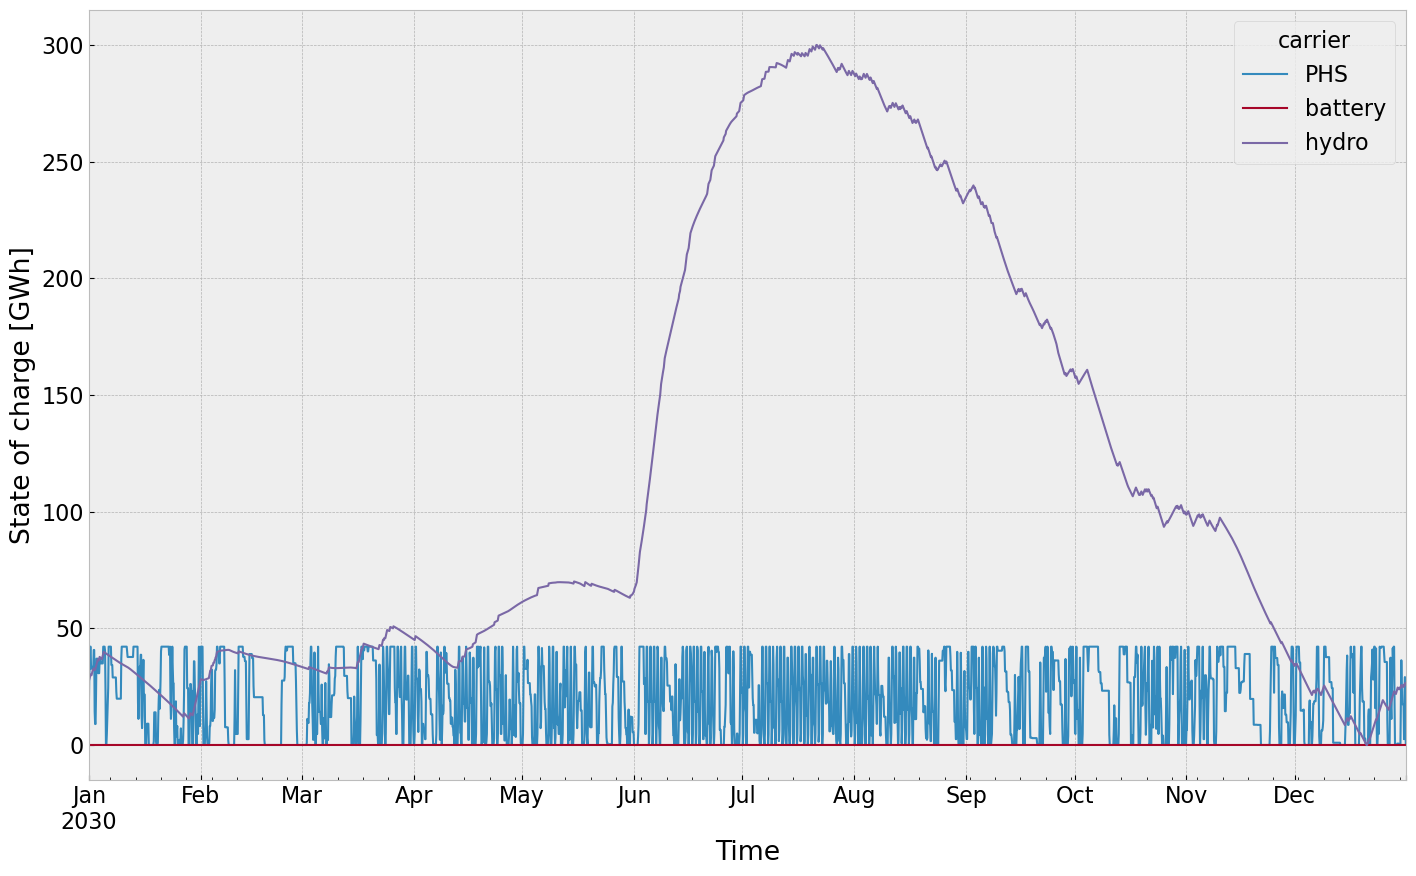

In [770]:
state_of_charge_plot(n)

## Electricity Price

In [771]:
def price_dur_curve_plot(n):

    #buses without store
    columns_to_keep =[]

    for i in n.buses_t.marginal_price.columns.tolist():
        if not i.endswith('H2'):
            columns_to_keep.append(i)
    
    price_dur_curve = pd.DataFrame()
    for region in columns_to_keep:
        price_dur_curve[region] = n.buses_t.marginal_price[region].sort_values(ascending=False).reset_index(drop=True)

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    price_dur_curve.plot(ax=ax,
                    grid=True,
                    ylabel="Marginal price [€/MWh]",
                    xlabel="Time steps",
                    #title=f"Duration curves of the marginal price in the Italian regions in {year}",
                    linewidth=3,
)

plt.show()

In [772]:
columns_to_keep =[]

for i in n.buses_t.marginal_price.columns.tolist():
    if not i.endswith('H2'):
        columns_to_keep.append(i)
    


#buses without store
columns_to_keep =[]

price_dur_curve = pd.DataFrame()
for region in columns_to_keep:
    price_dur_curve[region] = n.buses_t.marginal_price[region].sort_values(ascending=False).reset_index(drop=True)


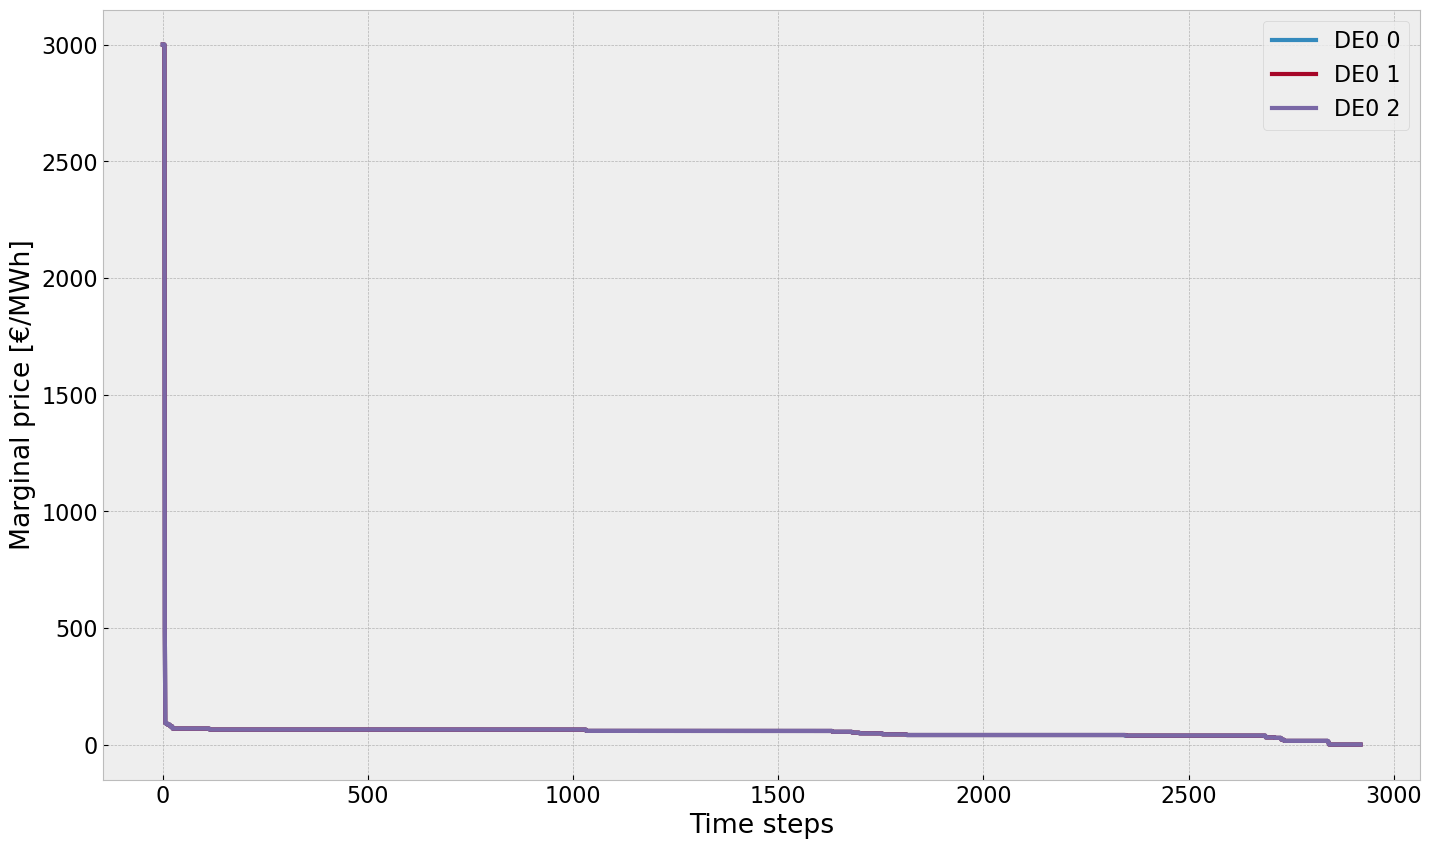

In [773]:
price_dur_curve_plot(n)

In [774]:
def price_regions_table(n):

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    
    region = n.buses_t.marginal_price.mean()
    #for index, value in region.items():
    #    if index.endswith('H2'):
     #       region = region.drop(index)
    
    region.plot.bar(ax=ax,
                    grid=True,
                    ylabel="Marginal price [€/MWh]",
                    xlabel="Region",
                    title=f"Average marginal price",
                    linewidth=3,
    
    )

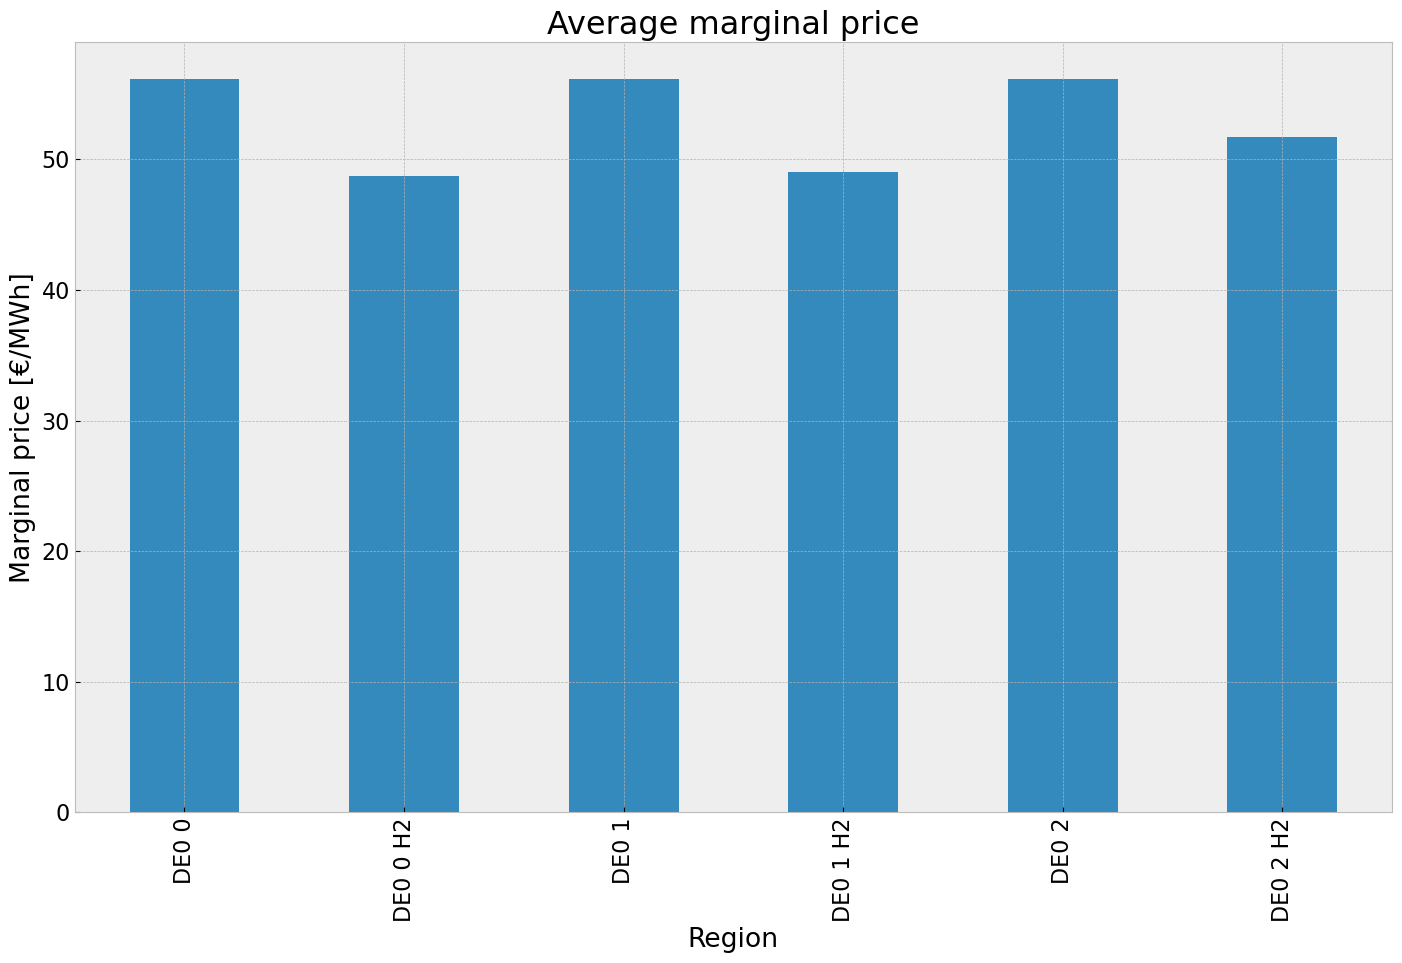

In [775]:
price_regions_table(n)

In [776]:
def price_regions(n):
    # Assuming 'n.buses_t.marginal_price' returns a DataFrame or similar structure with 'mean()' method
    mean_p = n.buses_t.marginal_price.mean()

    hprice = mean_p.filter(like='H2')
    eprice = mean_p.drop(hprice.index)

    # Setup figure and subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(16, 8))
    
    # Plot for hprice
    hprice_plot = axs[0].hexbin(
        n.buses.x.filter(like='H2'),  # Assuming n.buses.x and n.buses.y hold the coordinates
        n.buses.y.filter(like='H2'),
        gridsize=20,
        C=hprice,
        cmap=plt.cm.jet,
        zorder=3,
    )
    n.plot(ax=axs[0], line_widths=pd.Series(0.5, n.lines.index), bus_sizes=0)  # Plot network on the first subplot
    cb = fig.colorbar(hprice_plot, ax=axs[0], location="bottom")
    cb.set_label("Mean H2 Marginal Price (EUR/MWh) for H2")

    # Plot for eprice
    eprice_plot = axs[1].hexbin(
        n.buses.x[~n.buses.x.index.str.contains('H2')],
        n.buses.y[~n.buses.x.index.str.contains('H2')],
        gridsize=20,
        C=eprice,
        cmap=plt.cm.jet,
        zorder=3,
    )
    n.plot(ax=axs[1], line_widths=pd.Series(0.5, n.lines.index), bus_sizes=0)  # Plot network on the second subplot
    cb = fig.colorbar(eprice_plot, ax=axs[1], location="bottom")
    cb.set_label("Mean Electricity Marginal Price (EUR/MWh)")

    fig.tight_layout()

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


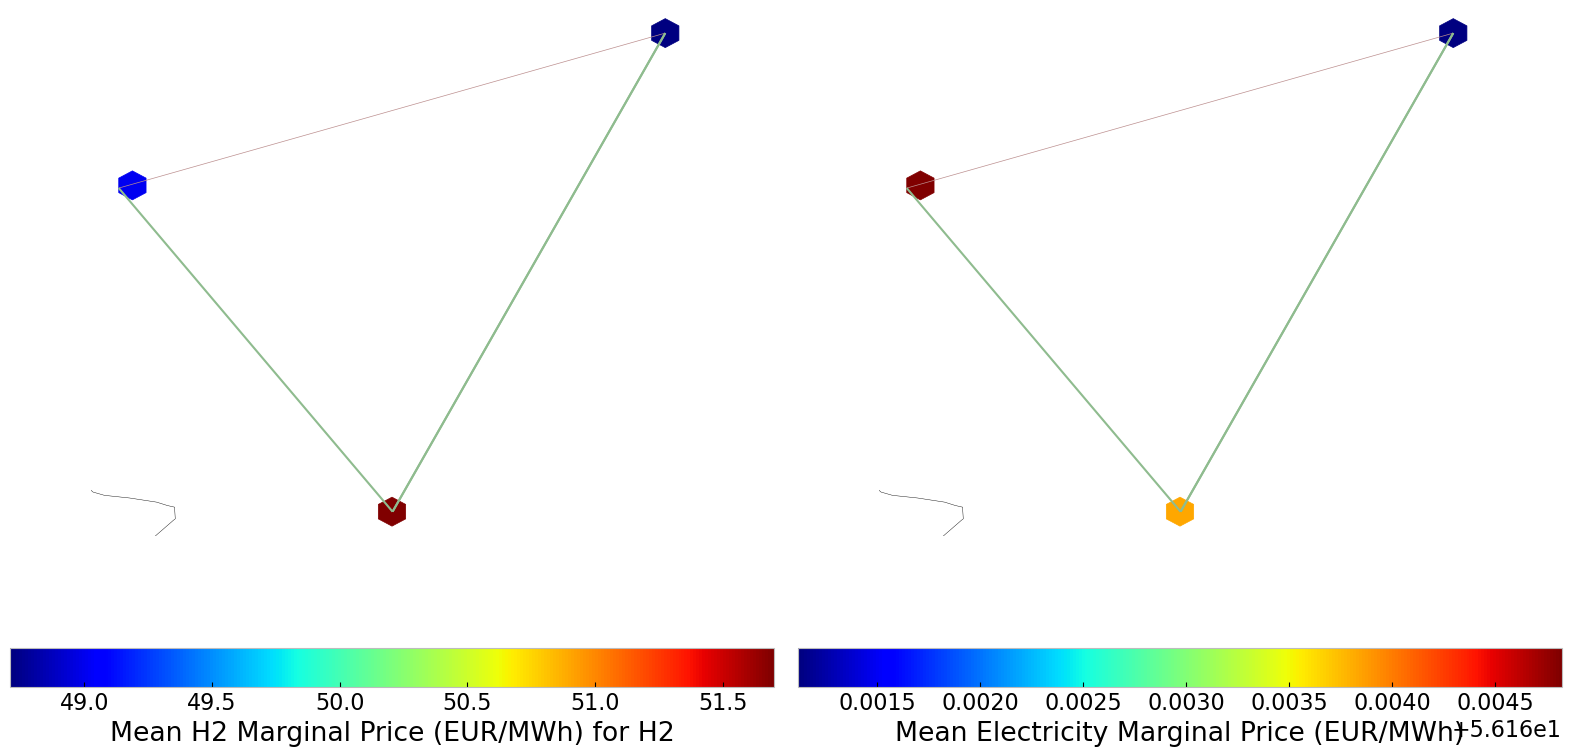

In [777]:
price_regions(n)

## Emission

In [778]:
def em_table(n):
    carrier = n.generators.carrier.unique()
    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                    #print(generations.loc[r, tech])
                except KeyError:
                    print('error')
    generations.fillna(0, inplace=True)

    generations = (generations.unstack())#MWh

    #mean efficiency of each carrier
    eff = n.generators.groupby('carrier').efficiency.mean()

    e = generations.sum()
    emission = []

    for index in e.index:
        for index_c in n.carriers.index:
            for index_eff in eff.index:
                if index == index_c == index_eff:
                    em = n.carriers.loc[index_c,"co2_emissions"]
                    emission.append(em)

    df = e.to_frame()
    df.rename(columns={0: 'Generation in MWh'}, inplace=True)
    df['efficiency'] = eff
    df['emissions in Tonnes CO2/MWh'] = emission
    df['emissions in Tonnes CO2']= df['Generation in MWh']/df['efficiency']*df['emissions in Tonnes CO2/MWh']
    df['emissions in Tonnes CO2'].sum() 
    return df

em_base =em_table(n)
em_base

Generation in MWh  efficiency  emissions in Tonnes CO2/MWh  \
carrier                                                                  
CCGT             0.000000e+00    0.580000                       0.1980   
OCGT             9.479447e+06    0.498516                       0.1980   
biomass          2.235774e+07    0.468000                       0.0000   
coal             1.096743e+07    0.329687                       0.3361   
geothermal       0.000000e+00    1.000000                       0.1200   
lignite          4.822705e+07    0.362723                       0.4069   
load             4.557239e+03    1.000000                       0.0000   
nuclear          0.000000e+00    0.328667                       0.0000   
offwind-ac       1.982451e+06    1.000000                       0.0000   
offwind-dc       9.546936e+06    1.000000                       0.0000   
oil              5.137800e+03    0.376686                       0.2571   
onwind           3.166865e+07    1.000000                       0.0000   
ror              5.951822e+06    0.900000                       0.0000   
solar            2.966702e+07    1.000000                       0.0000   

            emissions in Tonnes CO2  
carrier                              
CCGT                   0.000000e+00  
OCGT                   3.765039e+06  
biomass                0.000000e+00  
coal                   1.118077e+07  
geothermal             0.000000e+00  
lignite                5.410078e+07  
load                   0.000000e+00  
nuclear                0.000000e+00  
offwind-ac             0.000000e+00  
offwind-dc             0.000000e+00  
oil                    3.506714e+03  
onwind                 0.000000e+00  
ror                    0.000000e+00  
solar                  0.000000e+00

# Offwind Cut Scenario
Cut start: 01.01.2013
reduction on capacity: 50%, source:
duration : 9 months

In [779]:
#copy network
n1=n.copy()

#p_max_pu of offwind generators across all regions are subtracted by 10% from 01.06.2013 to 31.12.13
cut_start=pd.to_datetime('2013-01-01 00:00:00')
cut_end = pd.to_datetime('2013-12-31 00:00:00')

for column in n1.generators_t.p_max_pu.columns:
        if column.endswith('offwind-ac') or column.endswith('offwind-dc'):
                for index,row in n1.generators_t.p_max_pu[column].items():
                        if index >= cut_start and index < cut_end:
                                new_p_max_pu = n1.generators_t.p_max_pu.at[index, column] * 0.0 #0.9
                                n1.generators_t.p_max_pu.at[index, column] = new_p_max_pu
                                if new_p_max_pu<0:
                                    n1.generators_t.p_max_pu.at[index, column] = 0


#set the optimal capacity of generators from the base scenario as the new minimum capacity 
for index, value in n1.generators.p_nom_extendable.items():
    if value:  
        n1.generators.at[index, 'p_nom_min'] = n.generators.at[index, 'p_nom_opt']


#set the optimal capacity of storage units from the base scenario as the new minimum capacity 
for index, value in n1.storage_units.p_nom_extendable.items():
    if value:  
        n1.storage_units.at[index, 'p_nom_min'] = n.storage_units.at[index, 'p_nom_opt']

#set the optimal capacity of lines from the base scenario as the new minimum capacity 
for index, value in n1.lines.s_nom_extendable.items():
    if value:  
        n1.lines.at[index, 's_nom_min'] = n.lines.at[index, 's_nom_opt']

                        

## 1. Scenario: allow additional investment of extendable generators and storage

In [780]:
n1.optimize.create_model()


Linopy LP model

Variables:
----------
 * Generator-p_nom (Generator-ext)
 * Line-s_nom (Line-ext)
 * Link-p_nom (Link-ext)
 * Store-e_nom (Store-ext)
 * StorageUnit-p_nom (StorageUnit-ext)
 * Generator-p (snapshot, Generator)
 * Line-s (snapshot, Line)
 * Link-p (snapshot, Link)
 * Store-e (snapshot, Store)
 * StorageUnit-p_dispatch (snapshot, StorageUnit)
 * StorageUnit-p_store (snapshot, StorageUnit)
 * StorageUnit-state_of_charge (snapshot, StorageUnit)
 * StorageUnit-spill (snapshot, StorageUnit)
 * Store-p (snapshot, Store)
 * objective_constant

Constraints:
------------
 * Generator-ext-p_nom-lower (Generator-ext)
 * Generator-ext-p_nom-upper (Generator-ext)
 * Line-ext-s_nom-lower (Line-ext)
 * Line-ext-s_nom-upper (Line-ext)
 * Link-ext-p_nom-lower (Link-ext)
 * Link-ext-p_nom-upper (Link-ext)
 * Store-ext-e_nom-lower (Store-ext)
 * Store-ext-e_nom-upper (Store-ext)
 * StorageUnit-ext-p_nom-lower (StorageUnit-ext)
 * StorageUnit-ext-p_nom-upper (StorageUnit-ext)
 * Generator-

In [781]:
#solve network

n1.optimize(solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 15/15 [00:01<00:00, 14.56it/s]
INFO:linopy.io: Writing time: 7.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-h8pn6o4f.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-h8pn6o4f.lp


Reading time = 2.12 seconds


INFO:gurobipy:Reading time = 2.12 seconds


obj: 511049 rows, 242381 columns, 984958 nonzeros


INFO:gurobipy:obj: 511049 rows, 242381 columns, 984958 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 511049 rows, 242381 columns and 984958 nonzeros


INFO:gurobipy:Optimize a model with 511049 rows, 242381 columns and 984958 nonzeros


Model fingerprint: 0x66e1853e


INFO:gurobipy:Model fingerprint: 0x66e1853e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 9e+09]


INFO:gurobipy:  Bounds range     [3e+01, 9e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 364187 rows and 60487 columns


INFO:gurobipy:Presolve removed 364187 rows and 60487 columns


Presolve time: 0.85s


INFO:gurobipy:Presolve time: 0.85s


Presolved: 146862 rows, 181894 columns, 542758 nonzeros


INFO:gurobipy:Presolved: 146862 rows, 181894 columns, 542758 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.17s


INFO:gurobipy:Ordering time: 0.17s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 27


INFO:gurobipy: Dense cols : 27


 AA' NZ     : 4.486e+05


INFO:gurobipy: AA' NZ     : 4.486e+05


 Factor NZ  : 2.107e+06 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 2.107e+06 (roughly 150 MB of memory)


 Factor Ops : 6.493e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.493e+07 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01005123e+19 -7.37088028e+19  2.09e+13 2.04e+06  3.50e+15     1s


INFO:gurobipy:   0   2.01005123e+19 -7.37088028e+19  2.09e+13 2.04e+06  3.50e+15     1s


   1   1.61989270e+19 -2.59853969e+19  1.75e+13 5.79e+05  2.02e+15     2s


INFO:gurobipy:   1   1.61989270e+19 -2.59853969e+19  1.75e+13 5.79e+05  2.02e+15     2s


   2   1.34828984e+19 -1.81338834e+19  1.44e+13 2.74e+05  1.51e+15     2s


INFO:gurobipy:   2   1.34828984e+19 -1.81338834e+19  1.44e+13 2.74e+05  1.51e+15     2s


   3   6.87783851e+18 -1.00879365e+19  7.00e+12 7.24e+04  7.17e+14     2s


INFO:gurobipy:   3   6.87783851e+18 -1.00879365e+19  7.00e+12 7.24e+04  7.17e+14     2s


   4   1.81200311e+18 -2.53508486e+18  1.80e+12 1.10e+04  1.81e+14     3s


INFO:gurobipy:   4   1.81200311e+18 -2.53508486e+18  1.80e+12 1.10e+04  1.81e+14     3s


   5   6.17388816e+17 -8.74761463e+17  5.67e+11 2.84e+03  5.81e+13     3s


INFO:gurobipy:   5   6.17388816e+17 -8.74761463e+17  5.67e+11 2.84e+03  5.81e+13     3s


   6   7.78739636e+16 -8.71945167e+16  1.67e+10 9.78e+01  2.02e+12     3s


INFO:gurobipy:   6   7.78739636e+16 -8.71945167e+16  1.67e+10 9.78e+01  2.02e+12     3s


   7   2.56564878e+16 -2.58139350e+16  2.00e+09 2.55e+01  3.20e+11     3s


INFO:gurobipy:   7   2.56564878e+16 -2.58139350e+16  2.00e+09 2.55e+01  3.20e+11     3s


   8   6.36849268e+15 -1.02520983e+16  4.08e+08 7.05e+00  7.91e+10     3s


INFO:gurobipy:   8   6.36849268e+15 -1.02520983e+16  4.08e+08 7.05e+00  7.91e+10     3s


   9   2.70120995e+15 -3.87138674e+15  1.48e+08 1.45e+00  2.77e+10     4s


INFO:gurobipy:   9   2.70120995e+15 -3.87138674e+15  1.48e+08 1.45e+00  2.77e+10     4s


  10   5.18953967e+14 -1.63548659e+15  1.96e+07 3.00e-01  6.69e+09     4s


INFO:gurobipy:  10   5.18953967e+14 -1.63548659e+15  1.96e+07 3.00e-01  6.69e+09     4s


  11   1.58903199e+13 -3.35596156e+14  4.42e+05 5.14e-02  9.37e+08     4s


INFO:gurobipy:  11   1.58903199e+13 -3.35596156e+14  4.42e+05 5.14e-02  9.37e+08     4s


  12   6.27450433e+12 -7.26206654e+13  1.21e+05 1.05e-02  2.08e+08     4s


INFO:gurobipy:  12   6.27450433e+12 -7.26206654e+13  1.21e+05 1.05e-02  2.08e+08     4s


  13   2.18212275e+12 -1.05724978e+13  1.07e+04 1.31e-03  3.35e+07     5s


INFO:gurobipy:  13   2.18212275e+12 -1.05724978e+13  1.07e+04 1.31e-03  3.35e+07     5s


  14   6.58599299e+11 -2.98181334e+12  2.67e+00 3.53e-04  9.53e+06     5s


INFO:gurobipy:  14   6.58599299e+11 -2.98181334e+12  2.67e+00 3.53e-04  9.53e+06     5s


  15   3.58867331e+11 -1.45441140e+12  1.04e+00 1.71e-04  4.75e+06     5s


INFO:gurobipy:  15   3.58867331e+11 -1.45441140e+12  1.04e+00 1.71e-04  4.75e+06     5s


  16   1.85112448e+11 -6.95998922e+11  3.32e-01 7.88e-05  2.31e+06     5s


INFO:gurobipy:  16   1.85112448e+11 -6.95998922e+11  3.32e-01 7.88e-05  2.31e+06     5s


  17   6.14702314e+10 -1.84210500e+11  6.37e-02 1.65e-05  6.43e+05     5s


INFO:gurobipy:  17   6.14702314e+10 -1.84210500e+11  6.37e-02 1.65e-05  6.43e+05     5s


  18   3.94604270e+10 -5.32140935e+10  3.38e-02 5.43e-06  2.43e+05     6s


INFO:gurobipy:  18   3.94604270e+10 -5.32140935e+10  3.38e-02 5.43e-06  2.43e+05     6s


  19   2.58820572e+10 -1.29407456e+10  1.51e-02 2.11e-06  1.02e+05     6s


INFO:gurobipy:  19   2.58820572e+10 -1.29407456e+10  1.51e-02 2.11e-06  1.02e+05     6s


  20   2.22883730e+10  1.56084649e+09  1.12e-02 8.32e-07  5.42e+04     6s


INFO:gurobipy:  20   2.22883730e+10  1.56084649e+09  1.12e-02 8.32e-07  5.42e+04     6s


  21   2.16807072e+10  5.47948186e+09  1.06e-02 4.88e-07  4.24e+04     6s


INFO:gurobipy:  21   2.16807072e+10  5.47948186e+09  1.06e-02 4.88e-07  4.24e+04     6s


  22   1.63496409e+10  8.27224983e+09  5.38e-03 1.74e-07  2.11e+04     6s


INFO:gurobipy:  22   1.63496409e+10  8.27224983e+09  5.38e-03 1.74e-07  2.11e+04     6s


  23   1.32432444e+10  9.35376516e+09  2.48e-03 8.09e-08  1.02e+04     7s


INFO:gurobipy:  23   1.32432444e+10  9.35376516e+09  2.48e-03 8.09e-08  1.02e+04     7s


  24   1.24851623e+10  9.94356203e+09  1.81e-03 3.25e-08  6.65e+03     7s


INFO:gurobipy:  24   1.24851623e+10  9.94356203e+09  1.81e-03 3.25e-08  6.65e+03     7s


  25   1.21125166e+10  1.00292478e+10  1.49e-03 2.47e-08  5.45e+03     7s


INFO:gurobipy:  25   1.21125166e+10  1.00292478e+10  1.49e-03 2.47e-08  5.45e+03     7s


  26   1.18398914e+10  1.01414624e+10  1.25e-03 1.48e-08  4.44e+03     7s


INFO:gurobipy:  26   1.18398914e+10  1.01414624e+10  1.25e-03 1.48e-08  4.44e+03     7s


  27   1.13631876e+10  1.01978414e+10  8.52e-04 1.03e-08  3.05e+03     8s


INFO:gurobipy:  27   1.13631876e+10  1.01978414e+10  8.52e-04 1.03e-08  3.05e+03     8s


  28   1.10212354e+10  1.02152879e+10  5.68e-04 9.00e-09  2.11e+03     8s


INFO:gurobipy:  28   1.10212354e+10  1.02152879e+10  5.68e-04 9.00e-09  2.11e+03     8s


  29   1.09824634e+10  1.02593609e+10  5.32e-04 6.37e-09  1.89e+03     8s


INFO:gurobipy:  29   1.09824634e+10  1.02593609e+10  5.32e-04 6.37e-09  1.89e+03     8s


  30   1.08395067e+10  1.02958679e+10  4.03e-04 4.82e-09  1.42e+03     8s


INFO:gurobipy:  30   1.08395067e+10  1.02958679e+10  4.03e-04 4.82e-09  1.42e+03     8s


  31   1.07119056e+10  1.03498636e+10  2.90e-04 1.67e-09  9.47e+02     9s


INFO:gurobipy:  31   1.07119056e+10  1.03498636e+10  2.90e-04 1.67e-09  9.47e+02     9s


  32   1.05537889e+10  1.03639421e+10  1.49e-04 9.94e-10  4.97e+02     9s


INFO:gurobipy:  32   1.05537889e+10  1.03639421e+10  1.49e-04 9.94e-10  4.97e+02     9s


  33   1.05332641e+10  1.03689706e+10  1.30e-04 8.79e-10  4.30e+02     9s


INFO:gurobipy:  33   1.05332641e+10  1.03689706e+10  1.30e-04 8.79e-10  4.30e+02     9s


  34   1.05165496e+10  1.03717549e+10  1.15e-04 8.17e-10  3.79e+02     9s


INFO:gurobipy:  34   1.05165496e+10  1.03717549e+10  1.15e-04 8.17e-10  3.79e+02     9s


  35   1.05100496e+10  1.03725986e+10  1.09e-04 1.12e-09  3.60e+02     9s


INFO:gurobipy:  35   1.05100496e+10  1.03725986e+10  1.09e-04 1.12e-09  3.60e+02     9s


  36   1.05078098e+10  1.03736404e+10  1.07e-04 1.16e-09  3.51e+02    10s


INFO:gurobipy:  36   1.05078098e+10  1.03736404e+10  1.07e-04 1.16e-09  3.51e+02    10s


  37   1.04847512e+10  1.03745221e+10  9.26e-05 1.02e-09  2.88e+02    10s


INFO:gurobipy:  37   1.04847512e+10  1.03745221e+10  9.26e-05 1.02e-09  2.88e+02    10s


  38   1.04679280e+10  1.03766264e+10  1.26e-04 9.60e-10  2.39e+02    10s


INFO:gurobipy:  38   1.04679280e+10  1.03766264e+10  1.26e-04 9.60e-10  2.39e+02    10s


  39   1.04429877e+10  1.03801276e+10  5.55e-05 1.04e-09  1.64e+02    10s


INFO:gurobipy:  39   1.04429877e+10  1.03801276e+10  5.55e-05 1.04e-09  1.64e+02    10s


  40   1.04202634e+10  1.03841993e+10  8.41e-05 9.43e-10  9.44e+01    11s


INFO:gurobipy:  40   1.04202634e+10  1.03841993e+10  8.41e-05 9.43e-10  9.44e+01    11s


  41   1.04084235e+10  1.03864102e+10  5.53e-05 9.95e-10  5.76e+01    11s


INFO:gurobipy:  41   1.04084235e+10  1.03864102e+10  5.53e-05 9.95e-10  5.76e+01    11s


  42   1.03999499e+10  1.03869240e+10  2.30e-05 9.77e-10  3.41e+01    11s


INFO:gurobipy:  42   1.03999499e+10  1.03869240e+10  2.30e-05 9.77e-10  3.41e+01    11s


  43   1.03923879e+10  1.03874230e+10  1.10e-05 7.47e-10  1.30e+01    11s


INFO:gurobipy:  43   1.03923879e+10  1.03874230e+10  1.10e-05 7.47e-10  1.30e+01    11s


  44   1.03902423e+10  1.03878857e+10  1.07e-05 8.93e-10  6.17e+00    12s


INFO:gurobipy:  44   1.03902423e+10  1.03878857e+10  1.07e-05 8.93e-10  6.17e+00    12s


  45   1.03891957e+10  1.03880666e+10  7.76e-06 1.01e-09  2.95e+00    12s


INFO:gurobipy:  45   1.03891957e+10  1.03880666e+10  7.76e-06 1.01e-09  2.95e+00    12s


  46   1.03884566e+10  1.03881306e+10  1.87e-05 1.02e-09  8.53e-01    12s


INFO:gurobipy:  46   1.03884566e+10  1.03881306e+10  1.87e-05 1.02e-09  8.53e-01    12s


  47   1.03882877e+10  1.03881544e+10  1.95e-05 9.45e-10  3.49e-01    12s


INFO:gurobipy:  47   1.03882877e+10  1.03881544e+10  1.95e-05 9.45e-10  3.49e-01    12s


  48   1.03882218e+10  1.03881635e+10  8.64e-06 9.49e-10  1.53e-01    12s


INFO:gurobipy:  48   1.03882218e+10  1.03881635e+10  8.64e-06 9.49e-10  1.53e-01    12s


  49   1.03881910e+10  1.03881658e+10  3.59e-06 1.09e-09  6.59e-02    12s


INFO:gurobipy:  49   1.03881910e+10  1.03881658e+10  3.59e-06 1.09e-09  6.59e-02    12s


  50   1.03881750e+10  1.03881673e+10  1.02e-06 1.15e-09  2.02e-02    13s


INFO:gurobipy:  50   1.03881750e+10  1.03881673e+10  1.02e-06 1.15e-09  2.02e-02    13s


  51   1.03881696e+10  1.03881680e+10  1.68e-07 9.84e-10  4.16e-03    13s


INFO:gurobipy:  51   1.03881696e+10  1.03881680e+10  1.68e-07 9.84e-10  4.16e-03    13s


  52   1.03881687e+10  1.03881682e+10  4.92e-08 6.52e-10  1.36e-03    13s


INFO:gurobipy:  52   1.03881687e+10  1.03881682e+10  4.92e-08 6.52e-10  1.36e-03    13s


  53   1.03881685e+10  1.03881683e+10  1.54e-08 9.76e-10  4.24e-04    13s


INFO:gurobipy:  53   1.03881685e+10  1.03881683e+10  1.54e-08 9.76e-10  4.24e-04    13s


  54   1.03881683e+10  1.03881683e+10  5.48e-09 9.35e-10  1.77e-05    14s


INFO:gurobipy:  54   1.03881683e+10  1.03881683e+10  5.48e-09 9.35e-10  1.77e-05    14s


  55   1.03881683e+10  1.03881683e+10  1.19e-07 5.92e-09  1.63e-09    14s


INFO:gurobipy:  55   1.03881683e+10  1.03881683e+10  1.19e-07 5.92e-09  1.63e-09    14s


INFO:gurobipy:


Barrier solved model in 55 iterations and 13.88 seconds (4.78 work units)


INFO:gurobipy:Barrier solved model in 55 iterations and 13.88 seconds (4.78 work units)


Optimal objective 1.03881683e+10


INFO:gurobipy:Optimal objective 1.03881683e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   65633 variables added to crossover basis                       15s


INFO:gurobipy:   65633 variables added to crossover basis                       15s


INFO:gurobipy:


   81150 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:   81150 DPushes remaining with DInf 0.0000000e+00                15s


    1966 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:    1966 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


    3671 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:    3671 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.2950777e-09     24s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.2950777e-09     24s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Extra simplex iterations after uncrush: 1


INFO:gurobipy:Extra simplex iterations after uncrush: 1


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   47199    1.0388168e+10   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:   47199    1.0388168e+10   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:


Solved in 47199 iterations and 24.61 seconds (13.49 work units)


INFO:gurobipy:Solved in 47199 iterations and 24.61 seconds (13.49 work units)


Optimal objective  1.038816834e+10


INFO:gurobipy:Optimal objective  1.038816834e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 242381 primals, 511049 duals
Objective: 1.04e+10
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

('ok', 'optimal')

In [782]:
tot_cos_inv=n1.objective/1e9 # billion €
system_cost_inv = system_cost(n1) #million€/a
marg_price_region_inv = n1.buses_t.marginal_price.mean()
stat_inv = n1.statistics()

## Installed Capacity

<Figure size 640x480 with 0 Axes>

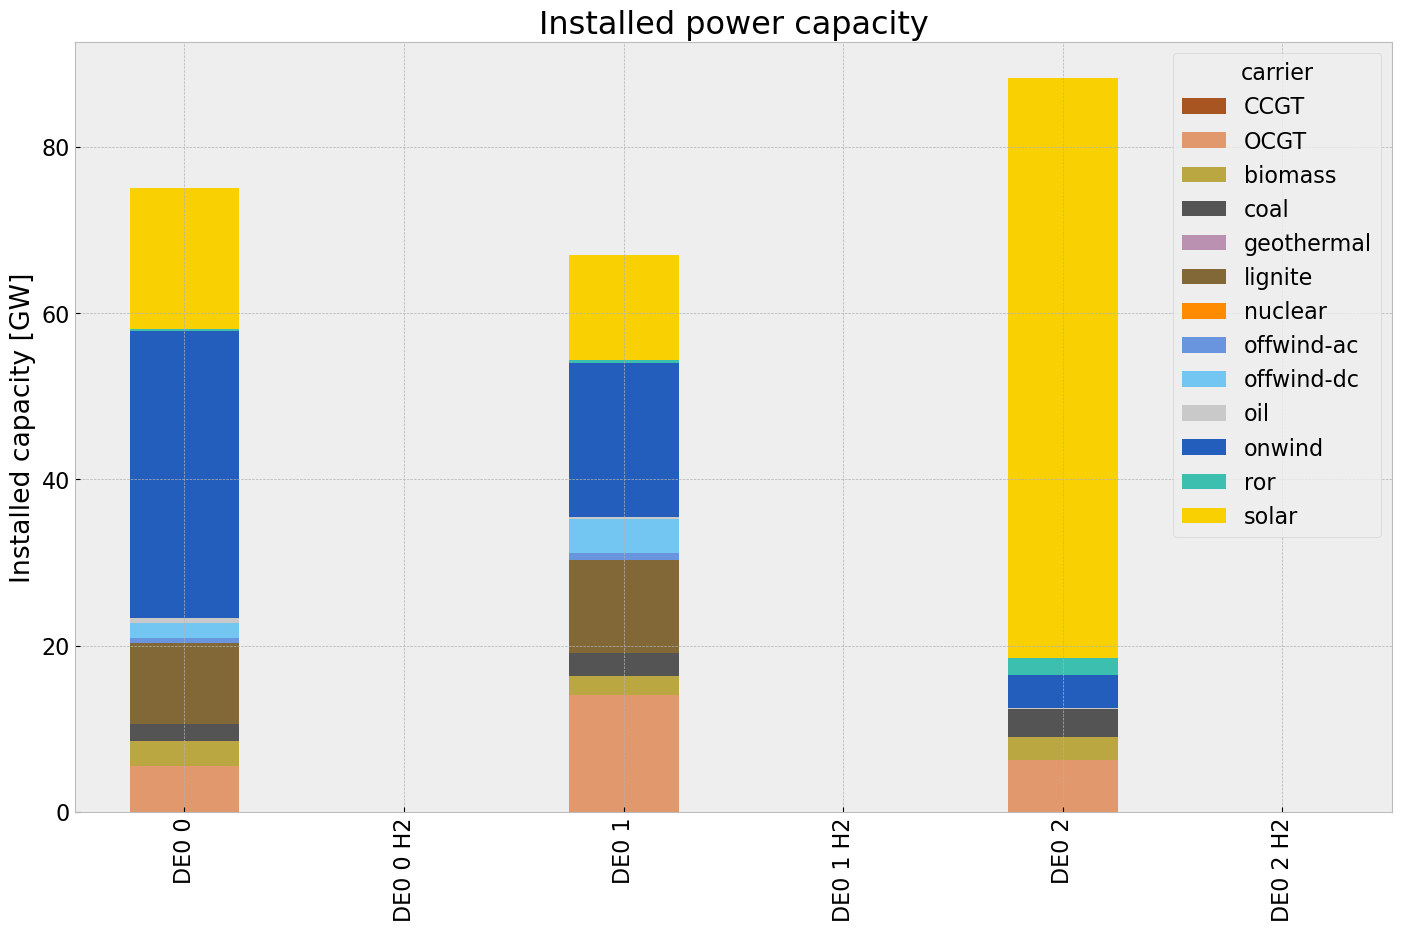

In [783]:
# consolidated istalled cap without load_shedding

capacities_inv = n1.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities_inv.fillna(0, inplace=True)
gen_1 = (capacities_inv.unstack()/1000).drop(columns=['load'],inplace=False)


cap_inv = inst_cap_table(n1, color_cap)


## Generation

<Figure size 640x480 with 0 Axes>

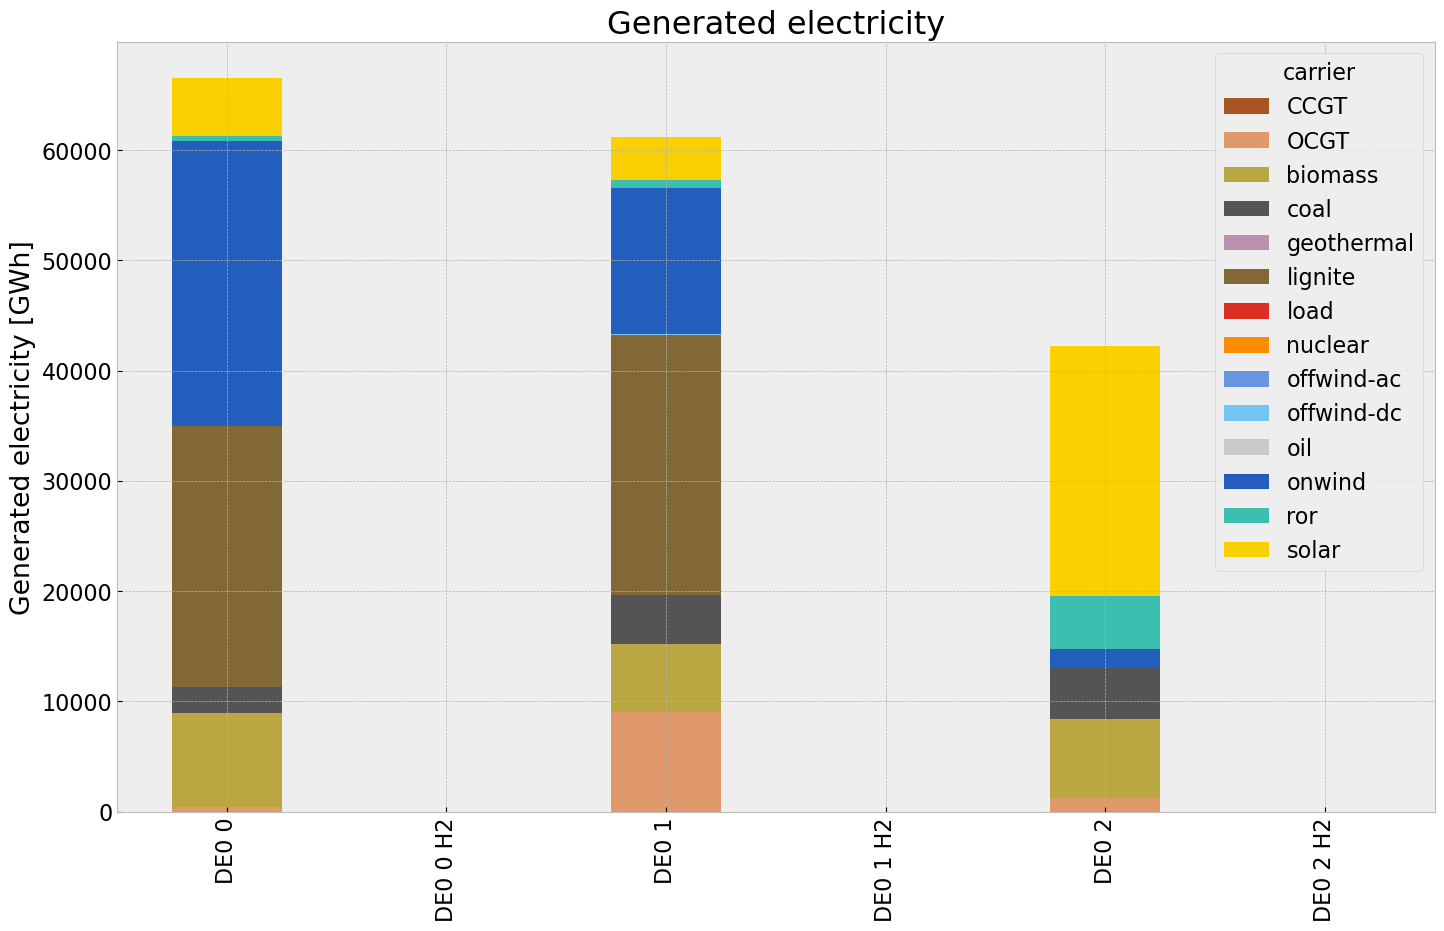

In [784]:
# consolidated generation table
carrier = n1.generators.carrier.unique()
df_tot_generation = n1.generators_t.p.sum()

generations = pd.Series(index = n1.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')
                
generations.fillna(0, inplace=True)
gen_inv = generations.unstack()/1000#Gwh


gen_inv = gen_power_table(n1,colors_gen_table)



## Snapshot

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p_by_carrier.index = pd.date_range(start='2030-01-01', end=

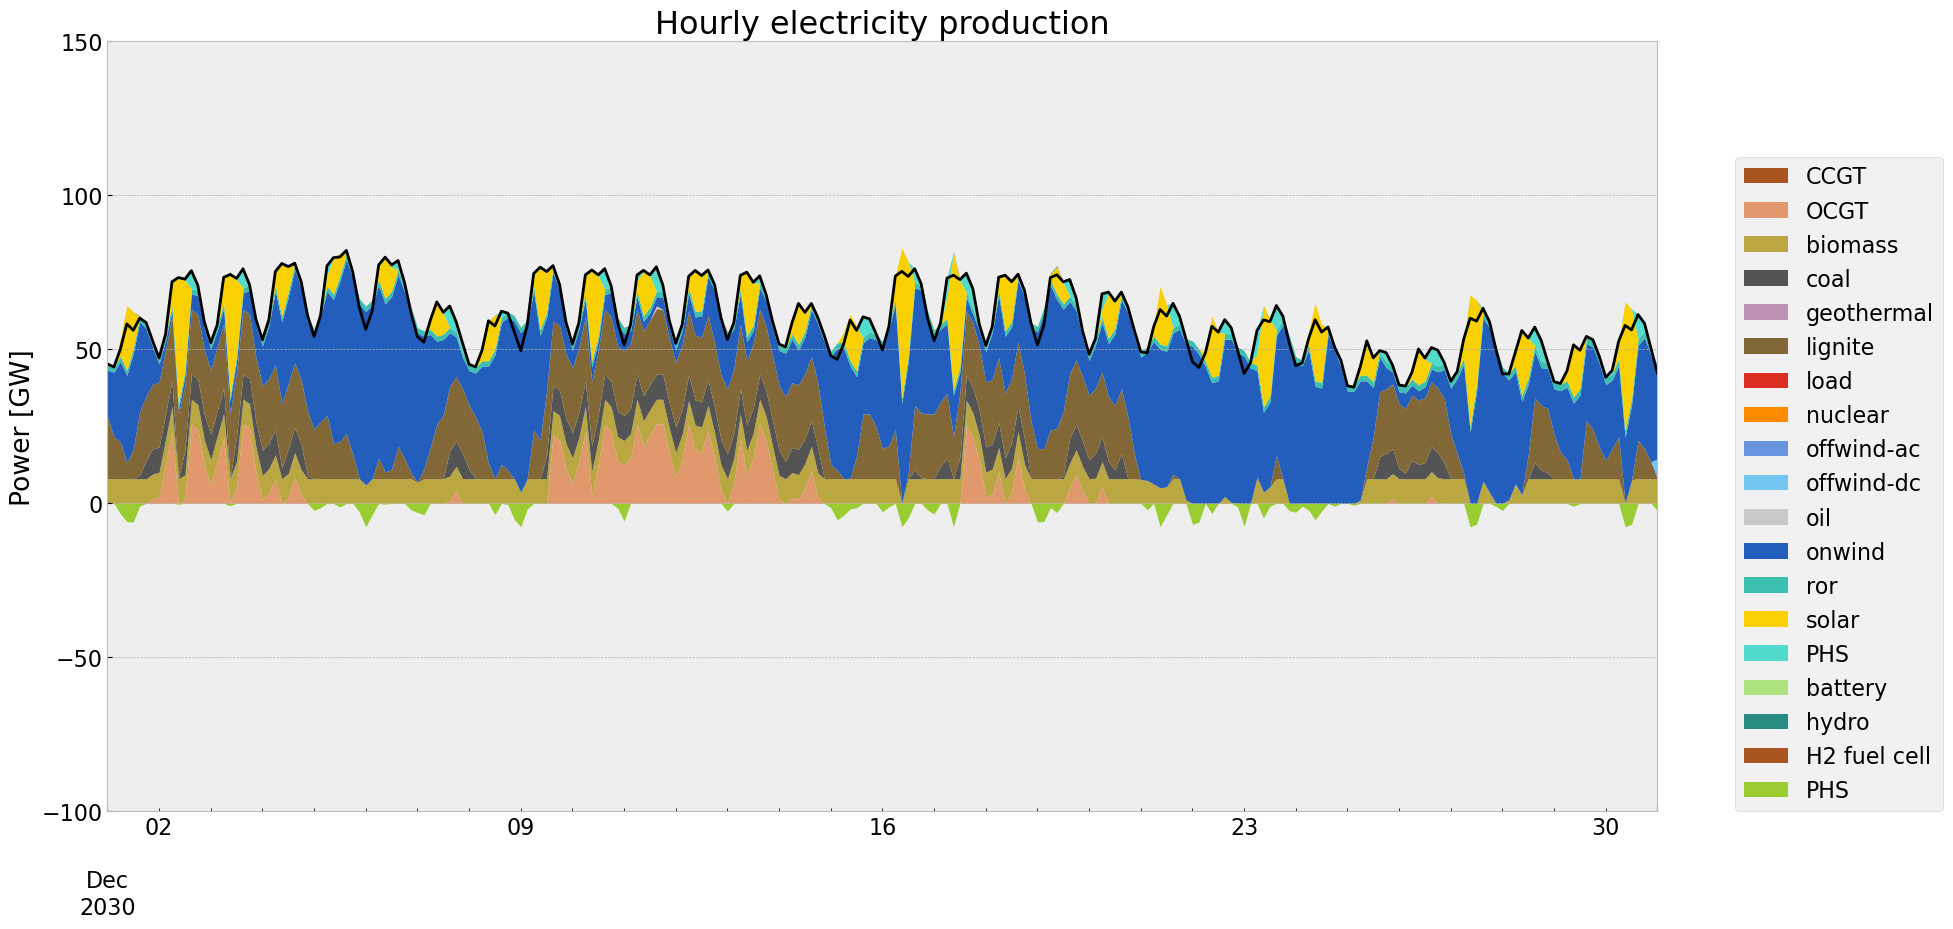

In [785]:
gen_curve(n1, '2030-12-01', '2030-12-31', colors_gen)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p_by_carrier.index = pd.date_range(start='2030-01-01', end=

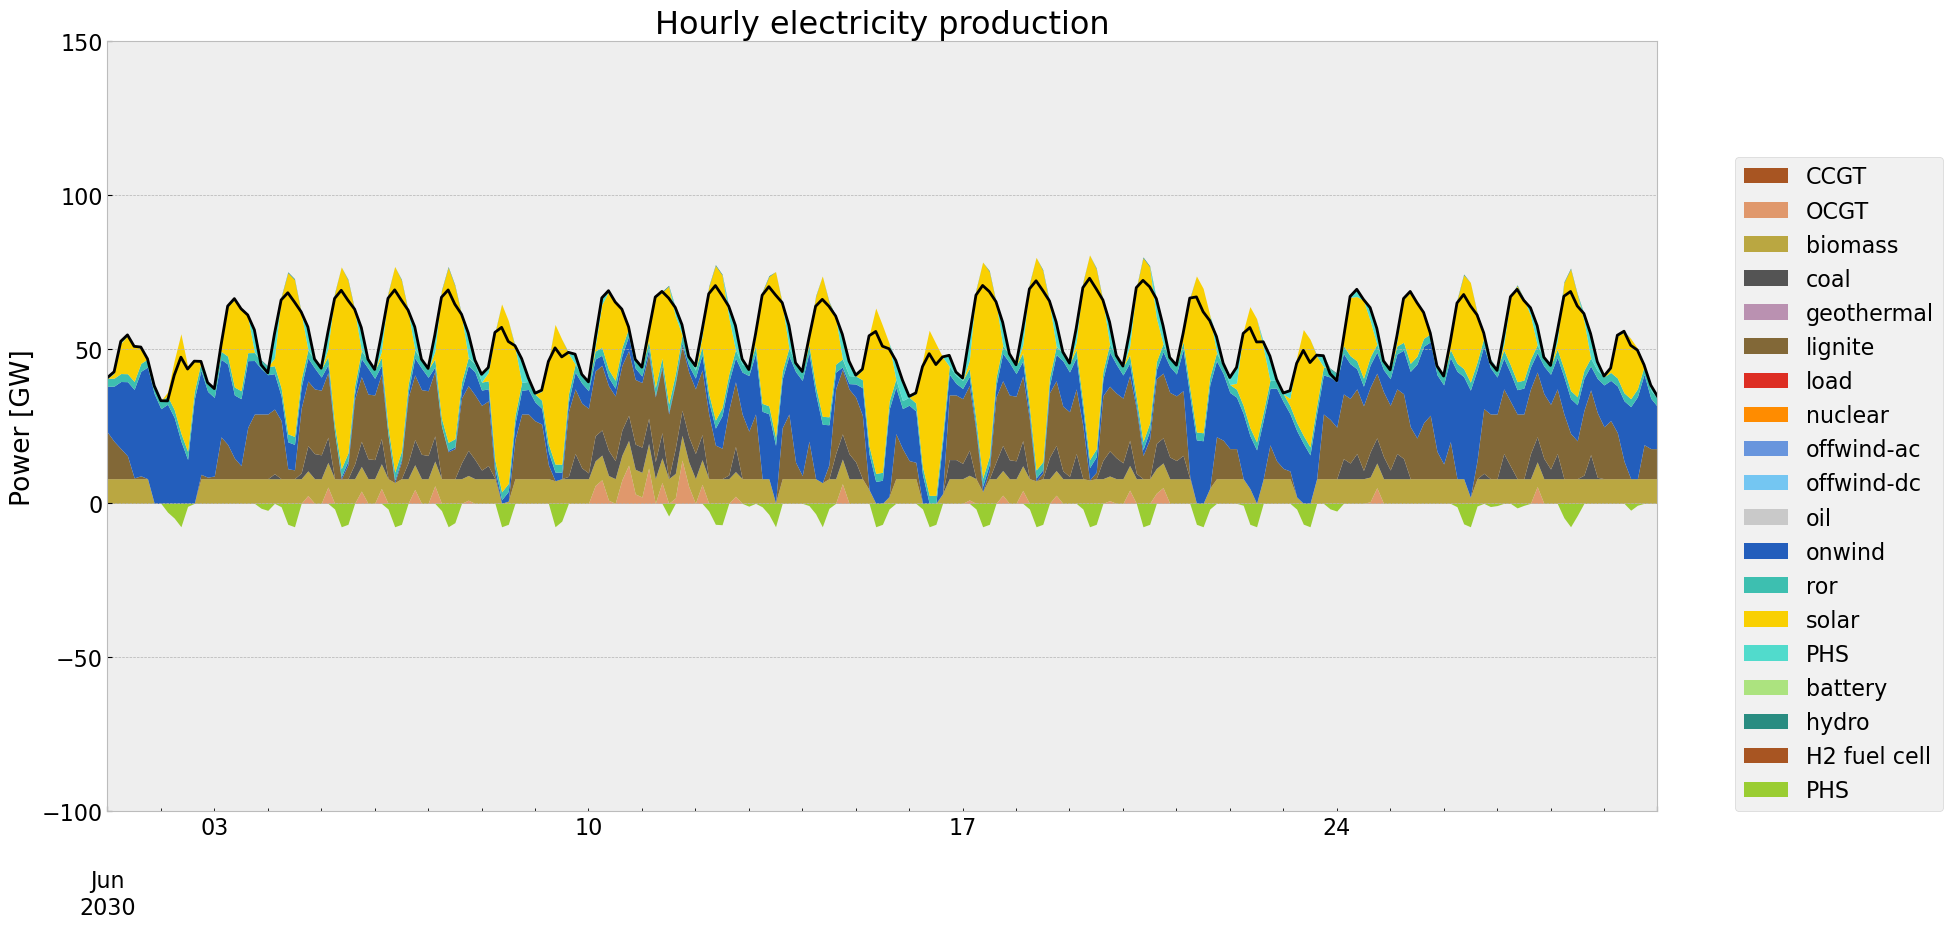

In [786]:
gen_curve(n1, '2030-06-1', '2030-06-30', colors_gen)

## Storage

carrier      PHS  battery   hydro
bus                              
DE0 0    2.87980      0.0     NaN
DE0 1    2.22142      0.0     NaN
DE0 2    2.49800      0.0  0.2895

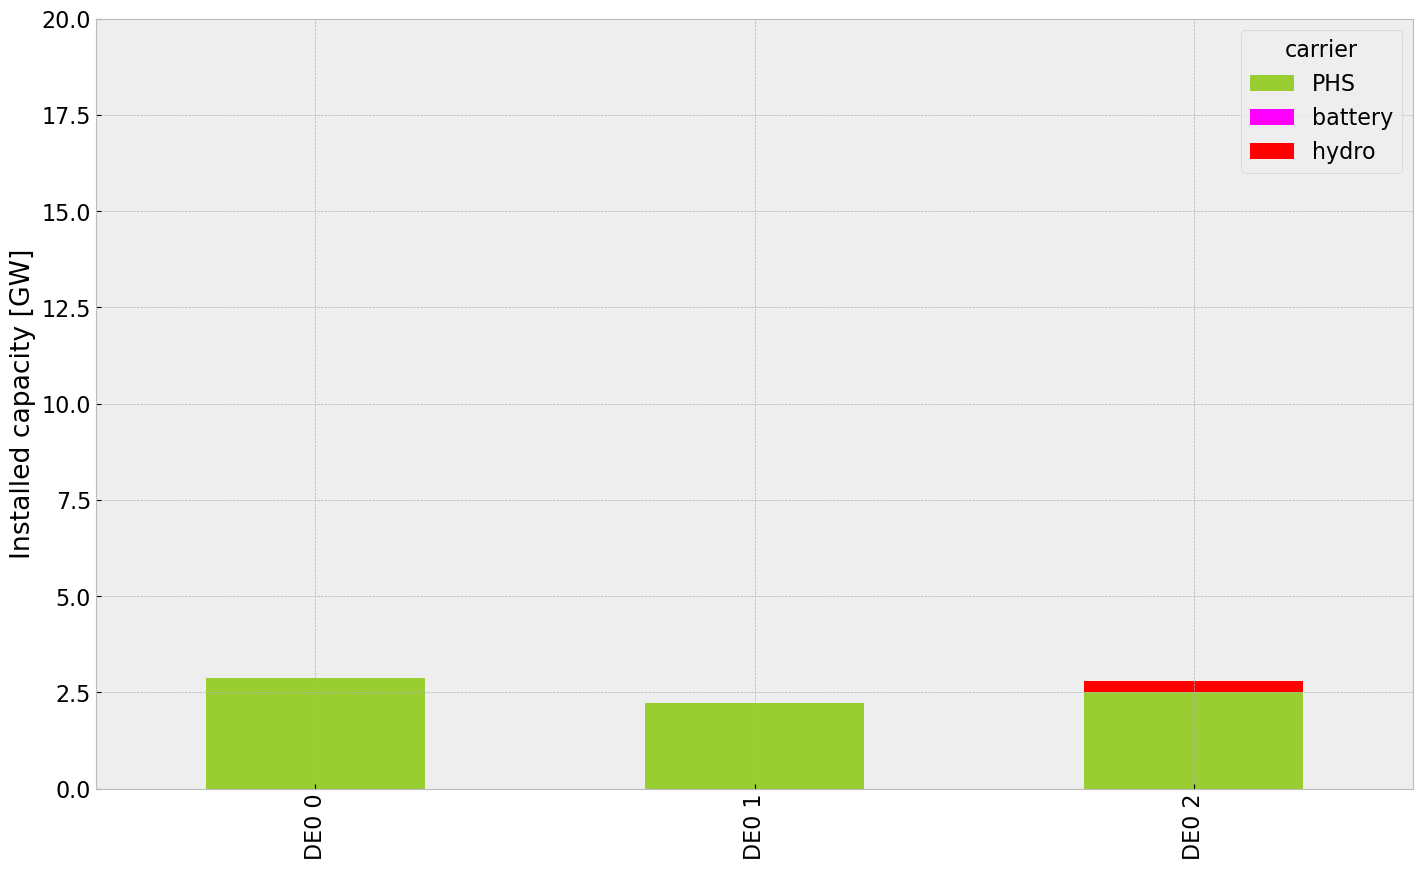

In [787]:
inst_store_table(n1)

carrier    H2
bus          
DE0 0 H2  0.0
DE0 1 H2  0.0
DE0 2 H2  0.0

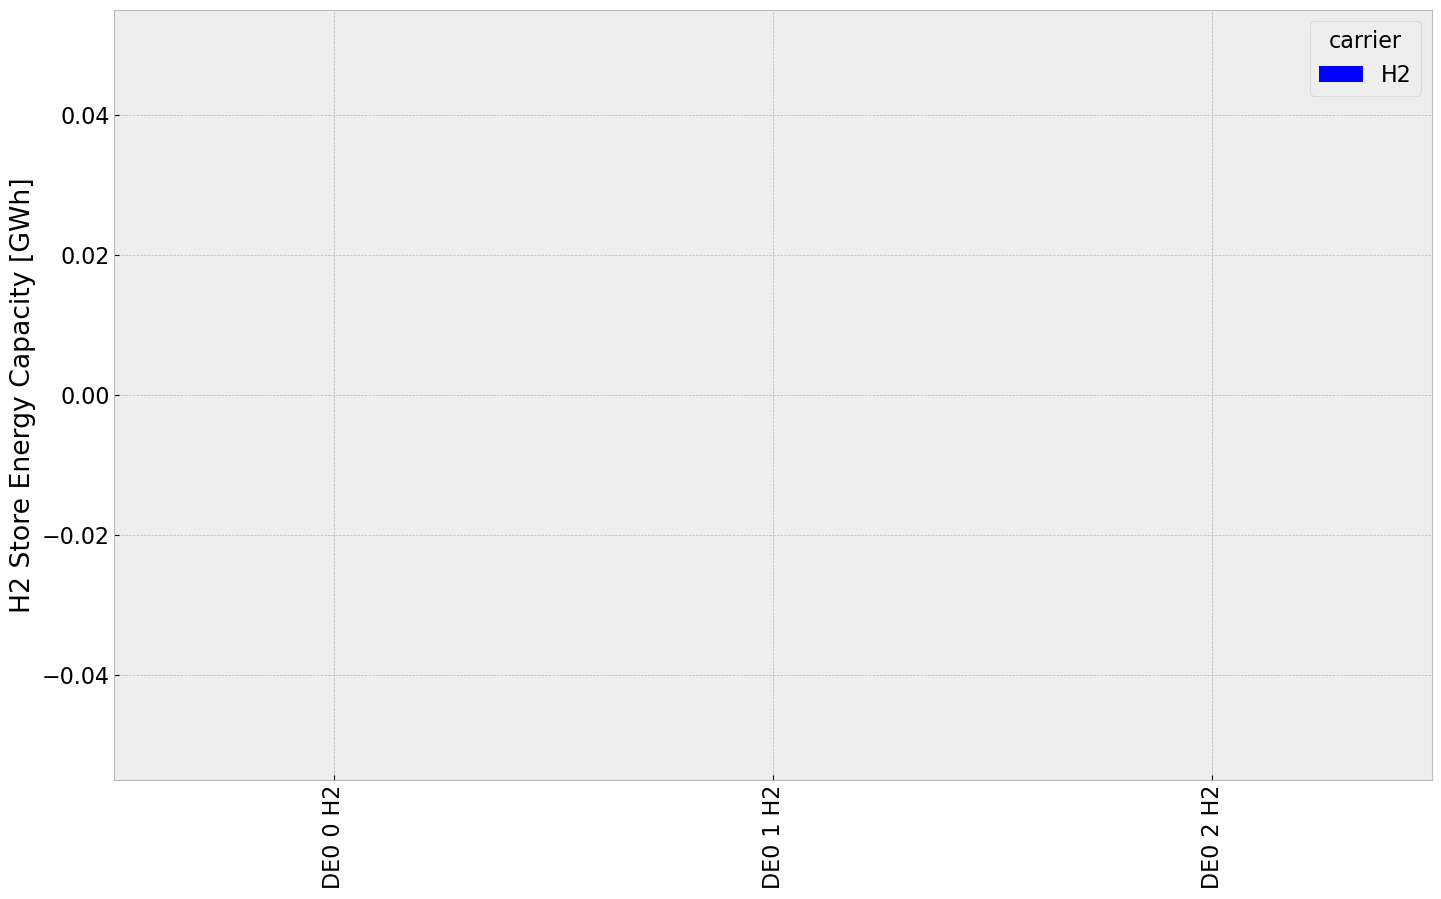

In [788]:
inst_storeh2_table(n1)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\440258284.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\440258284.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  soc.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')


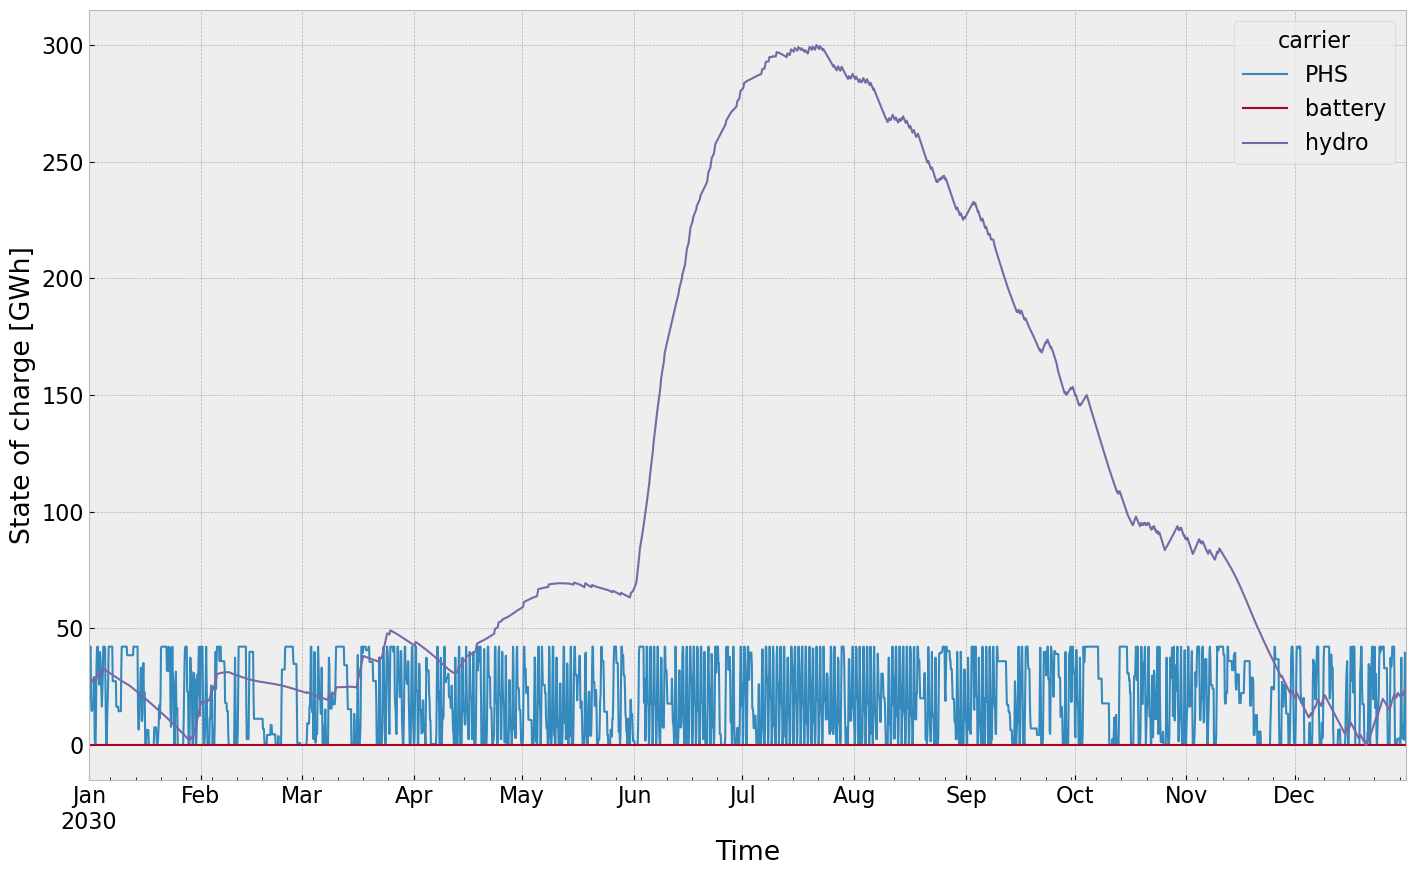

In [789]:
state_of_charge_plot(n1)


## Electricity Price


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


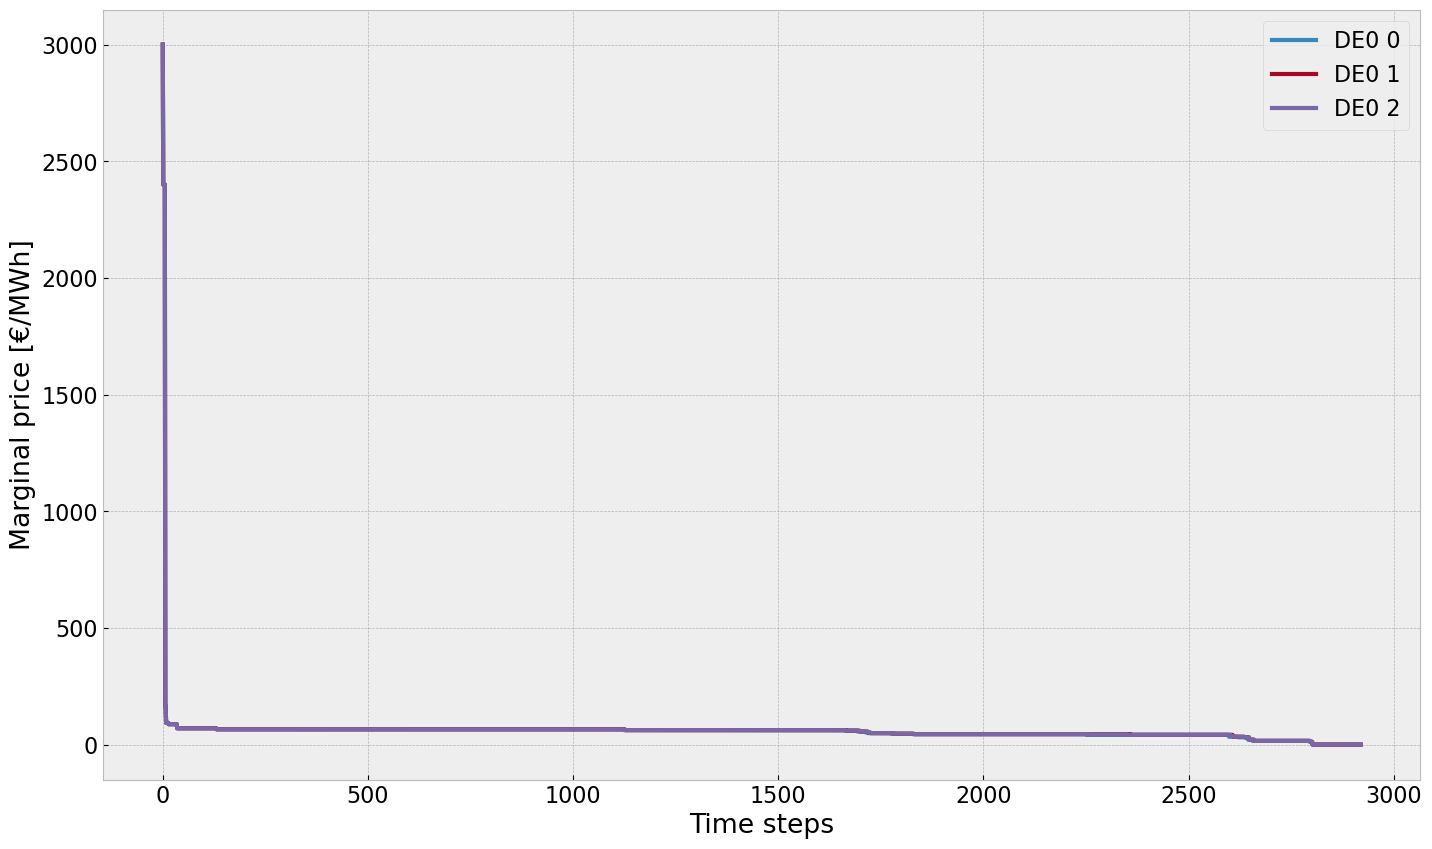

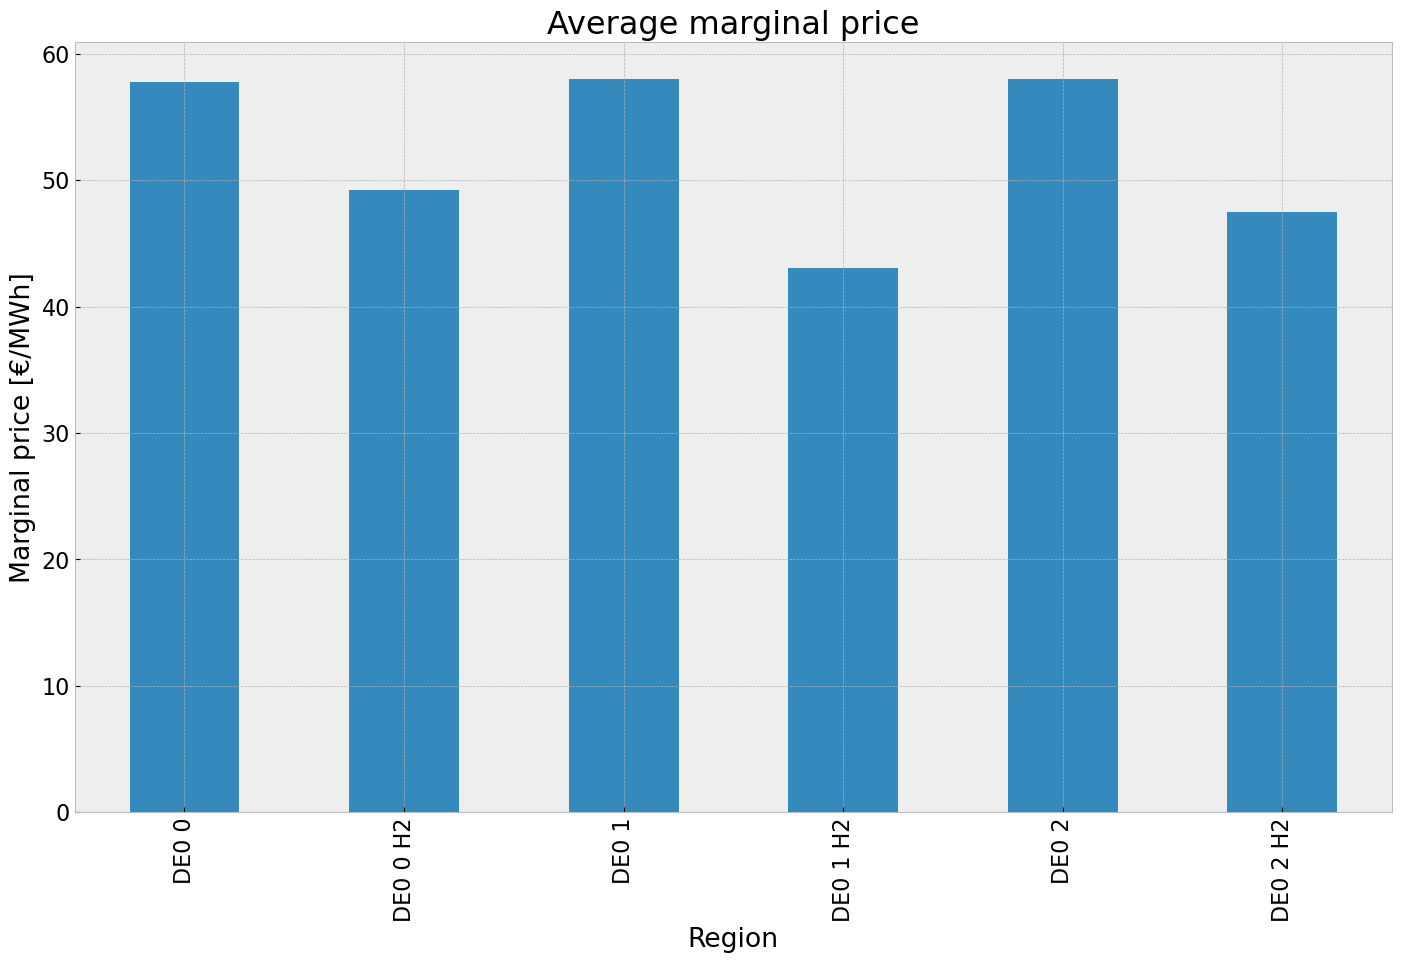

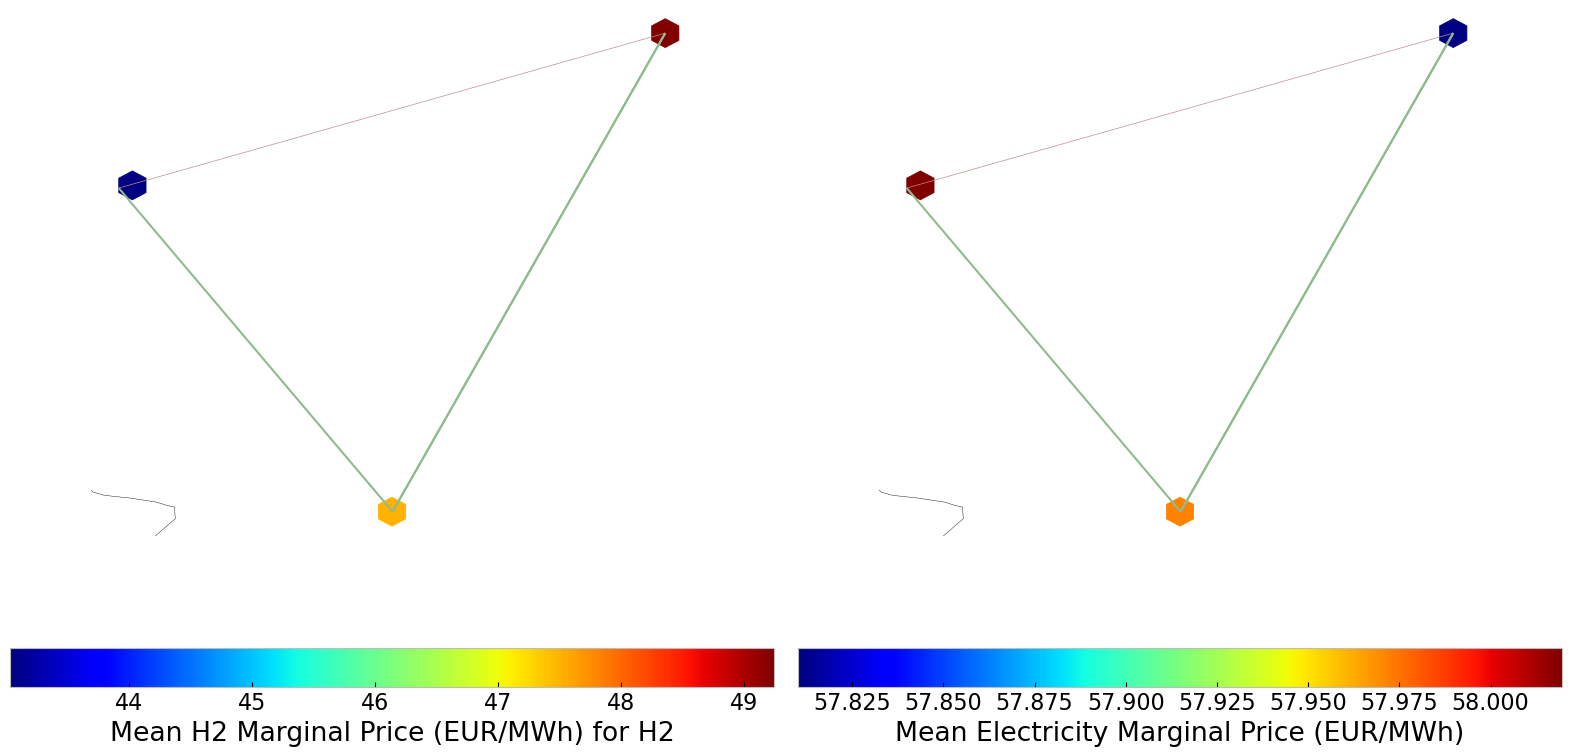

In [790]:
price_dur_curve_plot(n1)
price_regions_table(n1)
price_regions(n1)


## Emission

In [791]:
em_inv =em_table(n1)
em_inv

Generation in MWh  efficiency  emissions in Tonnes CO2/MWh  \
carrier                                                                  
CCGT             0.000000e+00    0.580000                       0.1980   
OCGT             1.062008e+07    0.498516                       0.1980   
biomass          2.188185e+07    0.468000                       0.0000   
coal             1.146584e+07    0.329687                       0.3361   
geothermal       0.000000e+00    1.000000                       0.1200   
lignite          4.730328e+07    0.362723                       0.4069   
load             2.725435e+02    1.000000                       0.0000   
nuclear          0.000000e+00    0.328667                       0.0000   
offwind-ac       9.825109e+03    1.000000                       0.0000   
offwind-dc       4.117236e+04    1.000000                       0.0000   
oil              5.847148e+03    0.376686                       0.2571   
onwind           4.081389e+07    1.000000                       0.0000   
ror              5.951822e+06    0.900000                       0.0000   
solar            3.180268e+07    1.000000                       0.0000   

            emissions in Tonnes CO2  
carrier                              
CCGT                   0.000000e+00  
OCGT                   4.218075e+06  
biomass                0.000000e+00  
coal                   1.168888e+07  
geothermal             0.000000e+00  
lignite                5.306450e+07  
load                   0.000000e+00  
nuclear                0.000000e+00  
offwind-ac             0.000000e+00  
offwind-dc             0.000000e+00  
oil                    3.990867e+03  
onwind                 0.000000e+00  
ror                    0.000000e+00  
solar                  0.000000e+00

## 2. Scenario: perfect foresight with no additional investment

In [792]:
#copy network
n2=n.copy()

#offwind cut
for column in n2.generators_t.p_max_pu.columns:
        if column.endswith('offwind-ac') or column.endswith('offwind-dc'):
                for index,row in n2.generators_t.p_max_pu[column].items():
                        if index >= cut_start and index < cut_end:
                                new_p_max_pu = n2.generators_t.p_max_pu.at[index, column] * 0.0 #0.9
                                n2.generators_t.p_max_pu.at[index, column] = new_p_max_pu
                                #if new_p_max_pu<0:
                                #    n2.generators_t.p_max_pu.at[index, column] = 0


#set the optimal capacity of generators from the base scenario as the new minimum capacity 
for index, value in n2.generators.p_nom_extendable.items():
    if value:  
        n2.generators.at[index, 'p_nom'] = n.generators.at[index, 'p_nom_opt']
        #n2.generators.at[index, 'p_nom_max'] = n.generators.at[index, 'p_nom_opt']
        n2.generators.at[index,'p_nom_extendable'] = False

#set the optimal capacity of storage units from the base scenario as the new minimum capacity 
for index, value in n2.storage_units.p_nom_extendable.items():
    if value:  
        n2.storage_units.at[index, 'p_nom'] = n.storage_units.at[index, 'p_nom_opt']
        #n2.storage_units.at[index, 'p_nom_max'] = n.storage_units.at[index, 'p_nom_opt']
        n2.storage_units.at[index,'p_nom_extendable'] = False

#set the optimal capacity of stores from the base scenario as the new minimum capacity 
for index, value in n2.stores.e_nom_extendable.items():
    if value:  
        n2.stores.at[index, 'e_nom'] = n.stores.at[index, 'e_nom_opt']
        #n2.stores.at[index, 'e_nom_max'] = n.stores.at[index, 'e_nom_opt']
        n2.stores.at[index, 'e_nom_extendable'] =False

#set the optimal capacity of lines from the base scenario as the new minimum capacity 
for index, value in n2.lines.s_nom_extendable.items():
    if value:  
        n2.lines.at[index, 's_nom'] = n.lines.at[index, 's_nom_opt']
        #n2.lines.at[index, 's_nom_max'] = n.lines.at[index, 's_nom_opt']
        n2.lines.at[index, 's_nom_extendable'] =False

In [793]:
n2.optimize.create_model()

Linopy LP model

Variables:
----------
 * Link-p_nom (Link-ext)
 * Generator-p (snapshot, Generator)
 * Line-s (snapshot, Line)
 * Link-p (snapshot, Link)
 * Store-e (snapshot, Store)
 * StorageUnit-p_dispatch (snapshot, StorageUnit)
 * StorageUnit-p_store (snapshot, StorageUnit)
 * StorageUnit-state_of_charge (snapshot, StorageUnit)
 * StorageUnit-spill (snapshot, StorageUnit)
 * Store-p (snapshot, Store)

Constraints:
------------
 * Link-ext-p_nom-lower (Link-ext)
 * Link-ext-p_nom-upper (Link-ext)
 * Generator-fix-p-lower (snapshot, Generator-fix)
 * Generator-fix-p-upper (snapshot, Generator-fix)
 * Line-fix-s-lower (snapshot, Line-fix)
 * Line-fix-s-upper (snapshot, Line-fix)
 * Link-ext-p-lower (snapshot, Link-ext)
 * Link-ext-p-upper (snapshot, Link-ext)
 * Store-fix-e-lower (snapshot, Store-fix)
 * Store-fix-e-upper (snapshot, Store-fix)
 * StorageUnit-fix-p_dispatch-lower (snapshot, StorageUnit-fix)
 * StorageUnit-fix-p_dispatch-upper (snapshot, StorageUnit-fix)
 * StorageUni

In [794]:
n2.optimize(solver_name ='gurobi')
#optimize.optimize_with_rolling_horizon(n2, horizon=24, overlap=0, solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 10/10 [00:00<00:00, 10.24it/s]
INFO:linopy.io: Writing time: 6.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jj5himc4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jj5himc4.lp


Reading time = 2.12 seconds


INFO:gurobipy:Reading time = 2.12 seconds


obj: 511014 rows, 242358 columns, 911044 nonzeros


INFO:gurobipy:obj: 511014 rows, 242358 columns, 911044 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 511014 rows, 242358 columns and 911044 nonzeros


INFO:gurobipy:Optimize a model with 511014 rows, 242358 columns and 911044 nonzeros


Model fingerprint: 0x3341e2bf


INFO:gurobipy:Model fingerprint: 0x3341e2bf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+01, 9e+02]


INFO:gurobipy:  Bounds range     [3e+01, 9e+02]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 452620 rows and 101365 columns


INFO:gurobipy:Presolve removed 452620 rows and 101365 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 58394 rows, 140993 columns, 310339 nonzeros


INFO:gurobipy:Presolved: 58394 rows, 140993 columns, 310339 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 9


INFO:gurobipy: Dense cols : 9


 AA' NZ     : 1.548e+05


INFO:gurobipy: AA' NZ     : 1.548e+05


 Factor NZ  : 1.024e+06 (roughly 90 MB of memory)


INFO:gurobipy: Factor NZ  : 1.024e+06 (roughly 90 MB of memory)


 Factor Ops : 1.961e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.961e+07 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.59098538e+19 -1.73840424e+20  4.42e+13 1.18e+06  3.44e+15     1s


INFO:gurobipy:   0   1.59098538e+19 -1.73840424e+20  4.42e+13 1.18e+06  3.44e+15     1s


   1   1.14968129e+19 -4.12457828e+19  3.27e+13 2.44e+05  2.00e+15     1s


INFO:gurobipy:   1   1.14968129e+19 -4.12457828e+19  3.27e+13 2.44e+05  2.00e+15     1s


   2   1.04156762e+19 -9.60636263e+18  2.95e+13 1.33e+04  1.68e+15     1s


INFO:gurobipy:   2   1.04156762e+19 -9.60636263e+18  2.95e+13 1.33e+04  1.68e+15     1s


   3   3.25203908e+17 -6.57884644e+17  7.35e+11 3.74e+02  4.38e+13     2s


INFO:gurobipy:   3   3.25203908e+17 -6.57884644e+17  7.35e+11 3.74e+02  4.38e+13     2s


   4   4.26784683e+16 -5.58315322e+16  3.12e+08 7.56e+00  3.61e+11     2s


INFO:gurobipy:   4   4.26784683e+16 -5.58315322e+16  3.12e+08 7.56e+00  3.61e+11     2s


   5   4.94378802e+15 -2.75331727e+15  5.65e+03 3.01e-01  2.69e+10     2s


INFO:gurobipy:   5   4.94378802e+15 -2.75331727e+15  5.65e+03 3.01e-01  2.69e+10     2s


   6   1.08190511e+13 -4.19172176e+13  7.86e+00 2.39e-03  1.81e+08     2s


INFO:gurobipy:   6   1.08190511e+13 -4.19172176e+13  7.86e+00 2.39e-03  1.81e+08     2s


   7   4.56921393e+12 -1.37628615e+13  3.08e+00 7.21e-04  6.31e+07     2s


INFO:gurobipy:   7   4.56921393e+12 -1.37628615e+13  3.08e+00 7.21e-04  6.31e+07     2s


   8   2.56567358e+12 -5.12338673e+12  1.69e+00 2.64e-04  2.64e+07     2s


INFO:gurobipy:   8   2.56567358e+12 -5.12338673e+12  1.69e+00 2.64e-04  2.64e+07     2s


   9   8.85216034e+11 -1.31529897e+12  5.05e-01 6.20e-05  7.57e+06     2s


INFO:gurobipy:   9   8.85216034e+11 -1.31529897e+12  5.05e-01 6.20e-05  7.57e+06     2s


  10   5.17132966e+10 -1.38188343e+11  1.99e-02 3.29e-06  6.53e+05     3s


INFO:gurobipy:  10   5.17132966e+10 -1.38188343e+11  1.99e-02 3.29e-06  6.53e+05     3s


  11   2.86029141e+10 -2.41751424e+10  7.38e-03 7.19e-07  1.82e+05     3s


INFO:gurobipy:  11   2.86029141e+10 -2.41751424e+10  7.38e-03 7.19e-07  1.82e+05     3s


  12   1.73026468e+10 -9.01431451e+08  2.58e-03 2.20e-07  6.26e+04     3s


INFO:gurobipy:  12   1.73026468e+10 -9.01431451e+08  2.58e-03 2.20e-07  6.26e+04     3s


  13   1.41214166e+10  3.10976677e+09  1.58e-03 1.11e-07  3.79e+04     3s


INFO:gurobipy:  13   1.41214166e+10  3.10976677e+09  1.58e-03 1.11e-07  3.79e+04     3s


  14   1.12199090e+10  5.25591645e+09  7.83e-04 5.42e-08  2.05e+04     3s


INFO:gurobipy:  14   1.12199090e+10  5.25591645e+09  7.83e-04 5.42e-08  2.05e+04     3s


  15   9.56099266e+09  6.16328264e+09  3.97e-04 3.02e-08  1.17e+04     3s


INFO:gurobipy:  15   9.56099266e+09  6.16328264e+09  3.97e-04 3.02e-08  1.17e+04     3s


  16   8.83978876e+09  6.50802966e+09  2.46e-04 2.25e-08  8.02e+03     3s


INFO:gurobipy:  16   8.83978876e+09  6.50802966e+09  2.46e-04 2.25e-08  8.02e+03     3s


  17   8.50716294e+09  6.96868224e+09  1.78e-04 1.21e-08  5.29e+03     3s


INFO:gurobipy:  17   8.50716294e+09  6.96868224e+09  1.78e-04 1.21e-08  5.29e+03     3s


  18   8.15371270e+09  7.22483418e+09  1.09e-04 6.42e-09  3.19e+03     4s


INFO:gurobipy:  18   8.15371270e+09  7.22483418e+09  1.09e-04 6.42e-09  3.19e+03     4s


  19   7.94948456e+09  7.34601295e+09  7.00e-05 4.08e-09  2.08e+03     4s


INFO:gurobipy:  19   7.94948456e+09  7.34601295e+09  7.00e-05 4.08e-09  2.08e+03     4s


  20   7.83927485e+09  7.42525862e+09  4.96e-05 2.60e-09  1.42e+03     4s


INFO:gurobipy:  20   7.83927485e+09  7.42525862e+09  4.96e-05 2.60e-09  1.42e+03     4s


  21   7.74734182e+09  7.47693955e+09  3.64e-05 1.67e-09  9.30e+02     4s


INFO:gurobipy:  21   7.74734182e+09  7.47693955e+09  3.64e-05 1.67e-09  9.30e+02     4s


  22   7.67430909e+09  7.52423204e+09  2.96e-05 8.55e-10  5.16e+02     4s


INFO:gurobipy:  22   7.67430909e+09  7.52423204e+09  2.96e-05 8.55e-10  5.16e+02     4s


  23   7.63471364e+09  7.53849356e+09  3.11e-05 6.08e-10  3.31e+02     4s


INFO:gurobipy:  23   7.63471364e+09  7.53849356e+09  3.11e-05 6.08e-10  3.31e+02     4s


  24   7.62671796e+09  7.54585115e+09  2.52e-05 4.82e-10  2.78e+02     4s


INFO:gurobipy:  24   7.62671796e+09  7.54585115e+09  2.52e-05 4.82e-10  2.78e+02     4s


  25   7.61278834e+09  7.55641537e+09  2.39e-05 5.02e-10  1.94e+02     4s


INFO:gurobipy:  25   7.61278834e+09  7.55641537e+09  2.39e-05 5.02e-10  1.94e+02     4s


  26   7.60414888e+09  7.56256947e+09  2.35e-05 4.53e-10  1.43e+02     4s


INFO:gurobipy:  26   7.60414888e+09  7.56256947e+09  2.35e-05 4.53e-10  1.43e+02     4s


  27   7.58991333e+09  7.56854044e+09  2.82e-05 4.42e-10  7.35e+01     5s


INFO:gurobipy:  27   7.58991333e+09  7.56854044e+09  2.82e-05 4.42e-10  7.35e+01     5s


  28   7.58170917e+09  7.57219652e+09  1.31e-05 5.10e-10  3.27e+01     5s


INFO:gurobipy:  28   7.58170917e+09  7.57219652e+09  1.31e-05 5.10e-10  3.27e+01     5s


  29   7.57997828e+09  7.57381612e+09  1.02e-05 5.07e-10  2.12e+01     5s


INFO:gurobipy:  29   7.57997828e+09  7.57381612e+09  1.02e-05 5.07e-10  2.12e+01     5s


  30   7.57791440e+09  7.57468644e+09  9.39e-06 5.35e-10  1.11e+01     5s


INFO:gurobipy:  30   7.57791440e+09  7.57468644e+09  9.39e-06 5.35e-10  1.11e+01     5s


  31   7.57720810e+09  7.57509054e+09  7.47e-06 5.27e-10  7.28e+00     5s


INFO:gurobipy:  31   7.57720810e+09  7.57509054e+09  7.47e-06 5.27e-10  7.28e+00     5s


  32   7.57627678e+09  7.57517928e+09  2.49e-05 4.49e-10  3.77e+00     5s


INFO:gurobipy:  32   7.57627678e+09  7.57517928e+09  2.49e-05 4.49e-10  3.77e+00     5s


  33   7.57564610e+09  7.57537985e+09  1.41e-05 5.88e-10  9.16e-01     5s


INFO:gurobipy:  33   7.57564610e+09  7.57537985e+09  1.41e-05 5.88e-10  9.16e-01     5s


  34   7.57544270e+09  7.57542679e+09  5.39e-06 5.50e-10  5.47e-02     5s


INFO:gurobipy:  34   7.57544270e+09  7.57542679e+09  5.39e-06 5.50e-10  5.47e-02     5s


  35   7.57543784e+09  7.57543332e+09  1.20e-06 4.69e-10  1.56e-02     6s


INFO:gurobipy:  35   7.57543784e+09  7.57543332e+09  1.20e-06 4.69e-10  1.56e-02     6s


  36   7.57543712e+09  7.57543552e+09  5.80e-07 4.99e-10  5.51e-03     6s


INFO:gurobipy:  36   7.57543712e+09  7.57543552e+09  5.80e-07 4.99e-10  5.51e-03     6s


  37   7.57543674e+09  7.57543602e+09  2.56e-07 5.51e-10  2.49e-03     6s


INFO:gurobipy:  37   7.57543674e+09  7.57543602e+09  2.56e-07 5.51e-10  2.49e-03     6s


  38   7.57543645e+09  7.57543637e+09  2.88e-08 4.89e-10  2.67e-04     6s


INFO:gurobipy:  38   7.57543645e+09  7.57543637e+09  2.88e-08 4.89e-10  2.67e-04     6s


  39   7.57543641e+09  7.57543640e+09  1.24e-08 7.00e-10  3.97e-05     6s


INFO:gurobipy:  39   7.57543641e+09  7.57543640e+09  1.24e-08 7.00e-10  3.97e-05     6s


  40   7.57543640e+09  7.57543640e+09  7.05e-08 6.99e-10  1.15e-06     6s


INFO:gurobipy:  40   7.57543640e+09  7.57543640e+09  7.05e-08 6.99e-10  1.15e-06     6s


  41   7.57543640e+09  7.57543640e+09  1.36e-04 6.98e-10  1.15e-09     6s


INFO:gurobipy:  41   7.57543640e+09  7.57543640e+09  1.36e-04 6.98e-10  1.15e-09     6s


INFO:gurobipy:


Barrier solved model in 41 iterations and 6.42 seconds (2.44 work units)


INFO:gurobipy:Barrier solved model in 41 iterations and 6.42 seconds (2.44 work units)


Optimal objective 7.57543640e+09


INFO:gurobipy:Optimal objective 7.57543640e+09


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   38900    7.5754364e+09   0.000000e+00   0.000000e+00      7s


INFO:gurobipy:   38900    7.5754364e+09   0.000000e+00   0.000000e+00      7s


INFO:gurobipy:


Solved in 38900 iterations and 6.72 seconds (3.53 work units)


INFO:gurobipy:Solved in 38900 iterations and 6.72 seconds (3.53 work units)


Optimal objective  7.575436403e+09


INFO:gurobipy:Optimal objective  7.575436403e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 242358 primals, 511014 duals
Objective: 7.58e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

('ok', 'optimal')

In [795]:
tot_cos_noinv=n2.objective/1e9 #billion €
system_cost_noinv = system_cost(n2) #million €/a
marg_price_region_noinv = n2.buses_t.marginal_price.mean()
stat_noinv = n2.statistics()

## Installed Capacity

Since expansion is not allowed in this scenario, the installed capacity will equal to that of the base scenario.

<Figure size 640x480 with 0 Axes>

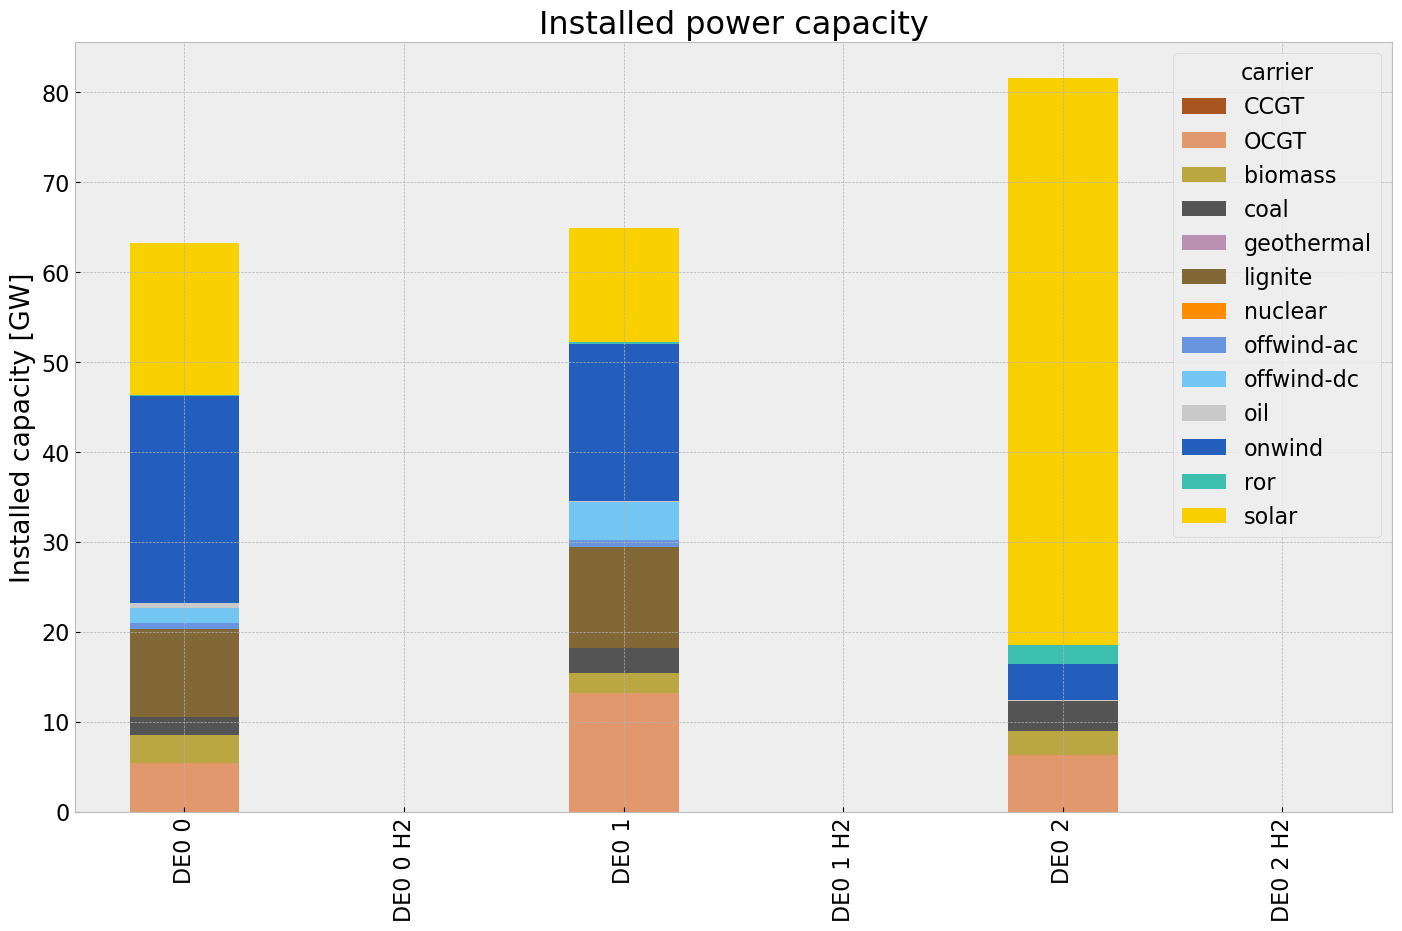

In [796]:
# consolidated istalled cap without load_shedding

capacities_noinv = n2.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities_noinv.fillna(0, inplace=True)
gen = (capacities_noinv.unstack()/1000).drop(columns=['load'],inplace=False)


cap_noinv = inst_cap_table(n2, color_cap)



## Generation

<Figure size 640x480 with 0 Axes>

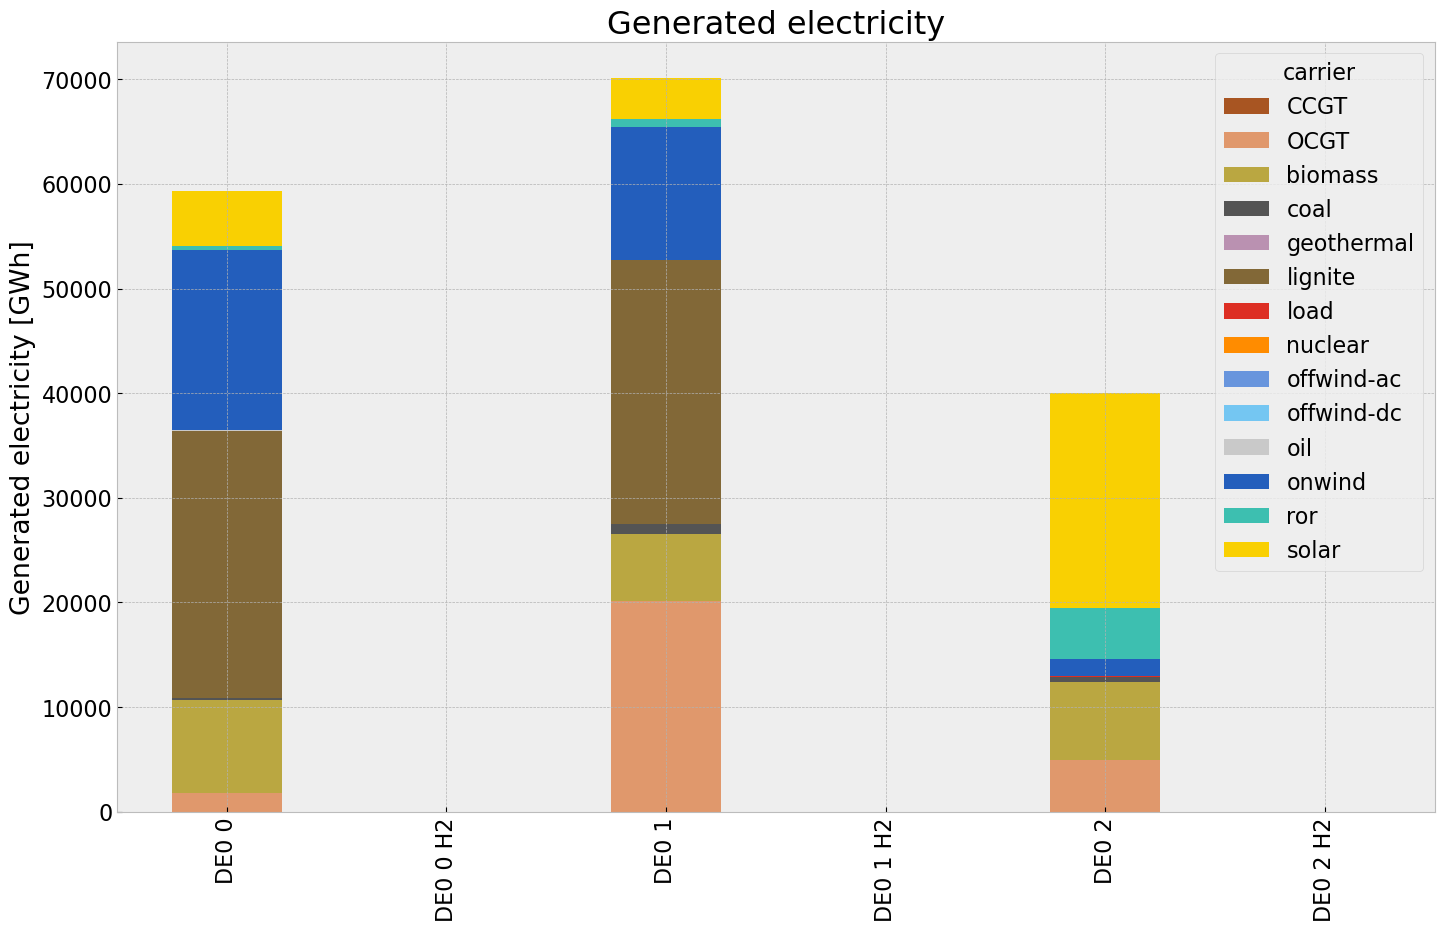

In [797]:
# consolidated generation table
carrier = n2.generators.carrier.unique()
df_tot_generation = n2.generators_t.p.sum()

generations = pd.Series(index = n2.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')

generations.fillna(0, inplace=True)
gen_noinv = generations.unstack()/1000#GWh

gen_noinv= gen_power_table(n2,colors_gen_table)




## Snapshot

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\2615338355.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p = n2.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\2615338355.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n2.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carrier

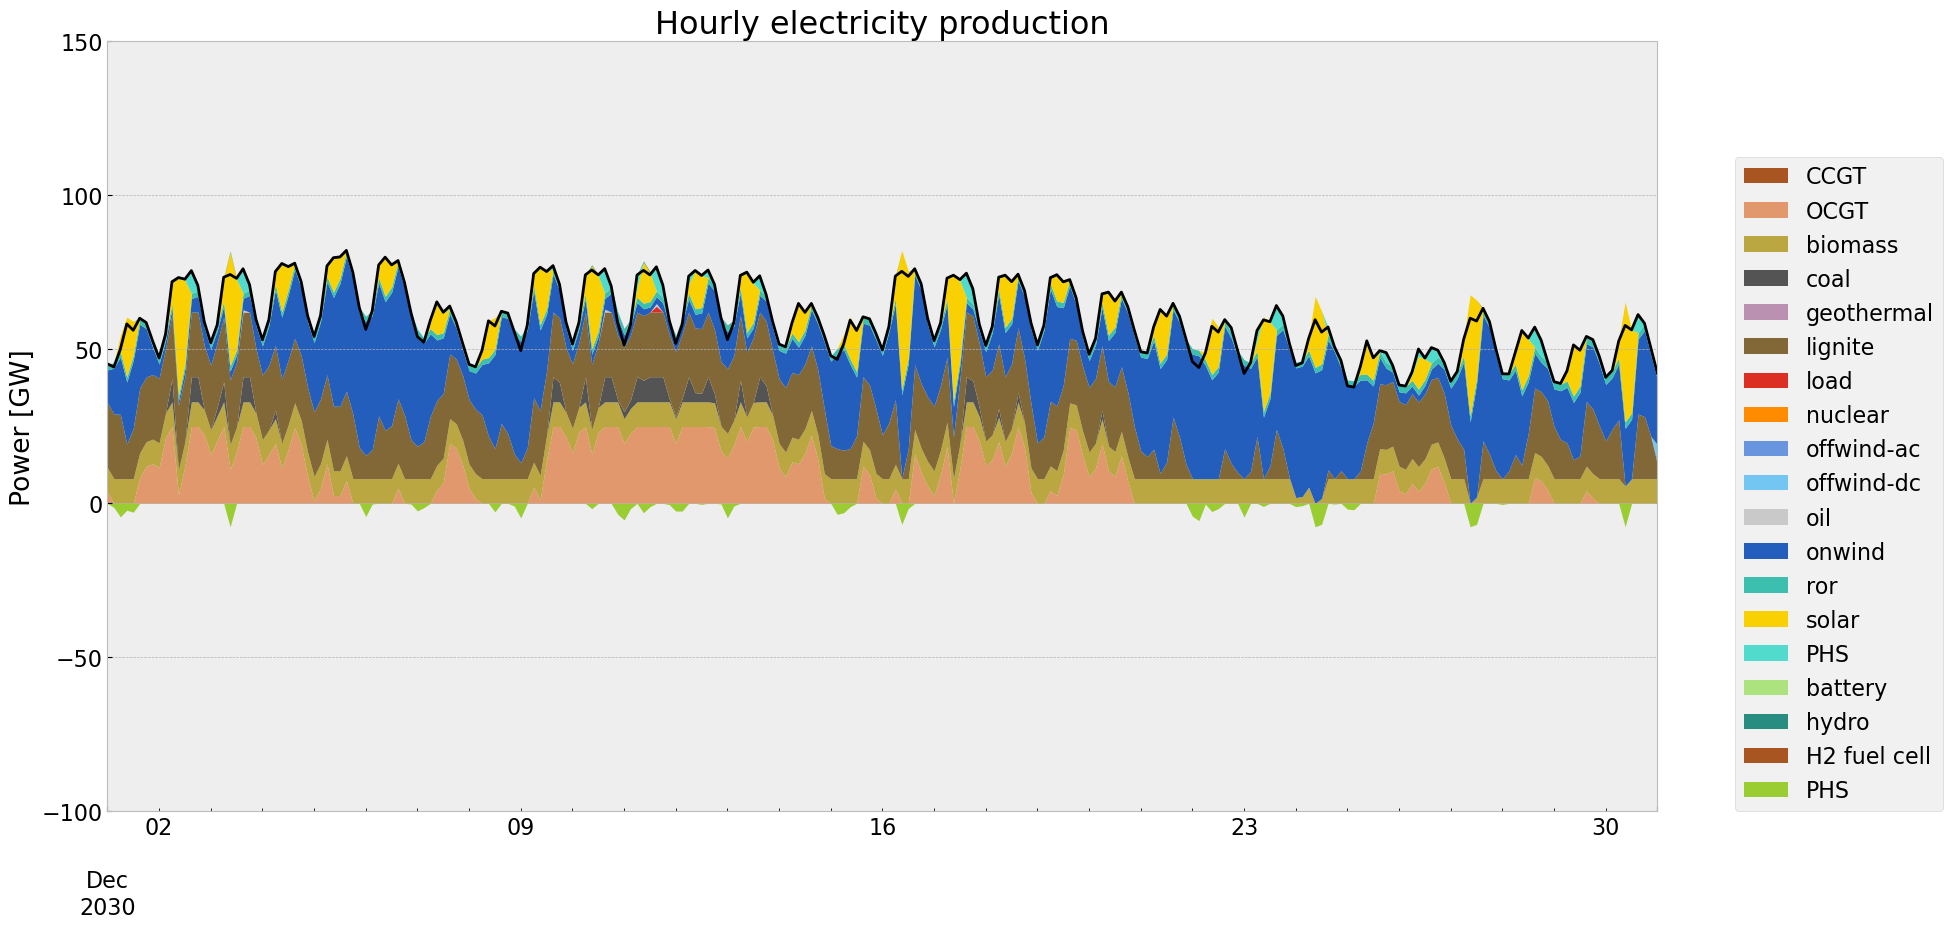

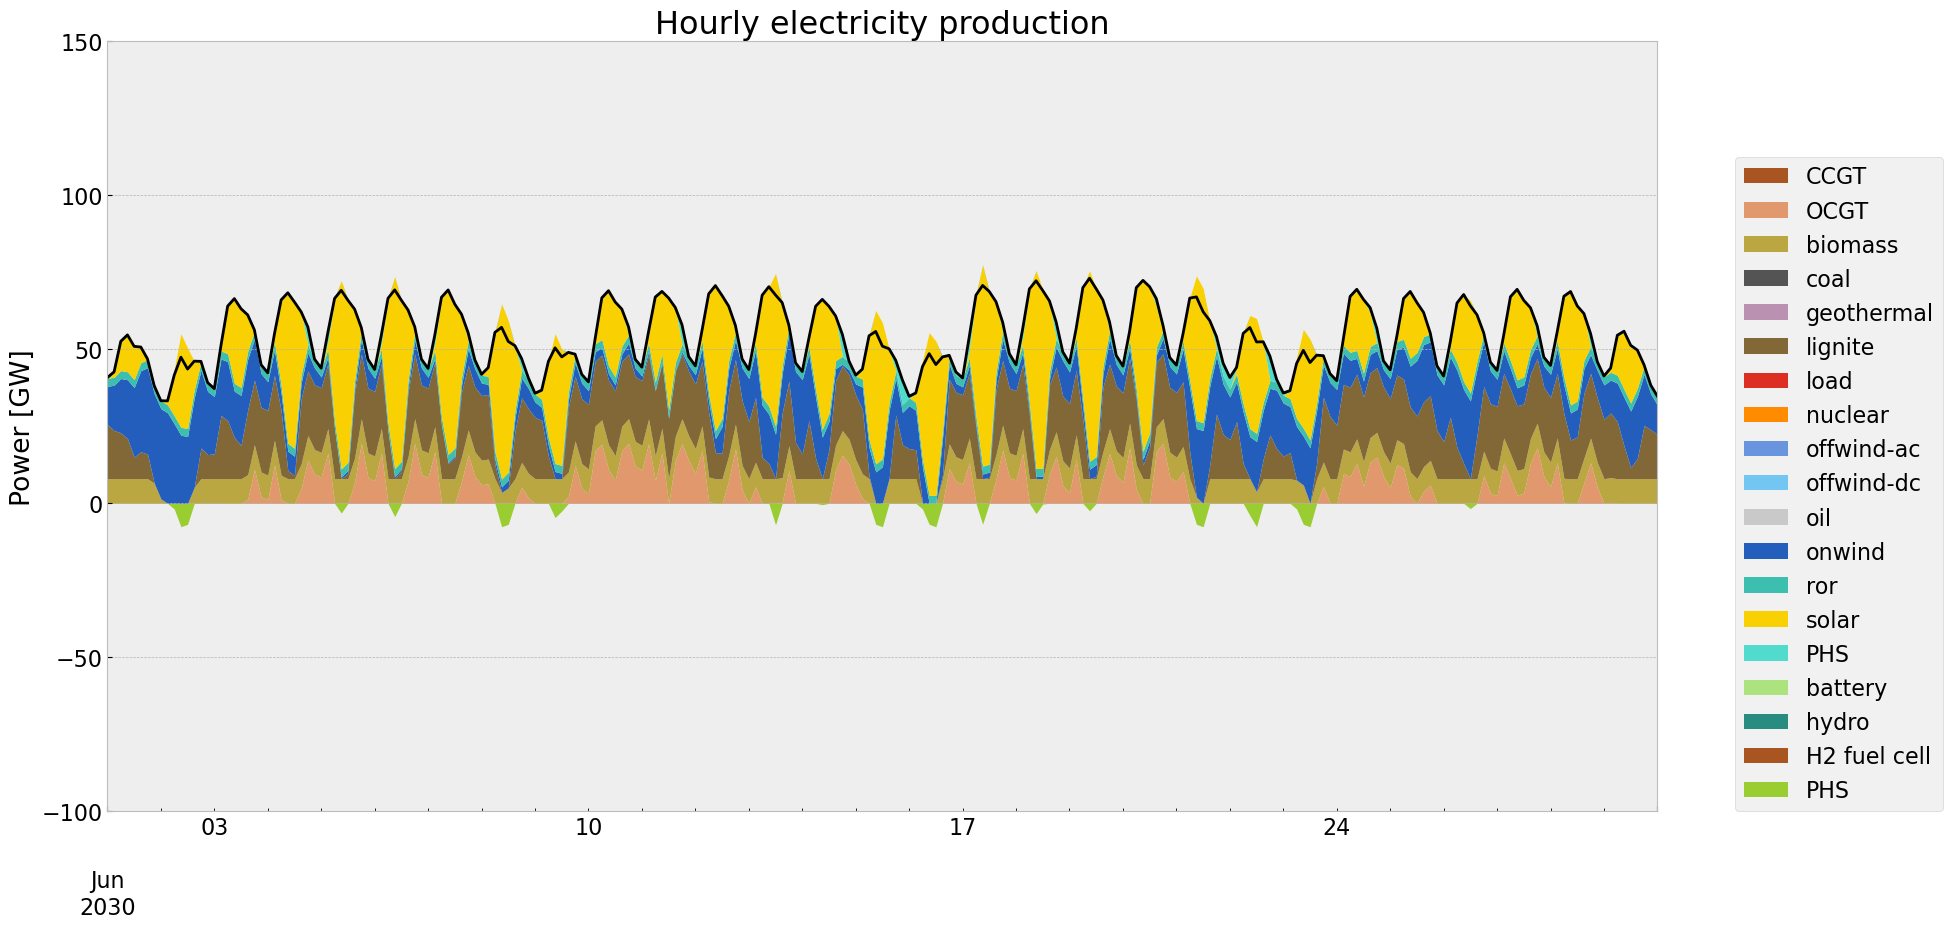

In [798]:
p = n2.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
sto = n2.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)    

gen_curve(n2, '2030-12-01', '2030-12-31', colors_gen)
gen_curve(n2, '2030-06-01', '2030-06-30', colors_gen)


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\440258284.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\440258284.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  soc.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\2144961626.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  n2.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3).loc[pd.date_range(start="2013-01-01", end="2013-12-31",freq='3H')].plot(figsize=(20,10))
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\2144961626.py:5: FutureWarning: 'H' is deprecated and will be removed in a future

Generation in MWh  efficiency  emissions in Tonnes CO2/MWh  \
carrier                                                                  
CCGT             0.000000e+00    0.580000                       0.1980   
OCGT             2.680186e+07    0.498516                       0.1980   
biomass          2.284636e+07    0.468000                       0.0000   
coal             1.565037e+06    0.329687                       0.3361   
geothermal       0.000000e+00    1.000000                       0.1200   
lignite          5.080593e+07    0.362723                       0.4069   
load             1.284167e+04    1.000000                       0.0000   
nuclear          0.000000e+00    0.328667                       0.0000   
offwind-ac       9.825109e+03    1.000000                       0.0000   
offwind-dc       4.117236e+04    1.000000                       0.0000   
oil              1.925917e+04    0.376686                       0.2571   
onwind           3.167950e+07    1.000000                       0.0000   
ror              5.951822e+06    0.900000                       0.0000   
solar            2.966702e+07    1.000000                       0.0000   

            emissions in Tonnes CO2  
carrier                              
CCGT                   0.000000e+00  
OCGT                   1.064514e+07  
biomass                0.000000e+00  
coal                   1.595481e+06  
geothermal             0.000000e+00  
lignite                5.699375e+07  
load                   0.000000e+00  
nuclear                0.000000e+00  
offwind-ac             0.000000e+00  
offwind-dc             0.000000e+00  
oil                    1.314500e+04  
onwind                 0.000000e+00  
ror                    0.000000e+00  
solar                  0.000000e+00

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


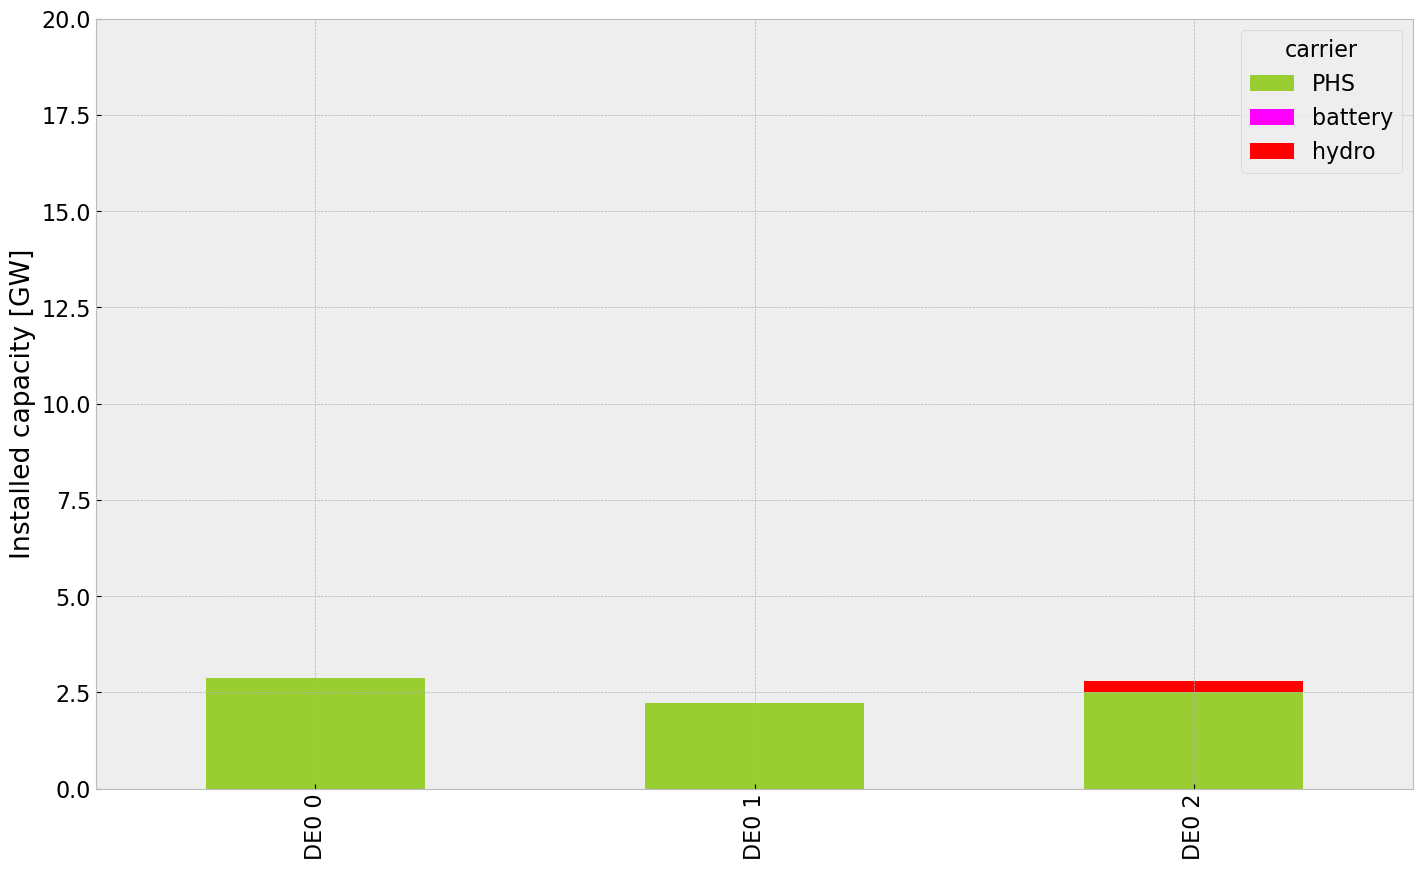

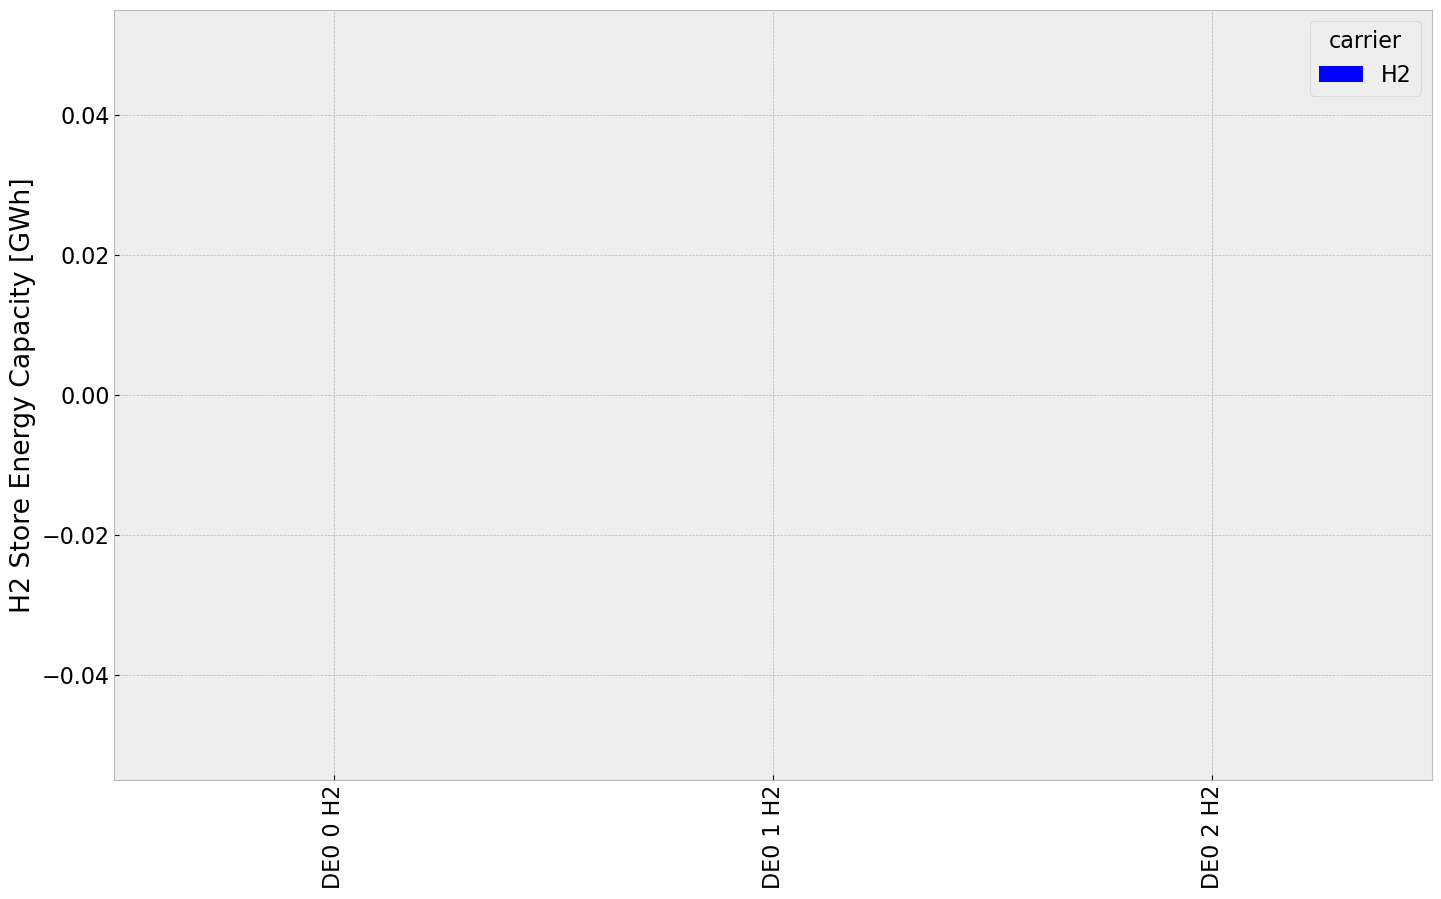

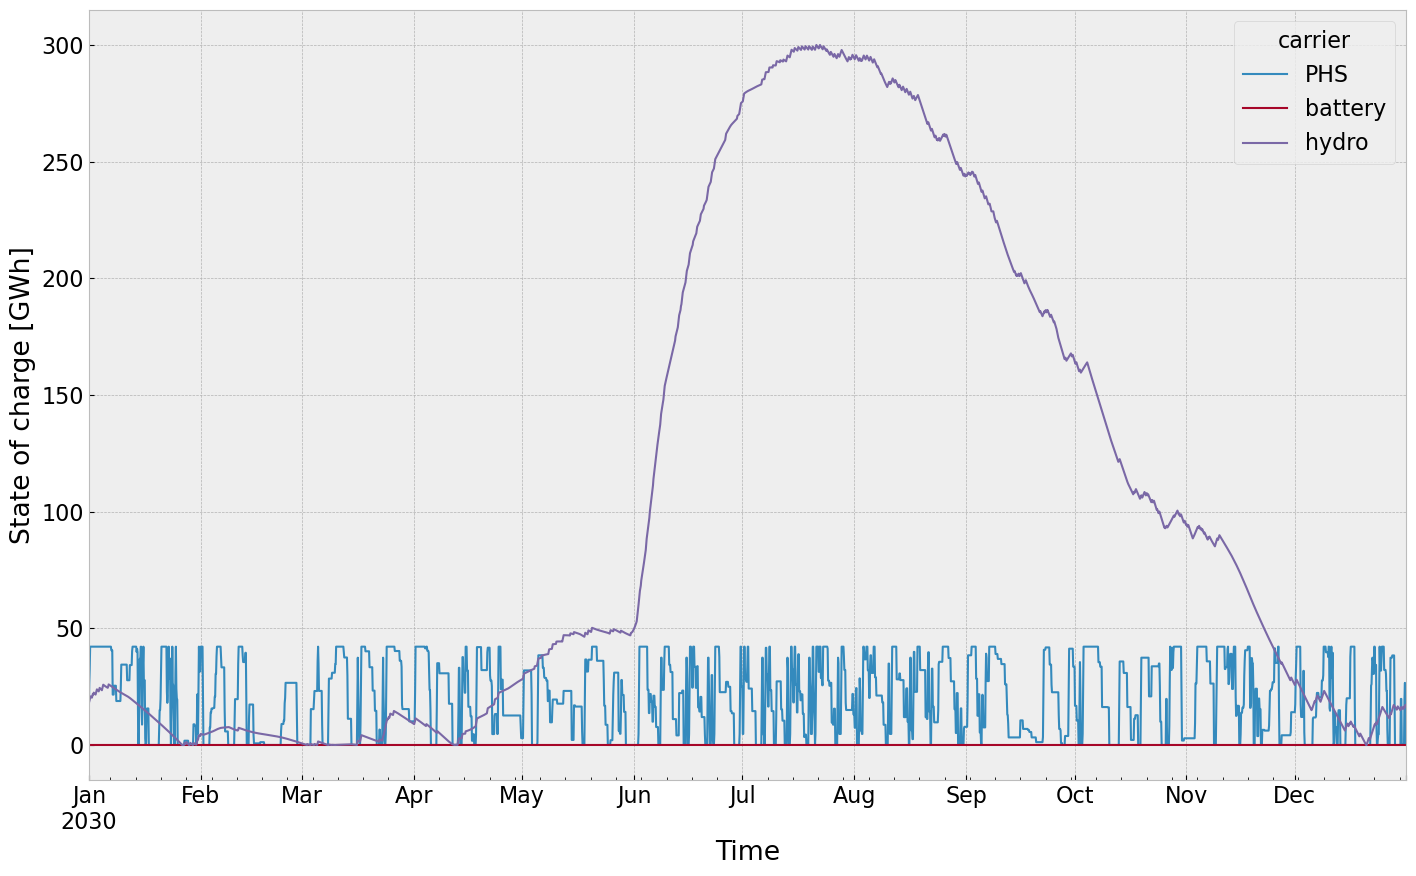

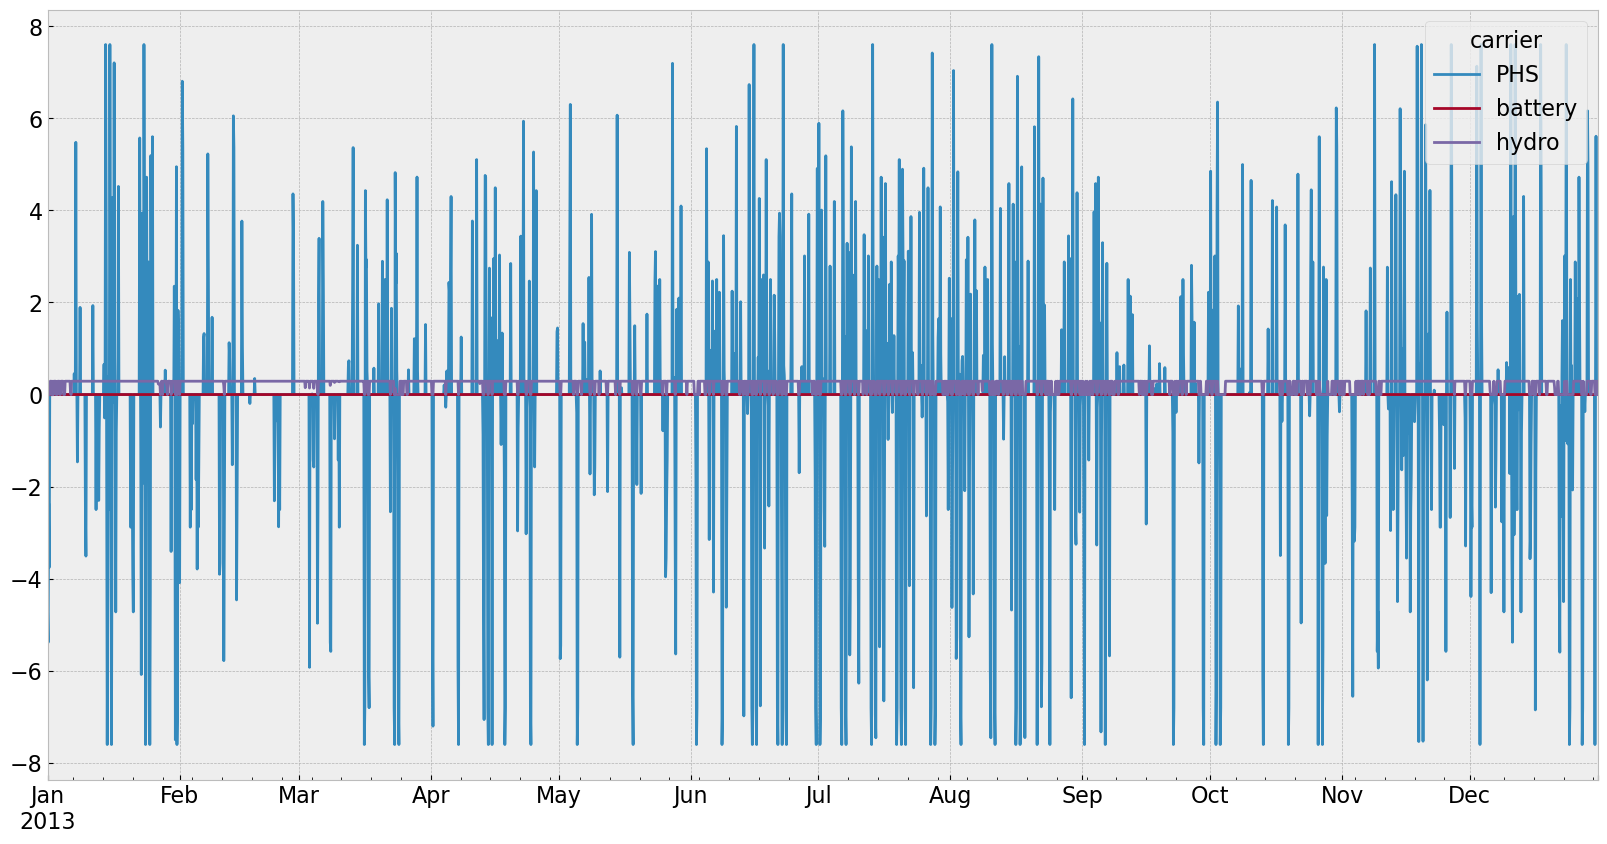

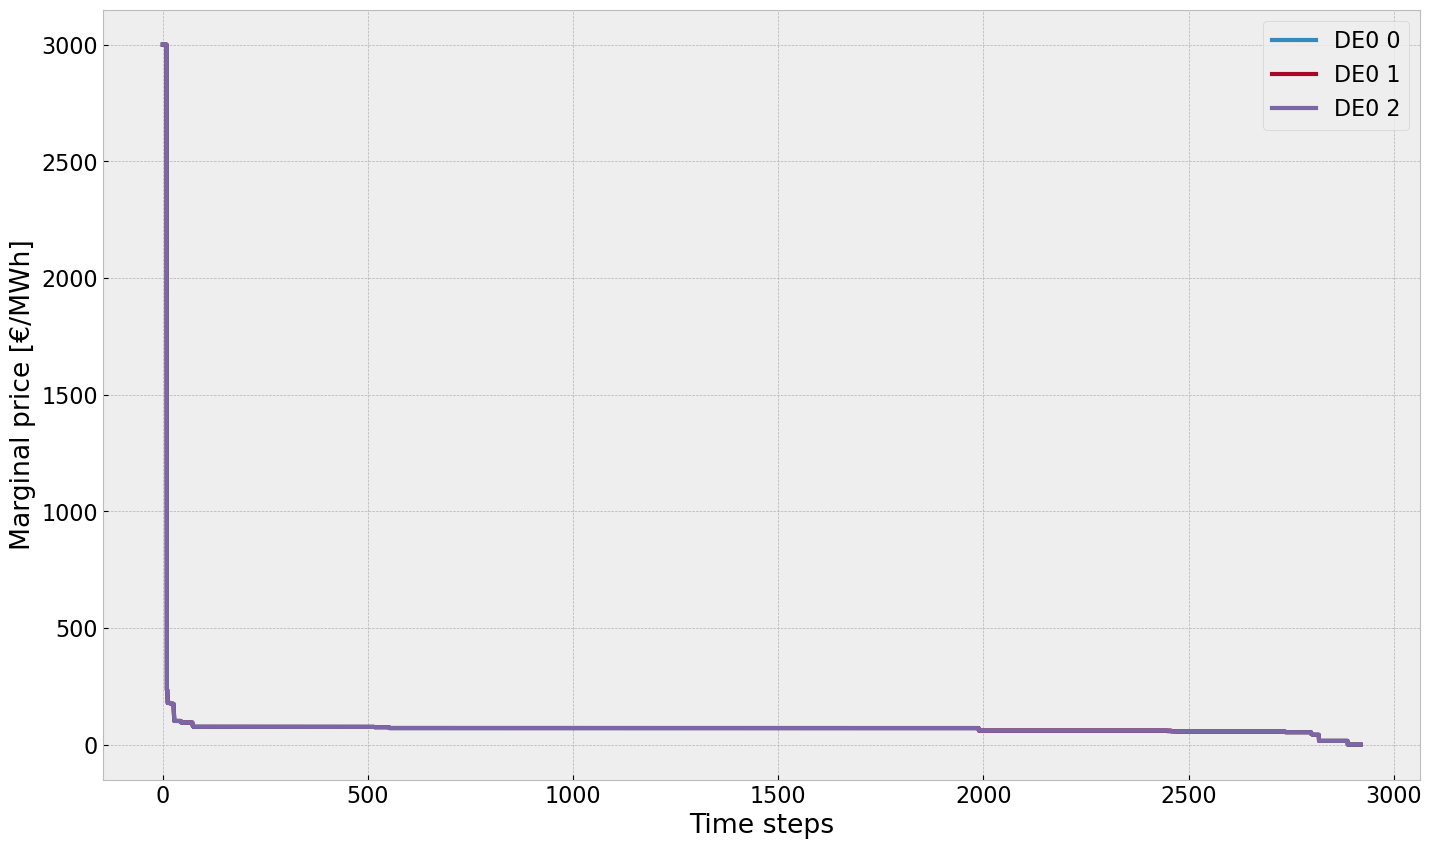

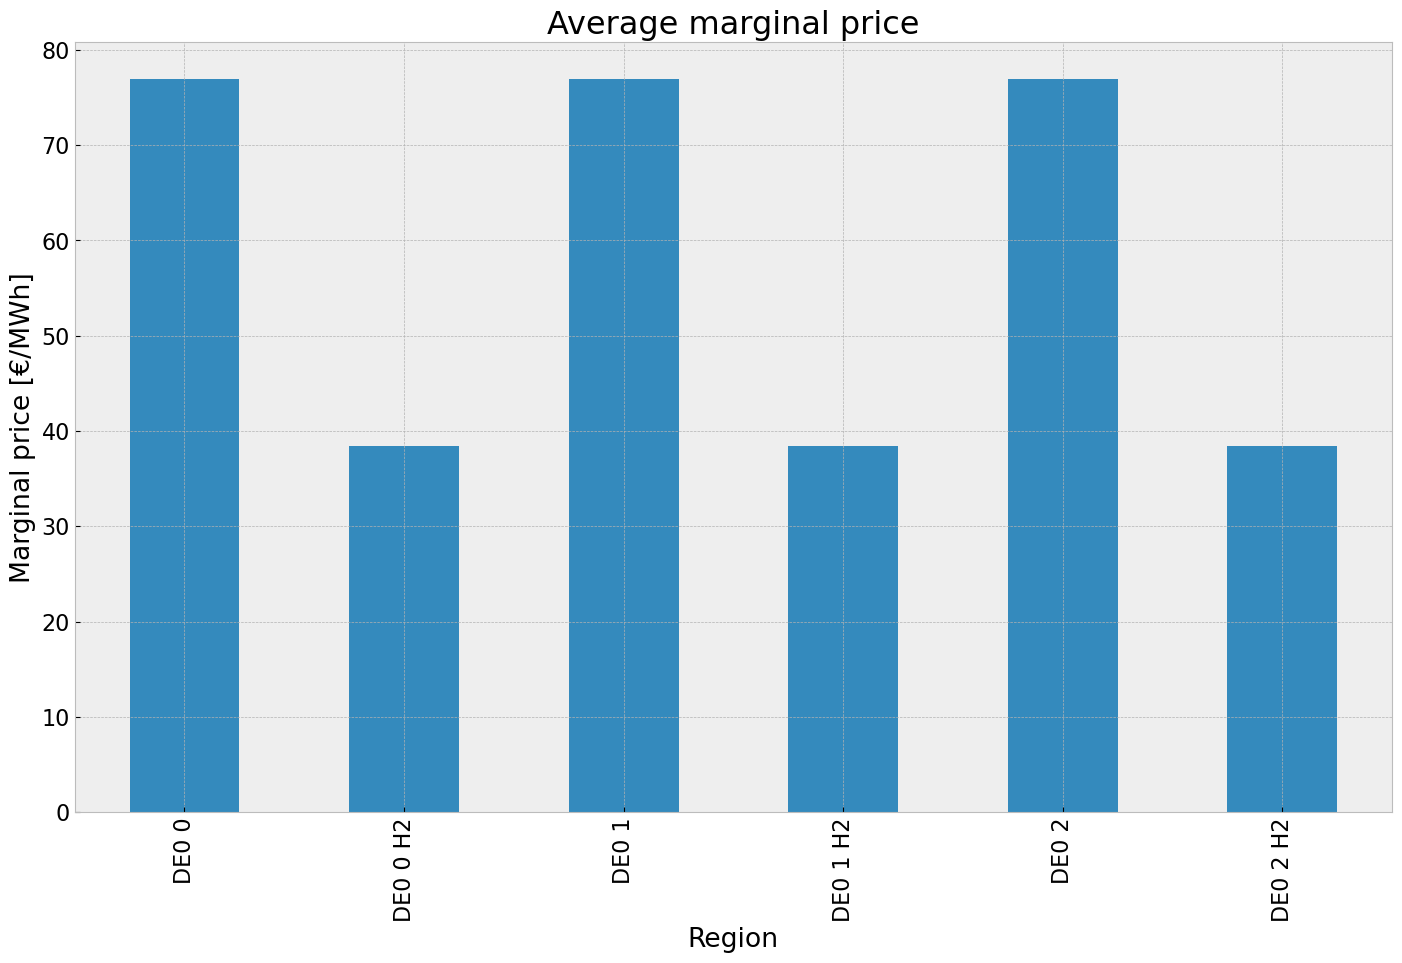

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


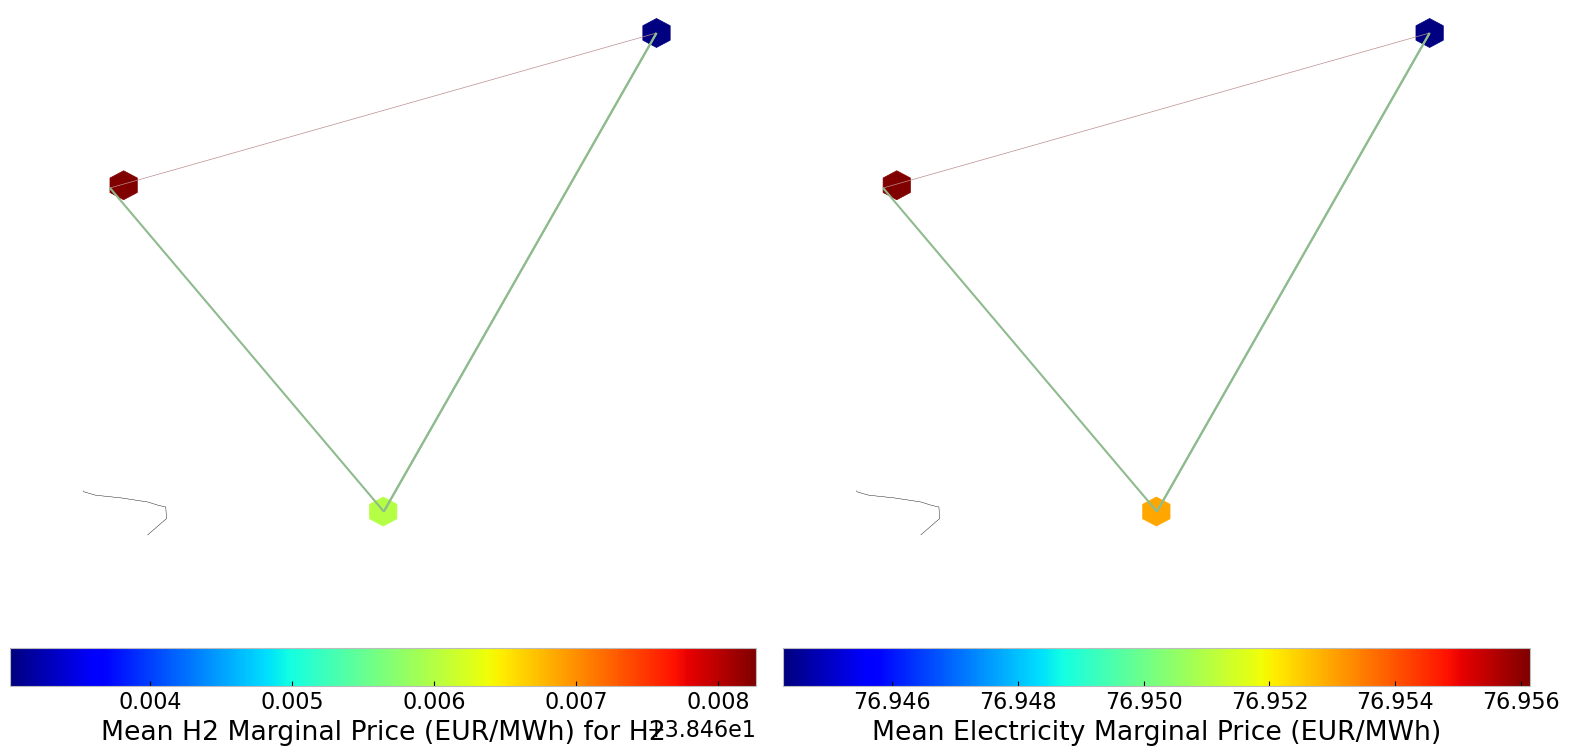

In [799]:
#storage unit & stores
inst_store_table(n2)
inst_storeh2_table(n2)
state_of_charge_plot(n2)
n2.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3).loc[pd.date_range(start="2013-01-01", end="2013-12-31",freq='3H')].plot(figsize=(20,10))
#price
price_dur_curve_plot(n2)
price_regions_table(n2)
price_regions(n2)
#emission
em_noinv =em_table(n2)
em_noinv

## 3. Scenario: rolling horizon foresight with no additional investment

In [800]:
n3= n2.copy()
horizon = 24
n3.global_constraints.loc['CO2Limit','constant']= n.global_constraints.loc['CO2Limit','constant']/(len(n3.snapshots)/horizon)
n3.optimize.create_model()
optimize.optimize_with_rolling_horizon(n3, horizon=horizon, overlap=0, solver_name='gurobi')

INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2013-01-01 00:00:00:2013-01-03 21:00:00] (1/122).
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7xt96khw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7xt96khw.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x40fbabfa


INFO:gurobipy:Model fingerprint: 0x40fbabfa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 839 columns


INFO:gurobipy:Presolve removed 3732 rows and 839 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1162 columns, 2548 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1162 columns, 2548 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     305    1.6727440e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     305    1.6727440e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 305 iterations and 0.05 seconds (0.00 work units)


INFO:gurobipy:Solved in 305 iterations and 0.05 seconds (0.00 work units)


Optimal objective  1.672743953e+07


INFO:gurobipy:Optimal objective  1.672743953e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.67e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7wrl4423.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7wrl4423.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x991254fe


INFO:gurobipy:Model fingerprint: 0x991254fe


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 839 columns


INFO:gurobipy:Presolve removed 3732 rows and 839 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1162 columns, 2548 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1162 columns, 2548 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     315    3.3862650e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     315    3.3862650e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 315 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 315 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.386264984e+07


INFO:gurobipy:Optimal objective  3.386264984e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.39e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vy4w4llt.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vy4w4llt.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x0ee6a566


INFO:gurobipy:Model fingerprint: 0x0ee6a566


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 842 columns


INFO:gurobipy:Presolve removed 3732 rows and 842 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1159 columns, 2545 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1159 columns, 2545 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     360    1.4081281e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     360    1.4081281e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 360 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 360 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.408128116e+09


INFO:gurobipy:Optimal objective  1.408128116e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.41e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-iqle6q7f.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-iqle6q7f.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x74fb5770


INFO:gurobipy:Model fingerprint: 0x74fb5770


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 845 columns


INFO:gurobipy:Presolve removed 3732 rows and 845 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1156 columns, 2542 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1156 columns, 2542 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     373    2.8392024e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     373    2.8392024e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 373 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 373 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.839202386e+08


INFO:gurobipy:Optimal objective  2.839202386e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.84e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8v2pzdem.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8v2pzdem.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x93c3fa1a


INFO:gurobipy:Model fingerprint: 0x93c3fa1a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 841 columns


INFO:gurobipy:Presolve removed 3732 rows and 841 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1160 columns, 2546 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1160 columns, 2546 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     350    1.3914725e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     350    1.3914725e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 350 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 350 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.391472538e+09


INFO:gurobipy:Optimal objective  1.391472538e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.39e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dz1hwsaq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dz1hwsaq.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x8e4dff7b


INFO:gurobipy:Model fingerprint: 0x8e4dff7b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 837 columns


INFO:gurobipy:Presolve removed 3732 rows and 837 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     356    2.4582306e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     356    2.4582306e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 356 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 356 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.458230594e+09


INFO:gurobipy:Optimal objective  2.458230594e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.46e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fvmk5_iy.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fvmk5_iy.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd8f1b46c


INFO:gurobipy:Model fingerprint: 0xd8f1b46c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 843 columns


INFO:gurobipy:Presolve removed 3732 rows and 843 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1158 columns, 2544 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1158 columns, 2544 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     346    8.0350396e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     346    8.0350396e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 346 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 346 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.035039566e+07


INFO:gurobipy:Optimal objective  8.035039566e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.04e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lsqywgm_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lsqywgm_.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe88fc7a9


INFO:gurobipy:Model fingerprint: 0xe88fc7a9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 848 columns


INFO:gurobipy:Presolve removed 3732 rows and 848 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1153 columns, 2539 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1153 columns, 2539 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     353    3.2275395e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     353    3.2275395e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 353 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 353 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.227539516e+09


INFO:gurobipy:Optimal objective  3.227539516e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.23e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o3ohol3w.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o3ohol3w.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x18372281


INFO:gurobipy:Model fingerprint: 0x18372281


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 840 columns


INFO:gurobipy:Presolve removed 3732 rows and 840 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1161 columns, 2547 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1161 columns, 2547 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     330    8.9324542e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     330    8.9324542e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 330 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 330 iterations and 0.06 seconds (0.01 work units)


Optimal objective  8.932454155e+07


INFO:gurobipy:Optimal objective  8.932454155e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.93e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-e26wpjea.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-e26wpjea.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x2e61f5b1


INFO:gurobipy:Model fingerprint: 0x2e61f5b1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 834 columns


INFO:gurobipy:Presolve removed 3732 rows and 834 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1167 columns, 2553 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1167 columns, 2553 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     326    2.8602707e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     326    2.8602707e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 326 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 326 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.860270740e+07


INFO:gurobipy:Optimal objective  2.860270740e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.86e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1wtvdxec.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1wtvdxec.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb5dc18bc


INFO:gurobipy:Model fingerprint: 0xb5dc18bc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 833 columns


INFO:gurobipy:Presolve removed 3732 rows and 833 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     309    3.4921743e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     309    3.4921743e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 309 iterations and 0.05 seconds (0.00 work units)


INFO:gurobipy:Solved in 309 iterations and 0.05 seconds (0.00 work units)


Optimal objective  3.492174269e+07


INFO:gurobipy:Optimal objective  3.492174269e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.49e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-23ac1mzv.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-23ac1mzv.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x245834c3


INFO:gurobipy:Model fingerprint: 0x245834c3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 831 columns


INFO:gurobipy:Presolve removed 3732 rows and 831 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     253    2.4483533e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     253    2.4483533e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 253 iterations and 0.04 seconds (0.00 work units)


INFO:gurobipy:Solved in 253 iterations and 0.04 seconds (0.00 work units)


Optimal objective  2.448353331e+07


INFO:gurobipy:Optimal objective  2.448353331e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.45e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-g__92f1g.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-g__92f1g.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc67f4103


INFO:gurobipy:Model fingerprint: 0xc67f4103


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 830 columns


INFO:gurobipy:Presolve removed 3732 rows and 830 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     325    1.2461517e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     325    1.2461517e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 325 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 325 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.246151658e+09


INFO:gurobipy:Optimal objective  1.246151658e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.25e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-l00gtjbe.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-l00gtjbe.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x211fbbb7


INFO:gurobipy:Model fingerprint: 0x211fbbb7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 842 columns


INFO:gurobipy:Presolve removed 3732 rows and 842 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1159 columns, 2545 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1159 columns, 2545 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     307    6.5279793e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     307    6.5279793e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 307 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 307 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.527979338e+07


INFO:gurobipy:Optimal objective  6.527979338e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.53e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jbi2d9j3.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jbi2d9j3.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa2f62c40


INFO:gurobipy:Model fingerprint: 0xa2f62c40


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 833 columns


INFO:gurobipy:Presolve removed 3732 rows and 833 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     363    1.2973887e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     363    1.2973887e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 363 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 363 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.297388681e+09


INFO:gurobipy:Optimal objective  1.297388681e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.30e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_n6o7lih.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_n6o7lih.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x23db141d


INFO:gurobipy:Model fingerprint: 0x23db141d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 858 columns


INFO:gurobipy:Presolve removed 3732 rows and 858 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1143 columns, 2529 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1143 columns, 2529 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     395    8.5840623e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     395    8.5840623e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 395 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 395 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.584062349e+08


INFO:gurobipy:Optimal objective  8.584062349e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.58e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-adnsydj7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-adnsydj7.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xfa9862d8


INFO:gurobipy:Model fingerprint: 0xfa9862d8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [9e+01, 1e+09]


INFO:gurobipy:  RHS range        [9e+01, 1e+09]


Presolve removed 3732 rows and 838 columns


INFO:gurobipy:Presolve removed 3732 rows and 838 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1163 columns, 2549 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1163 columns, 2549 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     342    3.5341395e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     342    3.5341395e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 342 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 342 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.534139527e+08


INFO:gurobipy:Optimal objective  3.534139527e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.53e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4_oe_037.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4_oe_037.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x109276ef


INFO:gurobipy:Model fingerprint: 0x109276ef


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     297    8.6840622e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     297    8.6840622e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 297 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 297 iterations and 0.04 seconds (0.01 work units)


Optimal objective  8.684062231e+07


INFO:gurobipy:Optimal objective  8.684062231e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.68e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ttsddss0.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ttsddss0.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xfa6e6de9


INFO:gurobipy:Model fingerprint: 0xfa6e6de9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 831 columns


INFO:gurobipy:Presolve removed 3732 rows and 831 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     347    1.1043965e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     347    1.1043965e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 347 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 347 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.104396488e+08


INFO:gurobipy:Optimal objective  1.104396488e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.10e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-st3nzsjp.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-st3nzsjp.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x7cbf72db


INFO:gurobipy:Model fingerprint: 0x7cbf72db


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3732 rows and 840 columns


INFO:gurobipy:Presolve removed 3732 rows and 840 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1161 columns, 2547 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1161 columns, 2547 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     376    1.9539547e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     376    1.9539547e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 376 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 376 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.953954714e+09


INFO:gurobipy:Optimal objective  1.953954714e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.95e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kmy66kbb.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kmy66kbb.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x9d1434ea


INFO:gurobipy:Model fingerprint: 0x9d1434ea


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 837 columns


INFO:gurobipy:Presolve removed 3732 rows and 837 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     355    4.5701159e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     355    4.5701159e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 355 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 355 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.570115943e+07


INFO:gurobipy:Optimal objective  4.570115943e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.57e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jvxyoir6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jvxyoir6.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xdcb6a20e


INFO:gurobipy:Model fingerprint: 0xdcb6a20e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 834 columns


INFO:gurobipy:Presolve removed 3732 rows and 834 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 482 rows, 1167 columns, 2553 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1167 columns, 2553 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     306    7.2085432e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     306    7.2085432e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 306 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 306 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.208543210e+07


INFO:gurobipy:Optimal objective  7.208543210e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.21e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8qj1ndrh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8qj1ndrh.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x78a6b30e


INFO:gurobipy:Model fingerprint: 0x78a6b30e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     325    2.2699792e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     325    2.2699792e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 325 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 325 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.269979159e+07


INFO:gurobipy:Optimal objective  2.269979159e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.27e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vyung6q4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vyung6q4.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x5c3e1edb


INFO:gurobipy:Model fingerprint: 0x5c3e1edb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3732 rows and 829 columns


INFO:gurobipy:Presolve removed 3732 rows and 829 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1172 columns, 2558 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1172 columns, 2558 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     314    1.0117079e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     314    1.0117079e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 314 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 314 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.011707921e+09


INFO:gurobipy:Optimal objective  1.011707921e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.01e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-919t6087.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-919t6087.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x4832fb8f


INFO:gurobipy:Model fingerprint: 0x4832fb8f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     354    7.3944858e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     354    7.3944858e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 354 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 354 iterations and 0.04 seconds (0.01 work units)


Optimal objective  7.394485759e+07


INFO:gurobipy:Optimal objective  7.394485759e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.39e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-511j5shk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-511j5shk.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf557a86d


INFO:gurobipy:Model fingerprint: 0xf557a86d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 831 columns


INFO:gurobipy:Presolve removed 3732 rows and 831 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     313    4.2952382e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     313    4.2952382e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 313 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 313 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.295238232e+07


INFO:gurobipy:Optimal objective  4.295238232e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.30e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-89els1de.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-89els1de.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xaed0166a


INFO:gurobipy:Model fingerprint: 0xaed0166a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     322    9.8814330e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     322    9.8814330e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 322 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 322 iterations and 0.04 seconds (0.01 work units)


Optimal objective  9.881433035e+07


INFO:gurobipy:Optimal objective  9.881433035e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 9.88e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qznjds9f.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qznjds9f.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc727f26a


INFO:gurobipy:Model fingerprint: 0xc727f26a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     291    1.2033829e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     291    1.2033829e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 291 iterations and 0.05 seconds (0.00 work units)


INFO:gurobipy:Solved in 291 iterations and 0.05 seconds (0.00 work units)


Optimal objective  1.203382889e+07


INFO:gurobipy:Optimal objective  1.203382889e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.20e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-87c4n37f.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-87c4n37f.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x0bcfa59f


INFO:gurobipy:Model fingerprint: 0x0bcfa59f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     305    6.4137887e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     305    6.4137887e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 305 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 305 iterations and 0.04 seconds (0.01 work units)


Optimal objective  6.413788687e+07


INFO:gurobipy:Optimal objective  6.413788687e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.41e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-scjngn0u.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-scjngn0u.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb63b4232


INFO:gurobipy:Model fingerprint: 0xb63b4232


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 832 columns


INFO:gurobipy:Presolve removed 3732 rows and 832 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     305    5.4740870e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     305    5.4740870e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 305 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 305 iterations and 0.04 seconds (0.01 work units)


Optimal objective  5.474087000e+07


INFO:gurobipy:Optimal objective  5.474087000e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.47e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d4c1y0bm.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d4c1y0bm.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe2b7e080


INFO:gurobipy:Model fingerprint: 0xe2b7e080


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     345    5.7891604e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     345    5.7891604e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 345 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 345 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.789160398e+07


INFO:gurobipy:Optimal objective  5.789160398e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.79e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2cdb8e2o.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2cdb8e2o.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6aa57590


INFO:gurobipy:Model fingerprint: 0x6aa57590


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3732 rows and 829 columns


INFO:gurobipy:Presolve removed 3732 rows and 829 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1172 columns, 2558 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1172 columns, 2558 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     343    1.1327896e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     343    1.1327896e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 343 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 343 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.132789561e+08


INFO:gurobipy:Optimal objective  1.132789561e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.13e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7dha_brg.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7dha_brg.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x3beb1aa4


INFO:gurobipy:Model fingerprint: 0x3beb1aa4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 829 columns


INFO:gurobipy:Presolve removed 3732 rows and 829 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1172 columns, 2558 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1172 columns, 2558 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     322    6.0160396e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     322    6.0160396e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 322 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 322 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.016039647e+07


INFO:gurobipy:Optimal objective  6.016039647e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.02e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-41hg94rd.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-41hg94rd.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xbcf8413b


INFO:gurobipy:Model fingerprint: 0xbcf8413b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     322    8.7735302e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     322    8.7735302e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 322 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 322 iterations and 0.04 seconds (0.01 work units)


Optimal objective  8.773530249e+07


INFO:gurobipy:Optimal objective  8.773530249e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.77e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wpr0vspk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wpr0vspk.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf8467f95


INFO:gurobipy:Model fingerprint: 0xf8467f95


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 832 columns


INFO:gurobipy:Presolve removed 3732 rows and 832 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     289    2.3316181e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     289    2.3316181e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 289 iterations and 0.04 seconds (0.00 work units)


INFO:gurobipy:Solved in 289 iterations and 0.04 seconds (0.00 work units)


Optimal objective  2.331618107e+07


INFO:gurobipy:Optimal objective  2.331618107e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.33e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dmz0_z2e.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dmz0_z2e.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x43cb0d86


INFO:gurobipy:Model fingerprint: 0x43cb0d86


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 833 columns


INFO:gurobipy:Presolve removed 3732 rows and 833 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     296    3.8552405e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     296    3.8552405e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 296 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 296 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.855240464e+07


INFO:gurobipy:Optimal objective  3.855240464e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.86e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2ijsje17.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2ijsje17.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa95ba888


INFO:gurobipy:Model fingerprint: 0xa95ba888


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 832 columns


INFO:gurobipy:Presolve removed 3732 rows and 832 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     355    3.9353921e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     355    3.9353921e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 355 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 355 iterations and 0.03 seconds (0.01 work units)


Optimal objective  3.935392141e+07


INFO:gurobipy:Optimal objective  3.935392141e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.94e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6czo8m7z.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6czo8m7z.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc21e44a5


INFO:gurobipy:Model fingerprint: 0xc21e44a5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 834 columns


INFO:gurobipy:Presolve removed 3732 rows and 834 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1167 columns, 2553 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1167 columns, 2553 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     365    5.1726860e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     365    5.1726860e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 365 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 365 iterations and 0.04 seconds (0.01 work units)


Optimal objective  5.172686032e+07


INFO:gurobipy:Optimal objective  5.172686032e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.17e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-x59cg4ni.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-x59cg4ni.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xbe04b008


INFO:gurobipy:Model fingerprint: 0xbe04b008


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 837 columns


INFO:gurobipy:Presolve removed 3732 rows and 837 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     291    5.5278459e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     291    5.5278459e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 291 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 291 iterations and 0.03 seconds (0.01 work units)


Optimal objective  5.527845897e+07


INFO:gurobipy:Optimal objective  5.527845897e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.53e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0saiduzv.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0saiduzv.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x02d85316


INFO:gurobipy:Model fingerprint: 0x02d85316


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3732 rows and 833 columns


INFO:gurobipy:Presolve removed 3732 rows and 833 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     291    6.5251465e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     291    6.5251465e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 291 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 291 iterations and 0.04 seconds (0.01 work units)


Optimal objective  6.525146491e+07


INFO:gurobipy:Optimal objective  6.525146491e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.53e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2flyh_zf.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2flyh_zf.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x29823c65


INFO:gurobipy:Model fingerprint: 0x29823c65


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 825 columns


INFO:gurobipy:Presolve removed 3732 rows and 825 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1176 columns, 2562 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1176 columns, 2562 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     287    6.8119806e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     287    6.8119806e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 287 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 287 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.811980604e+07


INFO:gurobipy:Optimal objective  6.811980604e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.81e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-pyvu6y13.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-pyvu6y13.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa4f8bf5d


INFO:gurobipy:Model fingerprint: 0xa4f8bf5d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 827 columns


INFO:gurobipy:Presolve removed 3732 rows and 827 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1174 columns, 2560 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1174 columns, 2560 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     326    3.6232164e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     326    3.6232164e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 326 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 326 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.623216437e+07


INFO:gurobipy:Optimal objective  3.623216437e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.62e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-emgxtskp.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-emgxtskp.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x5540de9c


INFO:gurobipy:Model fingerprint: 0x5540de9c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 830 columns


INFO:gurobipy:Presolve removed 3732 rows and 830 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     297    5.6936555e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     297    5.6936555e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 297 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 297 iterations and 0.03 seconds (0.01 work units)


Optimal objective  5.693655471e+07


INFO:gurobipy:Optimal objective  5.693655471e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.69e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-so33hceu.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-so33hceu.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb2d6aa70


INFO:gurobipy:Model fingerprint: 0xb2d6aa70


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 823 columns


INFO:gurobipy:Presolve removed 3732 rows and 823 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1178 columns, 2564 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1178 columns, 2564 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     338    3.1337848e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     338    3.1337848e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 338 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 338 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.133784799e+07


INFO:gurobipy:Optimal objective  3.133784799e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.13e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-s67q_dmf.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-s67q_dmf.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x7709afe6


INFO:gurobipy:Model fingerprint: 0x7709afe6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 821 columns


INFO:gurobipy:Presolve removed 3732 rows and 821 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1180 columns, 2566 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1180 columns, 2566 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     390    4.3397787e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     390    4.3397787e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 390 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 390 iterations and 0.03 seconds (0.01 work units)


Optimal objective  4.339778666e+07


INFO:gurobipy:Optimal objective  4.339778666e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.34e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rtuxbcc_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rtuxbcc_.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe05a8eed


INFO:gurobipy:Model fingerprint: 0xe05a8eed


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 821 columns


INFO:gurobipy:Presolve removed 3732 rows and 821 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1180 columns, 2566 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1180 columns, 2566 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     331    5.4531607e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     331    5.4531607e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 331 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 331 iterations and 0.04 seconds (0.01 work units)


Optimal objective  5.453160698e+07


INFO:gurobipy:Optimal objective  5.453160698e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.45e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4bls0wbi.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4bls0wbi.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xcdb29d04


INFO:gurobipy:Model fingerprint: 0xcdb29d04


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 820 columns


INFO:gurobipy:Presolve removed 3732 rows and 820 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1181 columns, 2567 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1181 columns, 2567 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     340    3.2305931e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     340    3.2305931e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 340 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 340 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.230593093e+07


INFO:gurobipy:Optimal objective  3.230593093e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.23e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5ab8dijw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5ab8dijw.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x8420ba6f


INFO:gurobipy:Model fingerprint: 0x8420ba6f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     306    7.5964098e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     306    7.5964098e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 306 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 306 iterations and 0.04 seconds (0.01 work units)


Optimal objective  7.596409799e+07


INFO:gurobipy:Optimal objective  7.596409799e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.60e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6swfojbl.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6swfojbl.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x8dfa41ff


INFO:gurobipy:Model fingerprint: 0x8dfa41ff


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 826 columns


INFO:gurobipy:Presolve removed 3732 rows and 826 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1175 columns, 2561 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1175 columns, 2561 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     334    3.4932462e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     334    3.4932462e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 334 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 334 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.493246199e+07


INFO:gurobipy:Optimal objective  3.493246199e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.49e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-j876py2z.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-j876py2z.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf4cef5ec


INFO:gurobipy:Model fingerprint: 0xf4cef5ec


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 832 columns


INFO:gurobipy:Presolve removed 3732 rows and 832 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     321    6.6658422e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     321    6.6658422e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 321 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 321 iterations and 0.04 seconds (0.01 work units)


Optimal objective  6.665842171e+07


INFO:gurobipy:Optimal objective  6.665842171e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.67e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-tqktujem.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-tqktujem.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc8ece063


INFO:gurobipy:Model fingerprint: 0xc8ece063


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 7e+02]


INFO:gurobipy:  Bounds range     [3e+02, 7e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 821 columns


INFO:gurobipy:Presolve removed 3732 rows and 821 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1180 columns, 2566 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1180 columns, 2566 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     280    1.3312528e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     280    1.3312528e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 280 iterations and 0.04 seconds (0.00 work units)


INFO:gurobipy:Solved in 280 iterations and 0.04 seconds (0.00 work units)


Optimal objective  1.331252776e+07


INFO:gurobipy:Optimal objective  1.331252776e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.33e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fe_rnhqd.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fe_rnhqd.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x8ec1c78e


INFO:gurobipy:Model fingerprint: 0x8ec1c78e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+02, 9e+02]


INFO:gurobipy:  Bounds range     [7e+02, 9e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 818 columns


INFO:gurobipy:Presolve removed 3732 rows and 818 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1183 columns, 2569 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1183 columns, 2569 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     326    3.4507313e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     326    3.4507313e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 326 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 326 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.450731318e+07


INFO:gurobipy:Optimal objective  3.450731318e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.45e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ap08hvvx.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ap08hvvx.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb9b52172


INFO:gurobipy:Model fingerprint: 0xb9b52172


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+02, 9e+02]


INFO:gurobipy:  Bounds range     [7e+02, 9e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 831 columns


INFO:gurobipy:Presolve removed 3732 rows and 831 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     318    3.4617459e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     318    3.4617459e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 318 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 318 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.461745881e+07


INFO:gurobipy:Optimal objective  3.461745881e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.46e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lfpfkvrq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lfpfkvrq.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe2a246b5


INFO:gurobipy:Model fingerprint: 0xe2a246b5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+02, 7e+02]


INFO:gurobipy:  Bounds range     [6e+02, 7e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 830 columns


INFO:gurobipy:Presolve removed 3732 rows and 830 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     304    6.5960671e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     304    6.5960671e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 304 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 304 iterations and 0.04 seconds (0.01 work units)


Optimal objective  6.596067119e+07


INFO:gurobipy:Optimal objective  6.596067119e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.60e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2q0c4x7r.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2q0c4x7r.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa9987f5c


INFO:gurobipy:Model fingerprint: 0xa9987f5c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+02, 6e+02]


INFO:gurobipy:  Bounds range     [6e+02, 6e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 824 columns


INFO:gurobipy:Presolve removed 3732 rows and 824 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1177 columns, 2563 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1177 columns, 2563 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     295    3.2709476e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     295    3.2709476e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 295 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 295 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.270947629e+07


INFO:gurobipy:Optimal objective  3.270947629e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.27e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6pn9p1g_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6pn9p1g_.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x794f61a9


INFO:gurobipy:Model fingerprint: 0x794f61a9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+02, 6e+02]


INFO:gurobipy:  Bounds range     [5e+02, 6e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 821 columns


INFO:gurobipy:Presolve removed 3732 rows and 821 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1180 columns, 2566 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1180 columns, 2566 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     281    2.2556840e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     281    2.2556840e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 281 iterations and 0.04 seconds (0.00 work units)


INFO:gurobipy:Solved in 281 iterations and 0.04 seconds (0.00 work units)


Optimal objective  2.255683988e+07


INFO:gurobipy:Optimal objective  2.255683988e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.26e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wyqvbehm.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wyqvbehm.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x1b46df20


INFO:gurobipy:Model fingerprint: 0x1b46df20


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 822 columns


INFO:gurobipy:Presolve removed 3732 rows and 822 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1179 columns, 2565 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1179 columns, 2565 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     328    4.8161311e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     328    4.8161311e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 328 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 328 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.816131081e+07


INFO:gurobipy:Optimal objective  4.816131081e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.82e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_qtip9gi.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_qtip9gi.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x0c0757a9


INFO:gurobipy:Model fingerprint: 0x0c0757a9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 817 columns


INFO:gurobipy:Presolve removed 3732 rows and 817 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1184 columns, 2570 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1184 columns, 2570 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     282    1.5270928e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     282    1.5270928e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 282 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 282 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.527092769e+07


INFO:gurobipy:Optimal objective  1.527092769e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.53e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-14onp94x.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-14onp94x.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd996a7c2


INFO:gurobipy:Model fingerprint: 0xd996a7c2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 819 columns


INFO:gurobipy:Presolve removed 3732 rows and 819 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1182 columns, 2568 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1182 columns, 2568 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     341    4.2253524e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     341    4.2253524e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 341 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 341 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.225352419e+07


INFO:gurobipy:Optimal objective  4.225352419e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.23e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zcqxllcq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zcqxllcq.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xaa2cc8c0


INFO:gurobipy:Model fingerprint: 0xaa2cc8c0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 824 columns


INFO:gurobipy:Presolve removed 3732 rows and 824 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1177 columns, 2563 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1177 columns, 2563 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     328    4.0647627e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     328    4.0647627e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 328 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 328 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.064762662e+07


INFO:gurobipy:Optimal objective  4.064762662e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.06e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-g549h871.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-g549h871.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x0a7edcbf


INFO:gurobipy:Model fingerprint: 0x0a7edcbf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 826 columns


INFO:gurobipy:Presolve removed 3732 rows and 826 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1175 columns, 2561 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1175 columns, 2561 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     265    3.0512439e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     265    3.0512439e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 265 iterations and 0.04 seconds (0.00 work units)


INFO:gurobipy:Solved in 265 iterations and 0.04 seconds (0.00 work units)


Optimal objective  3.051243920e+07


INFO:gurobipy:Optimal objective  3.051243920e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.05e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-iywmpkvh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-iywmpkvh.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x1150cb86


INFO:gurobipy:Model fingerprint: 0x1150cb86


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3732 rows and 825 columns


INFO:gurobipy:Presolve removed 3732 rows and 825 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1176 columns, 2562 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1176 columns, 2562 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     279    8.5161708e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     279    8.5161708e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 279 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 279 iterations and 0.04 seconds (0.01 work units)


Optimal objective  8.516170753e+07


INFO:gurobipy:Optimal objective  8.516170753e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.52e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-826y3jp2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-826y3jp2.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x585faf0c


INFO:gurobipy:Model fingerprint: 0x585faf0c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 822 columns


INFO:gurobipy:Presolve removed 3732 rows and 822 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1179 columns, 2565 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1179 columns, 2565 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     276    2.5513592e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     276    2.5513592e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 276 iterations and 0.03 seconds (0.00 work units)


INFO:gurobipy:Solved in 276 iterations and 0.03 seconds (0.00 work units)


Optimal objective  2.551359167e+07


INFO:gurobipy:Optimal objective  2.551359167e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.55e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bps84d2a.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bps84d2a.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd1d428b9


INFO:gurobipy:Model fingerprint: 0xd1d428b9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3732 rows and 819 columns


INFO:gurobipy:Presolve removed 3732 rows and 819 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1182 columns, 2568 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1182 columns, 2568 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     375    3.8220936e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     375    3.8220936e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 375 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 375 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.822093620e+07


INFO:gurobipy:Optimal objective  3.822093620e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.82e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-strkm_xc.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-strkm_xc.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xec70d894


INFO:gurobipy:Model fingerprint: 0xec70d894


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 830 columns


INFO:gurobipy:Presolve removed 3732 rows and 830 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     306    2.5930323e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     306    2.5930323e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 306 iterations and 0.04 seconds (0.00 work units)


INFO:gurobipy:Solved in 306 iterations and 0.04 seconds (0.00 work units)


Optimal objective  2.593032343e+07


INFO:gurobipy:Optimal objective  2.593032343e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.59e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ktk98xug.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ktk98xug.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe7feede0


INFO:gurobipy:Model fingerprint: 0xe7feede0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 836 columns


INFO:gurobipy:Presolve removed 3732 rows and 836 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1165 columns, 2551 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1165 columns, 2551 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     349    4.5802070e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     349    4.5802070e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 349 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 349 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.580206982e+07


INFO:gurobipy:Optimal objective  4.580206982e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.58e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gmizyal2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gmizyal2.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x34bf2f87


INFO:gurobipy:Model fingerprint: 0x34bf2f87


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [9e+01, 1e+09]


INFO:gurobipy:  RHS range        [9e+01, 1e+09]


Presolve removed 3732 rows and 820 columns


INFO:gurobipy:Presolve removed 3732 rows and 820 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1181 columns, 2567 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1181 columns, 2567 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     327    2.9755397e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     327    2.9755397e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 327 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 327 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.975539709e+07


INFO:gurobipy:Optimal objective  2.975539709e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.98e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d8viyj1x.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d8viyj1x.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x88c562e2


INFO:gurobipy:Model fingerprint: 0x88c562e2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 845 columns


INFO:gurobipy:Presolve removed 3732 rows and 845 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1156 columns, 2542 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1156 columns, 2542 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     303    3.7940153e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     303    3.7940153e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 303 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 303 iterations and 0.03 seconds (0.01 work units)


Optimal objective  3.794015282e+07


INFO:gurobipy:Optimal objective  3.794015282e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.79e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ov4huugw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ov4huugw.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x374f48de


INFO:gurobipy:Model fingerprint: 0x374f48de


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 847 columns


INFO:gurobipy:Presolve removed 3732 rows and 847 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1154 columns, 2540 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1154 columns, 2540 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     298    8.4267955e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     298    8.4267955e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 298 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 298 iterations and 0.04 seconds (0.01 work units)


Optimal objective  8.426795524e+07


INFO:gurobipy:Optimal objective  8.426795524e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.43e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sc5gh60v.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sc5gh60v.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x3ba273bb


INFO:gurobipy:Model fingerprint: 0x3ba273bb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 832 columns


INFO:gurobipy:Presolve removed 3732 rows and 832 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     346    4.3553673e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     346    4.3553673e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 346 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 346 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.355367281e+07


INFO:gurobipy:Optimal objective  4.355367281e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.36e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-b84g5r9o.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-b84g5r9o.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc69b7342


INFO:gurobipy:Model fingerprint: 0xc69b7342


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     339    3.7903257e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     339    3.7903257e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 339 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 339 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.790325666e+07


INFO:gurobipy:Optimal objective  3.790325666e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.79e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xo5pcj0_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xo5pcj0_.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa9ca66f5


INFO:gurobipy:Model fingerprint: 0xa9ca66f5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 836 columns


INFO:gurobipy:Presolve removed 3732 rows and 836 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1165 columns, 2551 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1165 columns, 2551 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     316    3.0176691e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     316    3.0176691e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 316 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 316 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.017669087e+07


INFO:gurobipy:Optimal objective  3.017669087e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.02e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1zlxhxip.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1zlxhxip.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa66c8896


INFO:gurobipy:Model fingerprint: 0xa66c8896


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 832 columns


INFO:gurobipy:Presolve removed 3732 rows and 832 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     351    5.6479342e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     351    5.6479342e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 351 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 351 iterations and 0.06 seconds (0.01 work units)


Optimal objective  5.647934243e+07


INFO:gurobipy:Optimal objective  5.647934243e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.65e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zez3rj9s.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zez3rj9s.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xac673506


INFO:gurobipy:Model fingerprint: 0xac673506


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 834 columns


INFO:gurobipy:Presolve removed 3732 rows and 834 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1167 columns, 2553 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1167 columns, 2553 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     331    7.0002788e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     331    7.0002788e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 331 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 331 iterations and 0.04 seconds (0.01 work units)


Optimal objective  7.000278820e+07


INFO:gurobipy:Optimal objective  7.000278820e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.00e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4_mfx7og.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4_mfx7og.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa1682761


INFO:gurobipy:Model fingerprint: 0xa1682761


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     330    3.0468951e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     330    3.0468951e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 330 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 330 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.046895052e+07


INFO:gurobipy:Optimal objective  3.046895052e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.05e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-iki39_rs.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-iki39_rs.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x35c7d5f2


INFO:gurobipy:Model fingerprint: 0x35c7d5f2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 841 columns


INFO:gurobipy:Presolve removed 3732 rows and 841 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1160 columns, 2546 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1160 columns, 2546 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     347    4.0776573e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     347    4.0776573e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 347 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 347 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.077657301e+07


INFO:gurobipy:Optimal objective  4.077657301e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.08e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ml8t51lc.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ml8t51lc.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x867fecce


INFO:gurobipy:Model fingerprint: 0x867fecce


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 830 columns


INFO:gurobipy:Presolve removed 3732 rows and 830 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     347    4.5295374e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     347    4.5295374e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 347 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 347 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.529537428e+07


INFO:gurobipy:Optimal objective  4.529537428e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.53e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9gzk5z79.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9gzk5z79.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x9a4bb1e5


INFO:gurobipy:Model fingerprint: 0x9a4bb1e5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 842 columns


INFO:gurobipy:Presolve removed 3732 rows and 842 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1159 columns, 2545 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1159 columns, 2545 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     311    7.2824153e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     311    7.2824153e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 311 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 311 iterations and 0.04 seconds (0.01 work units)


Optimal objective  7.282415265e+07


INFO:gurobipy:Optimal objective  7.282415265e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.28e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zdmdy407.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zdmdy407.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x1afd84d2


INFO:gurobipy:Model fingerprint: 0x1afd84d2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     314    2.9035800e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     314    2.9035800e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 314 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 314 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.903580003e+07


INFO:gurobipy:Optimal objective  2.903580003e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.90e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zggr6xpu.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zggr6xpu.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x1fdb4880


INFO:gurobipy:Model fingerprint: 0x1fdb4880


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 832 columns


INFO:gurobipy:Presolve removed 3732 rows and 832 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     315    9.2810870e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     315    9.2810870e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 315 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 315 iterations and 0.04 seconds (0.01 work units)


Optimal objective  9.281087014e+07


INFO:gurobipy:Optimal objective  9.281087014e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 9.28e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-oua5lgo5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-oua5lgo5.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x762ef0f1


INFO:gurobipy:Model fingerprint: 0x762ef0f1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 847 columns


INFO:gurobipy:Presolve removed 3732 rows and 847 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1154 columns, 2540 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1154 columns, 2540 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     403    5.1507826e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     403    5.1507826e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 403 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 403 iterations and 0.04 seconds (0.01 work units)


Optimal objective  5.150782593e+07


INFO:gurobipy:Optimal objective  5.150782593e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.15e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-iw0lawqo.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-iw0lawqo.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xba82c6fc


INFO:gurobipy:Model fingerprint: 0xba82c6fc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     327    2.9768910e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     327    2.9768910e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 327 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 327 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.976891009e+07


INFO:gurobipy:Optimal objective  2.976891009e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.98e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-k188i4g9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-k188i4g9.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc2e3c90b


INFO:gurobipy:Model fingerprint: 0xc2e3c90b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 841 columns


INFO:gurobipy:Presolve removed 3732 rows and 841 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1160 columns, 2546 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1160 columns, 2546 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     347    5.2730136e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     347    5.2730136e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 347 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 347 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.273013551e+07


INFO:gurobipy:Optimal objective  5.273013551e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.27e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ucukfu45.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ucukfu45.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 1993 columns, 7495 nonzeros


INFO:gurobipy:obj: 4214 rows, 1993 columns, 7495 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 1993 columns and 7495 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 1993 columns and 7495 nonzeros


Model fingerprint: 0x1aaef7f4


INFO:gurobipy:Model fingerprint: 0x1aaef7f4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+01, 1e+02]


INFO:gurobipy:  Bounds range     [3e+01, 1e+02]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 3738 rows and 866 columns


INFO:gurobipy:Presolve removed 3738 rows and 866 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 476 rows, 1127 columns, 2507 nonzeros


INFO:gurobipy:Presolved: 476 rows, 1127 columns, 2507 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     373    4.9844644e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     373    4.9844644e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 373 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 373 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.984464383e+07


INFO:gurobipy:Optimal objective  4.984464383e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1993 primals, 4214 duals
Objective: 4.98e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7njk7vft.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7njk7vft.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x78dcfa6f


INFO:gurobipy:Model fingerprint: 0x78dcfa6f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3732 rows and 833 columns


INFO:gurobipy:Presolve removed 3732 rows and 833 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     394    4.0441003e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     394    4.0441003e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 394 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 394 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.044100325e+08


INFO:gurobipy:Optimal objective  4.044100325e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.04e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wtsxsgoy.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wtsxsgoy.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xde18be07


INFO:gurobipy:Model fingerprint: 0xde18be07


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 831 columns


INFO:gurobipy:Presolve removed 3732 rows and 831 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     317    7.2191290e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     317    7.2191290e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 317 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 317 iterations and 0.04 seconds (0.01 work units)


Optimal objective  7.219128974e+07


INFO:gurobipy:Optimal objective  7.219128974e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.22e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zqtpn__n.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zqtpn__n.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x56d96477


INFO:gurobipy:Model fingerprint: 0x56d96477


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     337    8.3631358e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     337    8.3631358e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 337 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 337 iterations and 0.04 seconds (0.01 work units)


Optimal objective  8.363135777e+07


INFO:gurobipy:Optimal objective  8.363135777e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.36e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1abl98ts.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1abl98ts.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x3e356b84


INFO:gurobipy:Model fingerprint: 0x3e356b84


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 833 columns


INFO:gurobipy:Presolve removed 3732 rows and 833 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1168 columns, 2554 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     315    9.8263522e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     315    9.8263522e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 315 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 315 iterations and 0.04 seconds (0.01 work units)


Optimal objective  9.826352180e+07


INFO:gurobipy:Optimal objective  9.826352180e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 9.83e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lxhhoak9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lxhhoak9.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x5d744119


INFO:gurobipy:Model fingerprint: 0x5d744119


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 839 columns


INFO:gurobipy:Presolve removed 3732 rows and 839 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1162 columns, 2548 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1162 columns, 2548 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     375    4.5198683e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     375    4.5198683e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 375 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 375 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.519868322e+07


INFO:gurobipy:Optimal objective  4.519868322e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.52e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nlwceuni.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nlwceuni.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 1998 columns, 7500 nonzeros


INFO:gurobipy:obj: 4214 rows, 1998 columns, 7500 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 1998 columns and 7500 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 1998 columns and 7500 nonzeros


Model fingerprint: 0x5350d15a


INFO:gurobipy:Model fingerprint: 0x5350d15a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+01, 1e+02]


INFO:gurobipy:  Bounds range     [3e+01, 1e+02]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 3734 rows and 843 columns


INFO:gurobipy:Presolve removed 3734 rows and 843 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 480 rows, 1155 columns, 2539 nonzeros


INFO:gurobipy:Presolved: 480 rows, 1155 columns, 2539 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     357    3.6903534e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     357    3.6903534e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 357 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 357 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.690353389e+08


INFO:gurobipy:Optimal objective  3.690353389e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1998 primals, 4214 duals
Objective: 3.69e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.36s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hdkew9gw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hdkew9gw.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x48b503f1


INFO:gurobipy:Model fingerprint: 0x48b503f1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 831 columns


INFO:gurobipy:Presolve removed 3732 rows and 831 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     316    2.8590652e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     316    2.8590652e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 316 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 316 iterations and 0.06 seconds (0.01 work units)


Optimal objective  2.859065210e+07


INFO:gurobipy:Optimal objective  2.859065210e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.86e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ni03ezoo.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ni03ezoo.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd4018a69


INFO:gurobipy:Model fingerprint: 0xd4018a69


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     290    3.0429687e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     290    3.0429687e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 290 iterations and 0.04 seconds (0.00 work units)


INFO:gurobipy:Solved in 290 iterations and 0.04 seconds (0.00 work units)


Optimal objective  3.042968677e+07


INFO:gurobipy:Optimal objective  3.042968677e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.04e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-opklgavx.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-opklgavx.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x5f365e79


INFO:gurobipy:Model fingerprint: 0x5f365e79


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 831 columns


INFO:gurobipy:Presolve removed 3732 rows and 831 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     312    7.1005258e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     312    7.1005258e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 312 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 312 iterations and 0.04 seconds (0.01 work units)


Optimal objective  7.100525783e+07


INFO:gurobipy:Optimal objective  7.100525783e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.10e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dcsgt1zw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dcsgt1zw.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xeb41dae0


INFO:gurobipy:Model fingerprint: 0xeb41dae0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 840 columns


INFO:gurobipy:Presolve removed 3732 rows and 840 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1161 columns, 2547 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1161 columns, 2547 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     349    8.2996735e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     349    8.2996735e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 349 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 349 iterations and 0.03 seconds (0.01 work units)


Optimal objective  8.299673541e+08


INFO:gurobipy:Optimal objective  8.299673541e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.30e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-14gcp888.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-14gcp888.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xee05b299


INFO:gurobipy:Model fingerprint: 0xee05b299


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 836 columns


INFO:gurobipy:Presolve removed 3732 rows and 836 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1165 columns, 2551 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1165 columns, 2551 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     337    1.1046304e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     337    1.1046304e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 337 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 337 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.104630421e+08


INFO:gurobipy:Optimal objective  1.104630421e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.10e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r4s7ogxq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r4s7ogxq.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe5f5ce76


INFO:gurobipy:Model fingerprint: 0xe5f5ce76


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3732 rows and 828 columns


INFO:gurobipy:Presolve removed 3732 rows and 828 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1173 columns, 2559 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     310    8.9118227e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     310    8.9118227e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 310 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 310 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.911822709e+07


INFO:gurobipy:Optimal objective  8.911822709e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.91e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xgbd4ukn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xgbd4ukn.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf77bdbff


INFO:gurobipy:Model fingerprint: 0xf77bdbff


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 830 columns


INFO:gurobipy:Presolve removed 3732 rows and 830 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1171 columns, 2557 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     312    8.9579172e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     312    8.9579172e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 312 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 312 iterations and 0.04 seconds (0.01 work units)


Optimal objective  8.957917200e+07


INFO:gurobipy:Optimal objective  8.957917200e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.96e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dvuq9bn2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dvuq9bn2.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa88fb3b3


INFO:gurobipy:Model fingerprint: 0xa88fb3b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 829 columns


INFO:gurobipy:Presolve removed 3732 rows and 829 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1172 columns, 2558 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1172 columns, 2558 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     352    3.4343488e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     352    3.4343488e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 352 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 352 iterations and 0.03 seconds (0.01 work units)


Optimal objective  3.434348816e+07


INFO:gurobipy:Optimal objective  3.434348816e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.43e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-irlkp3nx.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-irlkp3nx.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x8b1a12d1


INFO:gurobipy:Model fingerprint: 0x8b1a12d1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 831 columns


INFO:gurobipy:Presolve removed 3732 rows and 831 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     298    6.2053287e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     298    6.2053287e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 298 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 298 iterations and 0.03 seconds (0.01 work units)


Optimal objective  6.205328745e+07


INFO:gurobipy:Optimal objective  6.205328745e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.21e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6lfioa5u.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6lfioa5u.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa4263416


INFO:gurobipy:Model fingerprint: 0xa4263416


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3732 rows and 832 columns


INFO:gurobipy:Presolve removed 3732 rows and 832 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1169 columns, 2555 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     328    2.8822395e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     328    2.8822395e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 328 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 328 iterations and 0.03 seconds (0.01 work units)


Optimal objective  2.882239475e+07


INFO:gurobipy:Optimal objective  2.882239475e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.88e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sv82ljqa.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sv82ljqa.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc37ccdaa


INFO:gurobipy:Model fingerprint: 0xc37ccdaa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 831 columns


INFO:gurobipy:Presolve removed 3732 rows and 831 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1170 columns, 2556 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     308    3.0580654e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     308    3.0580654e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 308 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 308 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.058065407e+07


INFO:gurobipy:Optimal objective  3.058065407e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.06e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y2m68x7c.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y2m68x7c.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x7561405c


INFO:gurobipy:Model fingerprint: 0x7561405c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 836 columns


INFO:gurobipy:Presolve removed 3732 rows and 836 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1165 columns, 2551 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1165 columns, 2551 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     360    5.0006372e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     360    5.0006372e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 360 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 360 iterations and 0.03 seconds (0.01 work units)


Optimal objective  5.000637222e+07


INFO:gurobipy:Optimal objective  5.000637222e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.00e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qe6pi4f6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qe6pi4f6.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x9dfce445


INFO:gurobipy:Model fingerprint: 0x9dfce445


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3732 rows and 835 columns


INFO:gurobipy:Presolve removed 3732 rows and 835 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1166 columns, 2552 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1166 columns, 2552 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     336    2.9863113e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     336    2.9863113e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 336 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 336 iterations and 0.03 seconds (0.01 work units)


Optimal objective  2.986311324e+07


INFO:gurobipy:Optimal objective  2.986311324e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.99e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3_wn8l77.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3_wn8l77.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf197d6fa


INFO:gurobipy:Model fingerprint: 0xf197d6fa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 837 columns


INFO:gurobipy:Presolve removed 3732 rows and 837 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     336    1.0386896e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     336    1.0386896e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 336 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 336 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.038689638e+08


INFO:gurobipy:Optimal objective  1.038689638e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.04e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0nk_w8ic.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0nk_w8ic.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xacbe119d


INFO:gurobipy:Model fingerprint: 0xacbe119d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 839 columns


INFO:gurobipy:Presolve removed 3732 rows and 839 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1162 columns, 2548 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1162 columns, 2548 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     345    5.5833221e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     345    5.5833221e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 345 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 345 iterations and 0.04 seconds (0.01 work units)


Optimal objective  5.583322095e+07


INFO:gurobipy:Optimal objective  5.583322095e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.58e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5iabldv5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5iabldv5.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x61d51244


INFO:gurobipy:Model fingerprint: 0x61d51244


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 851 columns


INFO:gurobipy:Presolve removed 3732 rows and 851 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1150 columns, 2536 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1150 columns, 2536 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     360    1.1741356e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     360    1.1741356e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 360 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 360 iterations and 0.03 seconds (0.01 work units)


Optimal objective  1.174135574e+09


INFO:gurobipy:Optimal objective  1.174135574e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.17e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qnkzwg9k.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qnkzwg9k.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc5c1ff04


INFO:gurobipy:Model fingerprint: 0xc5c1ff04


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 843 columns


INFO:gurobipy:Presolve removed 3732 rows and 843 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1158 columns, 2544 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1158 columns, 2544 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     354    6.7196107e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     354    6.7196107e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 354 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 354 iterations and 0.03 seconds (0.01 work units)


Optimal objective  6.719610688e+08


INFO:gurobipy:Optimal objective  6.719610688e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.72e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hzpd4cg9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hzpd4cg9.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xef1967a8


INFO:gurobipy:Model fingerprint: 0xef1967a8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 842 columns


INFO:gurobipy:Presolve removed 3732 rows and 842 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1159 columns, 2545 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1159 columns, 2545 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     350    2.2217928e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     350    2.2217928e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 350 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 350 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.221792790e+09


INFO:gurobipy:Optimal objective  2.221792790e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.22e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zbj5ic7b.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zbj5ic7b.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb30aade8


INFO:gurobipy:Model fingerprint: 0xb30aade8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 837 columns


INFO:gurobipy:Presolve removed 3732 rows and 837 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     356    1.2196817e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     356    1.2196817e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 356 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 356 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.219681655e+09


INFO:gurobipy:Optimal objective  1.219681655e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.22e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lbbzqqxl.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lbbzqqxl.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd302a28e


INFO:gurobipy:Model fingerprint: 0xd302a28e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3732 rows and 839 columns


INFO:gurobipy:Presolve removed 3732 rows and 839 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1162 columns, 2548 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1162 columns, 2548 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     467    1.9605706e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     467    1.9605706e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 467 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 467 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.960570643e+08


INFO:gurobipy:Optimal objective  1.960570643e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.96e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1fzbpu83.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1fzbpu83.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x74223055


INFO:gurobipy:Model fingerprint: 0x74223055


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3732 rows and 843 columns


INFO:gurobipy:Presolve removed 3732 rows and 843 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1158 columns, 2544 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1158 columns, 2544 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     340    1.1316293e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     340    1.1316293e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 340 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 340 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.131629268e+08


INFO:gurobipy:Optimal objective  1.131629268e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.13e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hpmd25vd.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hpmd25vd.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x77ac9b9d


INFO:gurobipy:Model fingerprint: 0x77ac9b9d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 842 columns


INFO:gurobipy:Presolve removed 3732 rows and 842 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1159 columns, 2545 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1159 columns, 2545 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     322    9.2720910e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     322    9.2720910e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 322 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 322 iterations and 0.04 seconds (0.01 work units)


Optimal objective  9.272091023e+07


INFO:gurobipy:Optimal objective  9.272091023e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 9.27e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-a81fsuof.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-a81fsuof.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x957c531a


INFO:gurobipy:Model fingerprint: 0x957c531a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 840 columns


INFO:gurobipy:Presolve removed 3732 rows and 840 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1161 columns, 2547 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1161 columns, 2547 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     333    1.0874946e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     333    1.0874946e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 333 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 333 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.087494646e+08


INFO:gurobipy:Optimal objective  1.087494646e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.09e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nc3m3row.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nc3m3row.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe3495a75


INFO:gurobipy:Model fingerprint: 0xe3495a75


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 837 columns


INFO:gurobipy:Presolve removed 3732 rows and 837 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     311    2.9538717e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     311    2.9538717e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 311 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 311 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.953871663e+07


INFO:gurobipy:Optimal objective  2.953871663e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.95e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_ow16mnj.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_ow16mnj.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x11b24d3e


INFO:gurobipy:Model fingerprint: 0x11b24d3e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3732 rows and 846 columns


INFO:gurobipy:Presolve removed 3732 rows and 846 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1155 columns, 2541 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1155 columns, 2541 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     349    1.4331367e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     349    1.4331367e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 349 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 349 iterations and 0.03 seconds (0.01 work units)


Optimal objective  1.433136657e+09


INFO:gurobipy:Optimal objective  1.433136657e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.43e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-85jnbh4b.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-85jnbh4b.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x54f0cf05


INFO:gurobipy:Model fingerprint: 0x54f0cf05


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3732 rows and 846 columns


INFO:gurobipy:Presolve removed 3732 rows and 846 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1155 columns, 2541 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1155 columns, 2541 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     339    1.0641453e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     339    1.0641453e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 339 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 339 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.064145338e+09


INFO:gurobipy:Optimal objective  1.064145338e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.06e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r43pjuqa.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r43pjuqa.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x16dc9f05


INFO:gurobipy:Model fingerprint: 0x16dc9f05


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 837 columns


INFO:gurobipy:Presolve removed 3732 rows and 837 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     346    4.9950649e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     346    4.9950649e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 346 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 346 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.995064871e+07


INFO:gurobipy:Optimal objective  4.995064871e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.00e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-v9ooaqv6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-v9ooaqv6.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd6d0b768


INFO:gurobipy:Model fingerprint: 0xd6d0b768


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3732 rows and 838 columns


INFO:gurobipy:Presolve removed 3732 rows and 838 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1163 columns, 2549 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1163 columns, 2549 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     332    8.9684179e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     332    8.9684179e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 332 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 332 iterations and 0.04 seconds (0.01 work units)


Optimal objective  8.968417922e+07


INFO:gurobipy:Optimal objective  8.968417922e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.97e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9akv6ksa.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9akv6ksa.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x07f6b86c


INFO:gurobipy:Model fingerprint: 0x07f6b86c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 837 columns


INFO:gurobipy:Presolve removed 3732 rows and 837 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     332    1.1696878e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     332    1.1696878e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 332 iterations and 0.03 seconds (0.01 work units)


INFO:gurobipy:Solved in 332 iterations and 0.03 seconds (0.01 work units)


Optimal objective  1.169687816e+07


INFO:gurobipy:Optimal objective  1.169687816e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.17e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ak4wvgj4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ak4wvgj4.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x0156777f


INFO:gurobipy:Model fingerprint: 0x0156777f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3732 rows and 837 columns


INFO:gurobipy:Presolve removed 3732 rows and 837 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1164 columns, 2550 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     323    2.5036483e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     323    2.5036483e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 323 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 323 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.503648338e+07


INFO:gurobipy:Optimal objective  2.503648338e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.50e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9r20lzfe.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9r20lzfe.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa79f4e51


INFO:gurobipy:Model fingerprint: 0xa79f4e51


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3732 rows and 838 columns


INFO:gurobipy:Presolve removed 3732 rows and 838 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 482 rows, 1163 columns, 2549 nonzeros


INFO:gurobipy:Presolved: 482 rows, 1163 columns, 2549 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     298    1.8898962e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     298    1.8898962e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 298 iterations and 0.03 seconds (0.00 work units)


INFO:gurobipy:Solved in 298 iterations and 0.03 seconds (0.00 work units)


Optimal objective  1.889896194e+07


INFO:gurobipy:Optimal objective  1.889896194e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.89e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.2s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-pnnq0wcb.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-pnnq0wcb.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 2814 rows, 1337 columns, 5007 nonzeros


INFO:gurobipy:obj: 2814 rows, 1337 columns, 5007 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 2814 rows, 1337 columns and 5007 nonzeros


INFO:gurobipy:Optimize a model with 2814 rows, 1337 columns and 5007 nonzeros


Model fingerprint: 0x8b1e2e35


INFO:gurobipy:Model fingerprint: 0x8b1e2e35


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 2492 rows and 526 columns


INFO:gurobipy:Presolve removed 2492 rows and 526 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 322 rows, 811 columns, 1733 nonzeros


INFO:gurobipy:Presolved: 322 rows, 811 columns, 1733 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     225    1.0643465e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     225    1.0643465e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 225 iterations and 0.03 seconds (0.00 work units)


INFO:gurobipy:Solved in 225 iterations and 0.03 seconds (0.00 work units)


Optimal objective  1.064346536e+07


INFO:gurobipy:Optimal objective  1.064346536e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1337 primals, 2814 duals
Objective: 1.06e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

PyPSA Network
Components:
 - Bus: 6
 - Carrier: 23
 - Generator: 43
 - GlobalConstraint: 2
 - Line: 3
 - Link: 9
 - Load: 3
 - StorageUnit: 7
 - Store: 3
 - SubNetwork: 1
Snapshots: 2920

In [801]:
tot_cos_noinv_roll=n3.objective/1e9 #billion €
system_cost_noinv_roll = system_cost(n3) #million €/a
marg_price_region_noinv_roll = n3.buses_t.marginal_price.mean()
stat_noinv_roll = n3.statistics()

<Figure size 640x480 with 0 Axes>

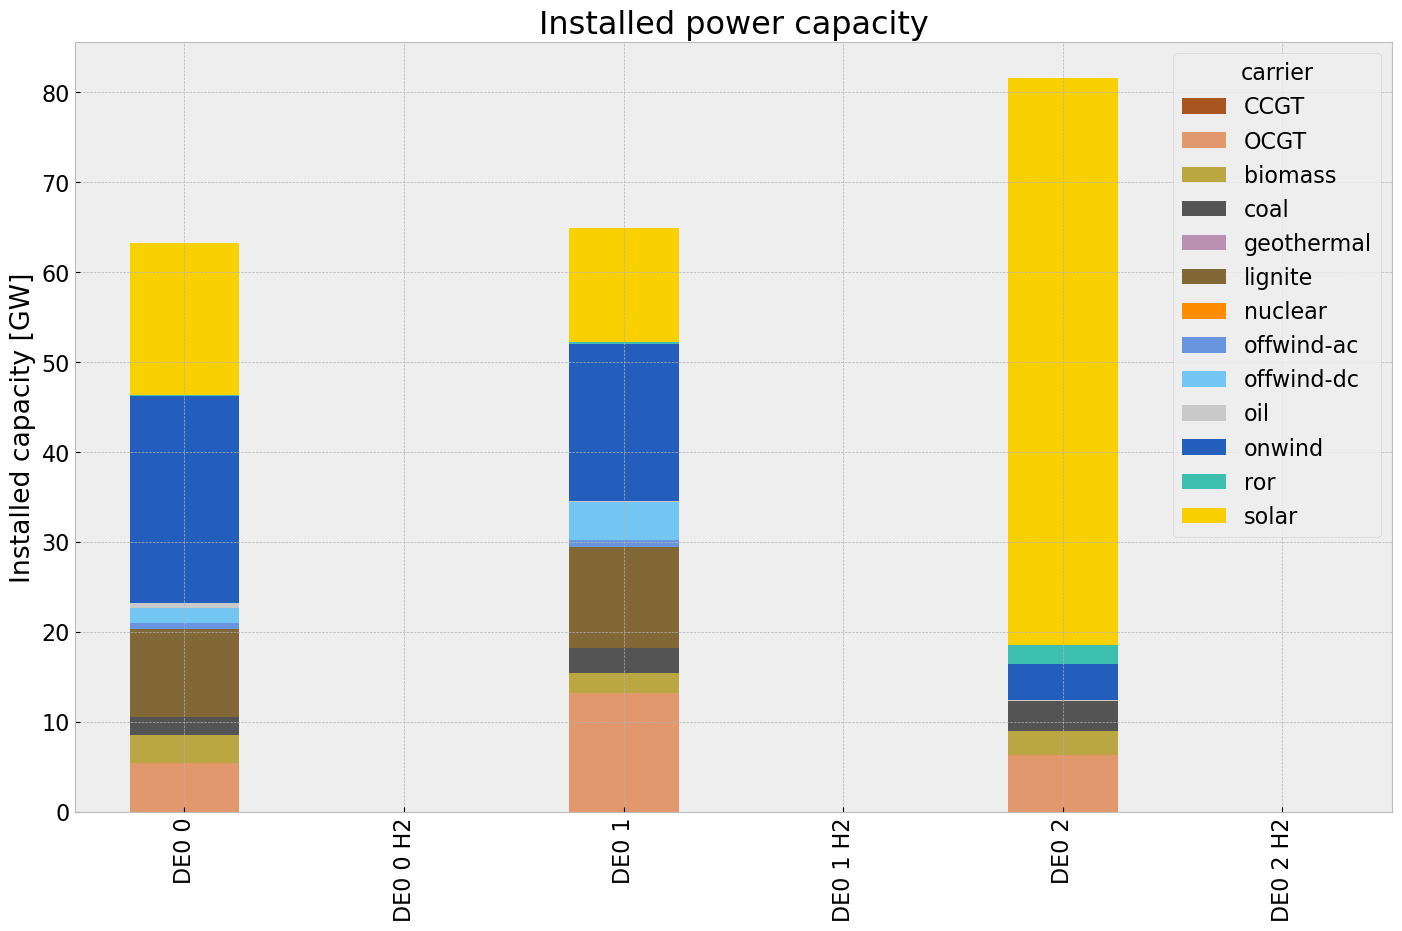

<Figure size 640x480 with 0 Axes>

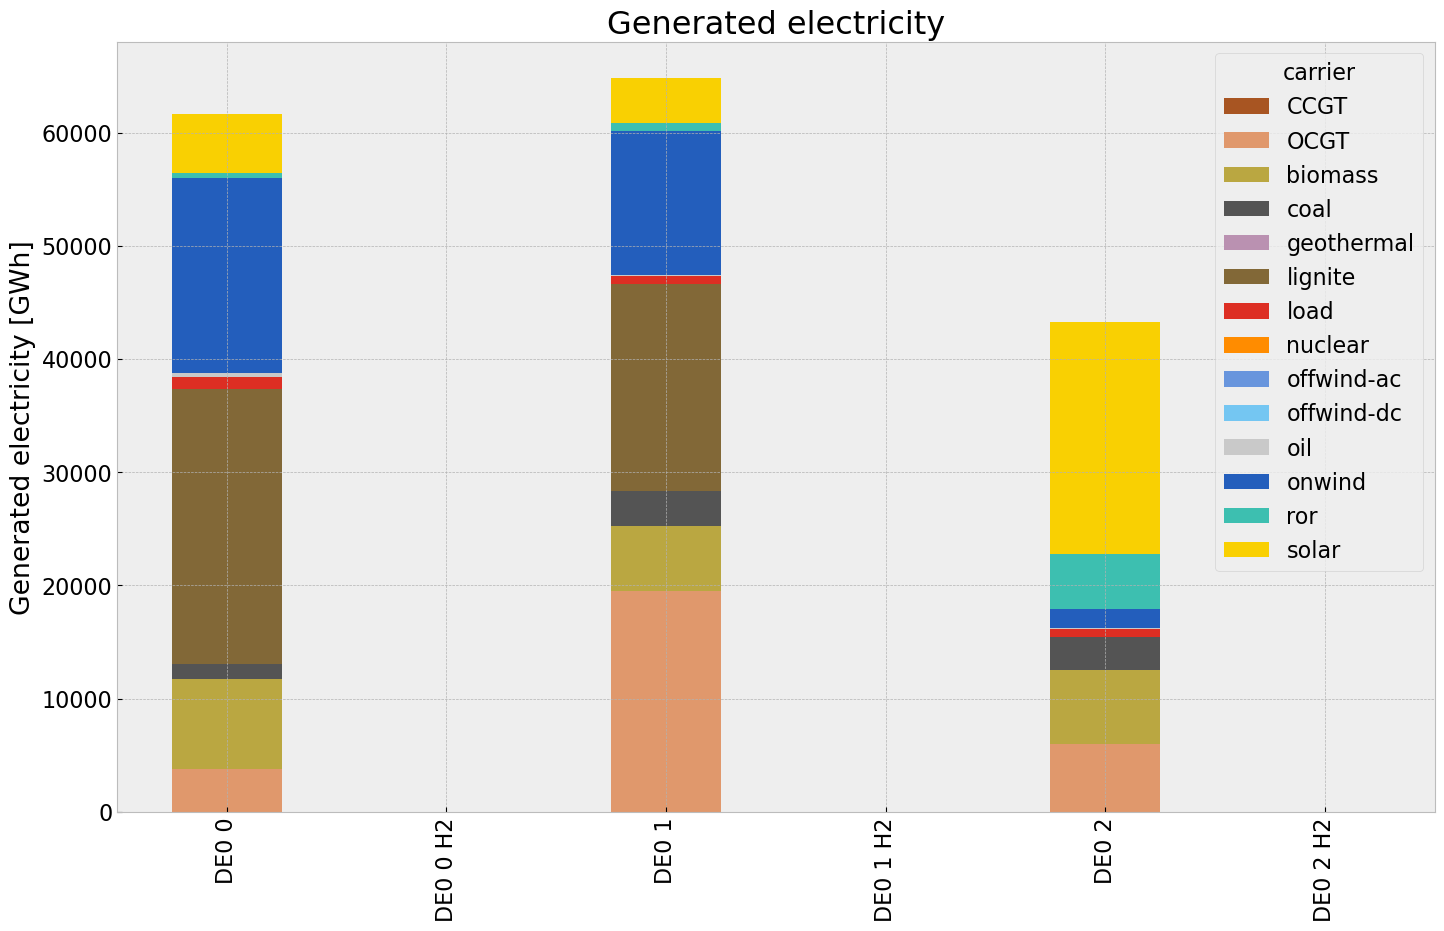

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1913995090.py:33: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p = n3.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1913995090.py:34: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n3.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carri

Generation in MWh  efficiency  emissions in Tonnes CO2/MWh  \
carrier                                                                  
CCGT             0.000000e+00    0.580000                       0.1980   
OCGT             2.924840e+07    0.498516                       0.1980   
biomass          2.021443e+07    0.468000                       0.0000   
coal             7.346816e+06    0.329687                       0.3361   
geothermal       0.000000e+00    1.000000                       0.1200   
lignite          4.260753e+07    0.362723                       0.4069   
load             2.464514e+06    1.000000                       0.0000   
nuclear          0.000000e+00    0.328667                       0.0000   
offwind-ac       9.825109e+03    1.000000                       0.0000   
offwind-dc       4.117236e+04    1.000000                       0.0000   
oil              4.325365e+05    0.376686                       0.2571   
onwind           3.167491e+07    1.000000                       0.0000   
ror              5.951822e+06    0.900000                       0.0000   
solar            2.966557e+07    1.000000                       0.0000   

            emissions in Tonnes CO2  
carrier                              
CCGT                   0.000000e+00  
OCGT                   1.161686e+07  
biomass                0.000000e+00  
coal                   7.489729e+06  
geothermal             0.000000e+00  
lignite                4.779683e+07  
load                   0.000000e+00  
nuclear                0.000000e+00  
offwind-ac             0.000000e+00  
offwind-dc             0.000000e+00  
oil                    2.952200e+05  
onwind                 0.000000e+00  
ror                    0.000000e+00  
solar                  0.000000e+00

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


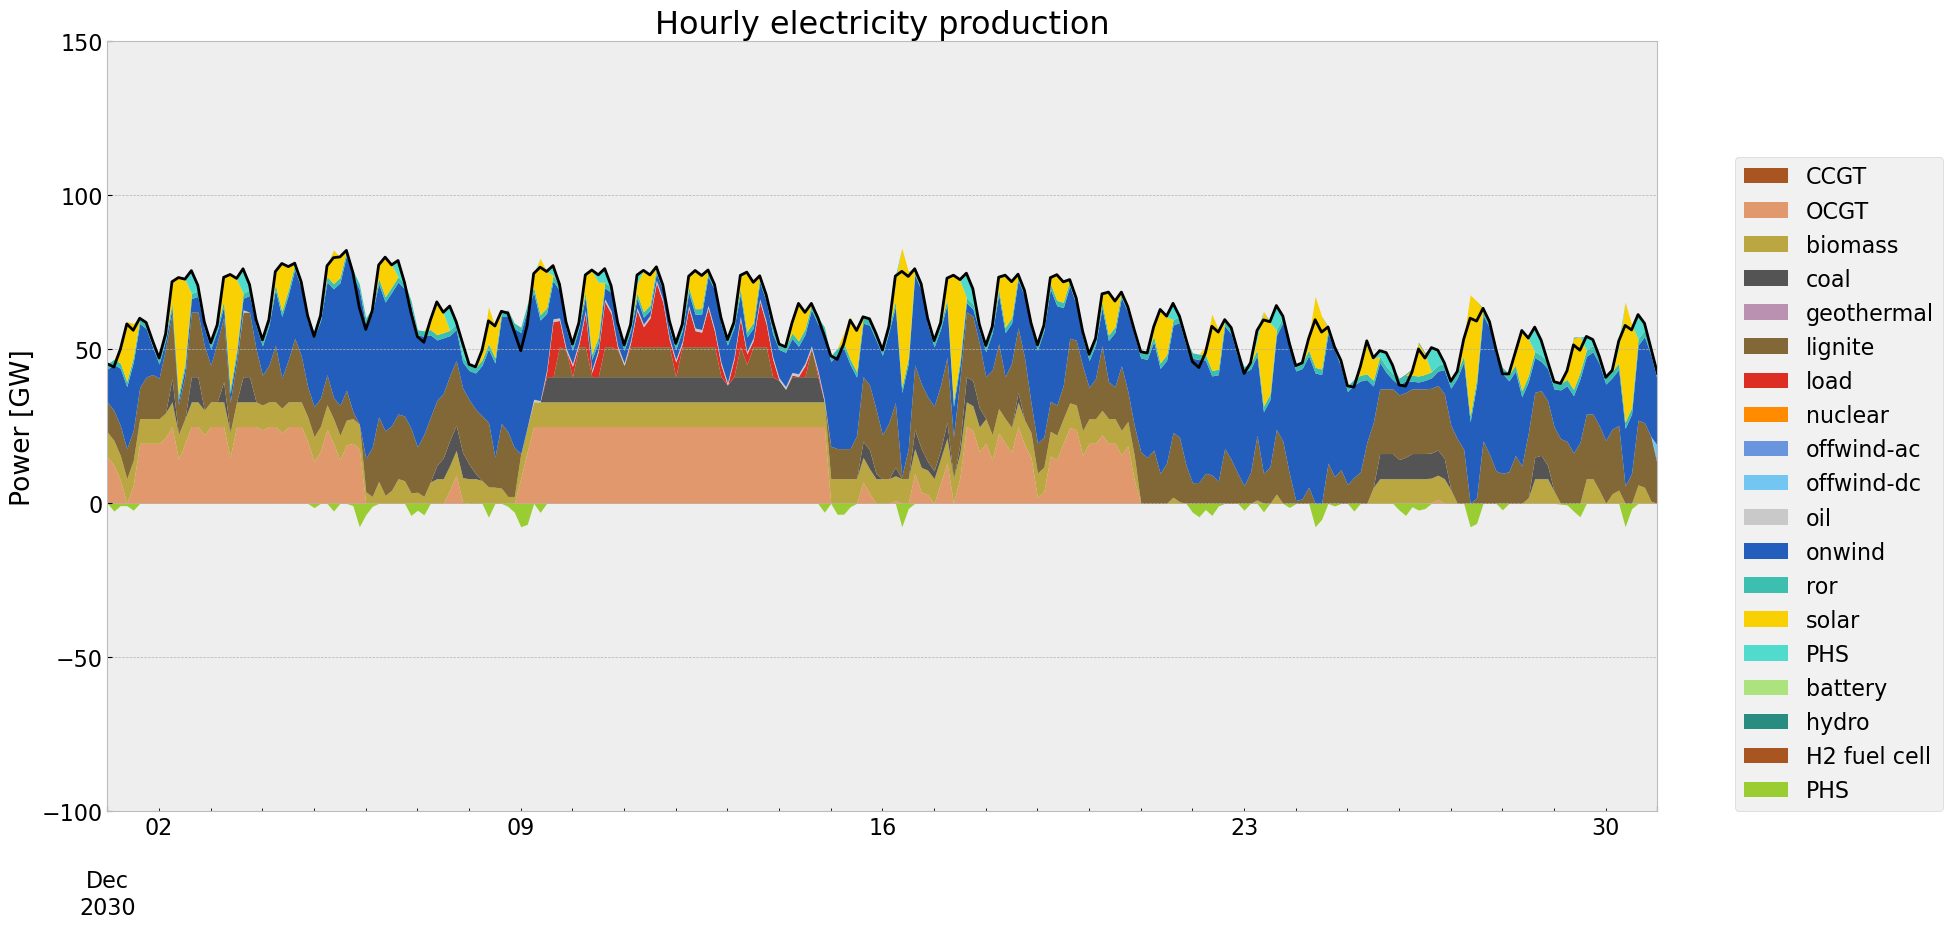

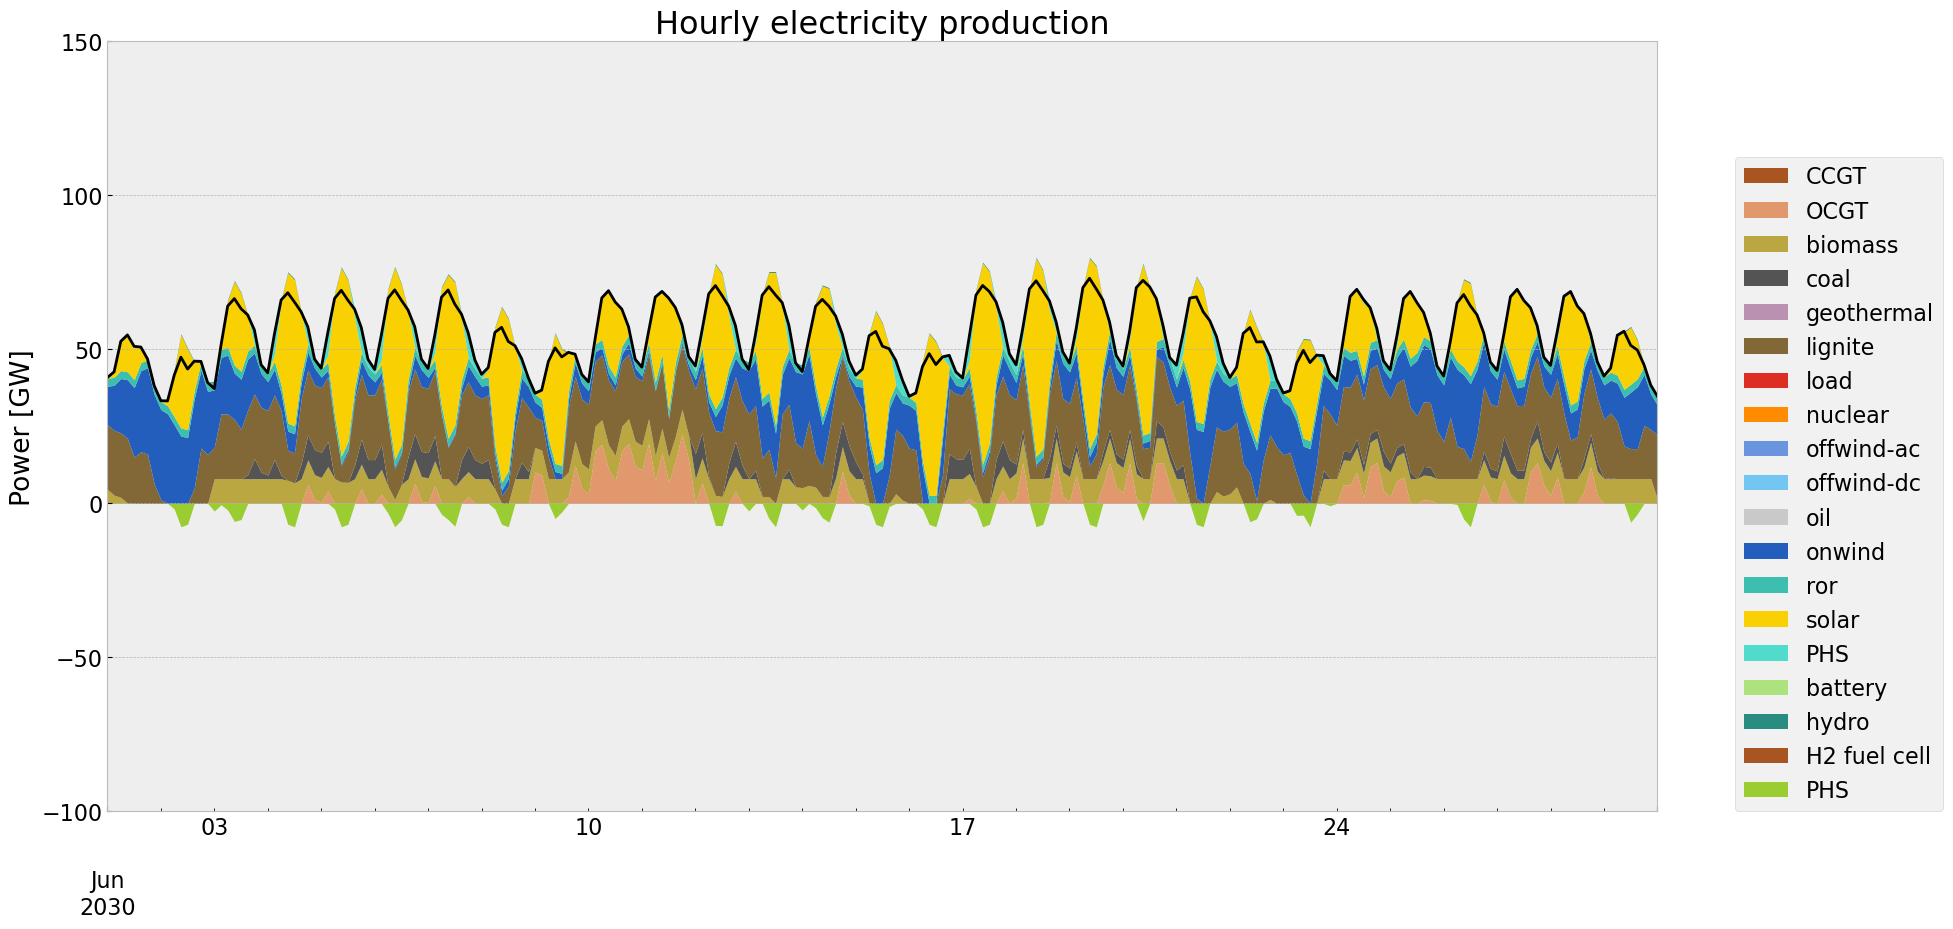

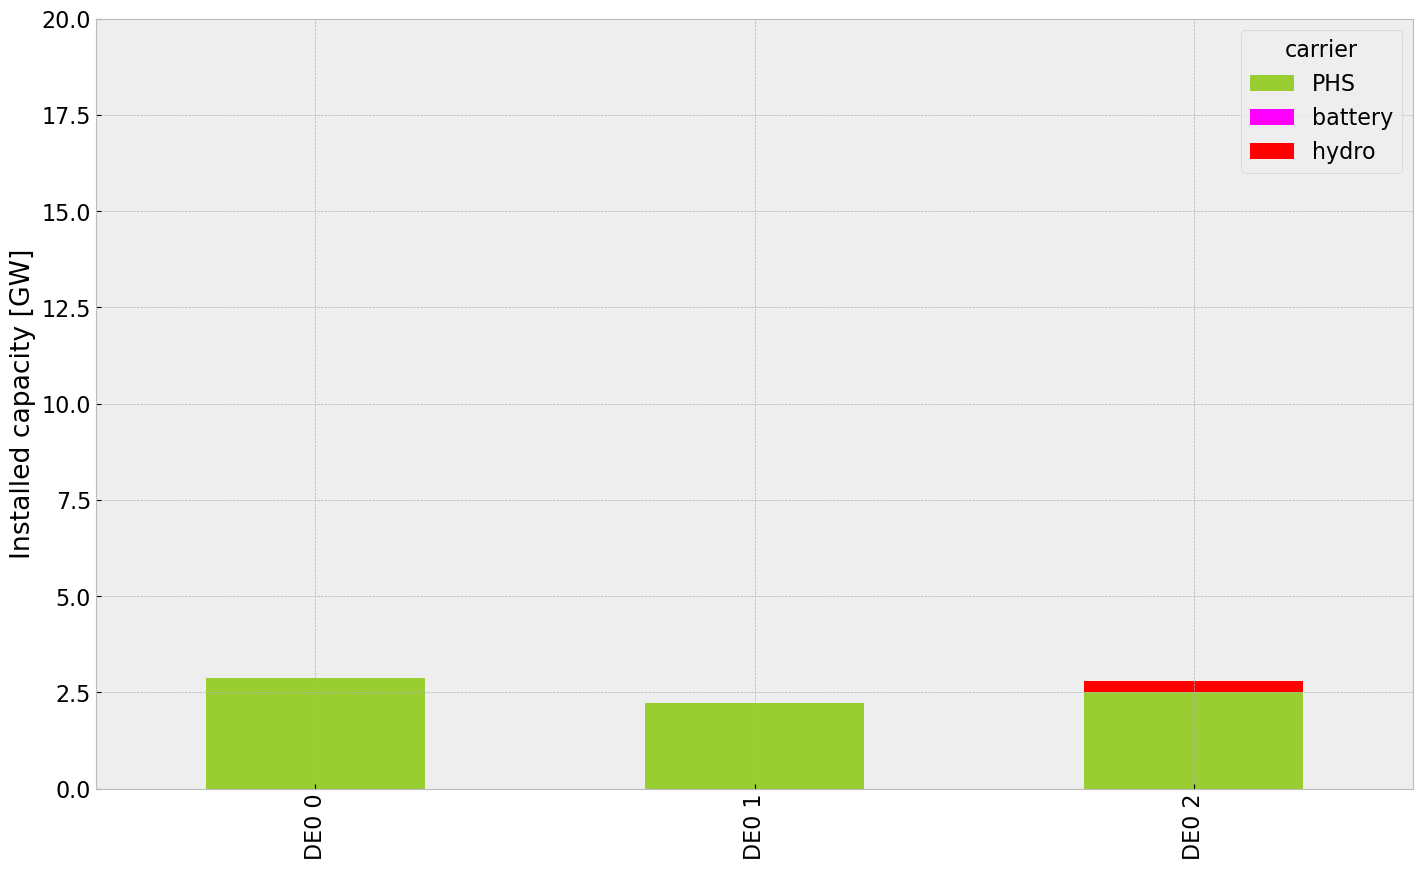

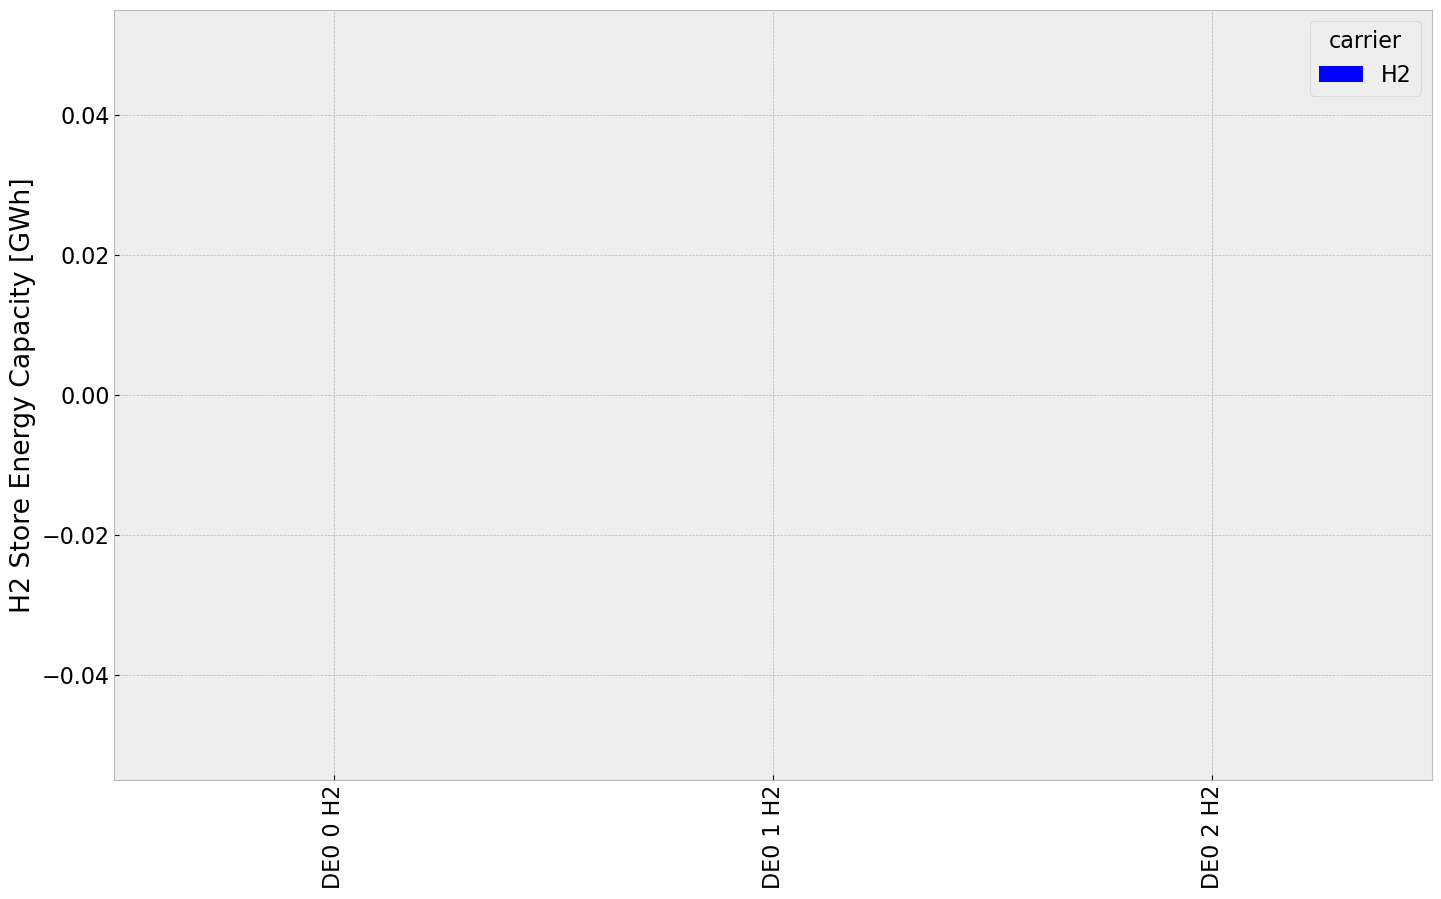

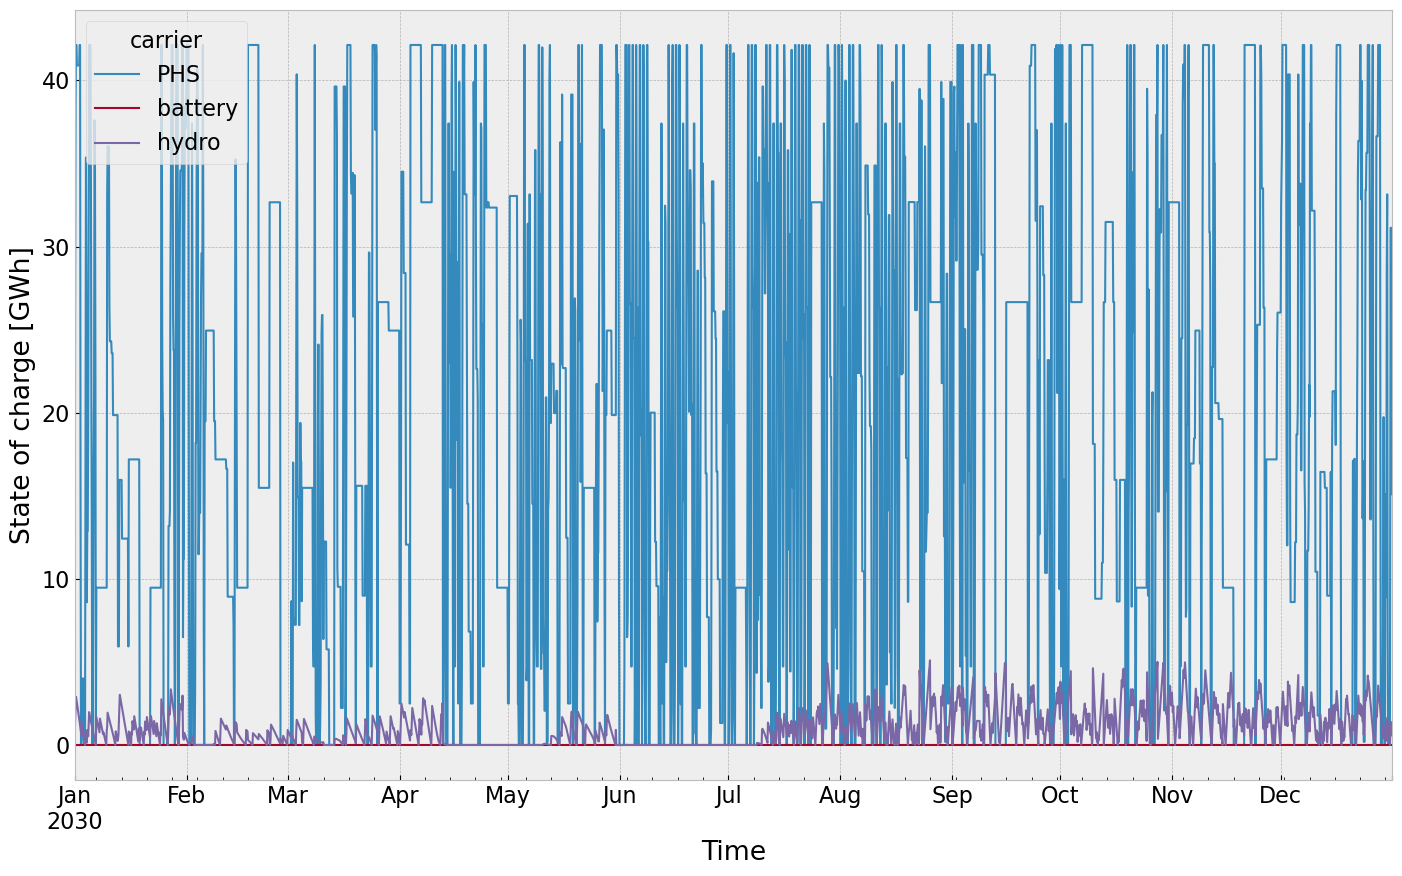

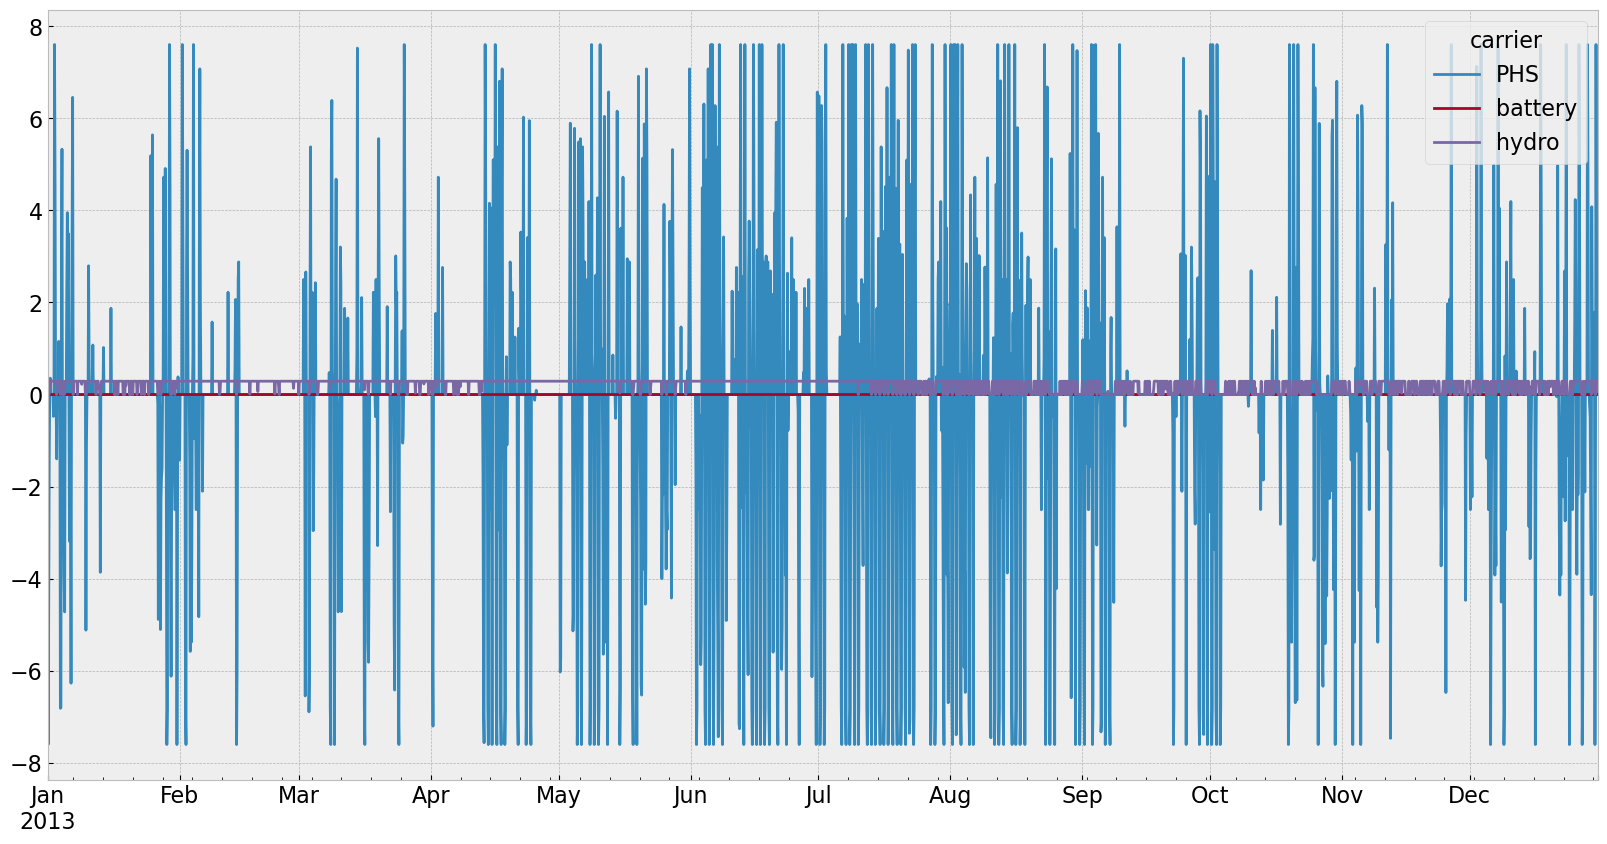

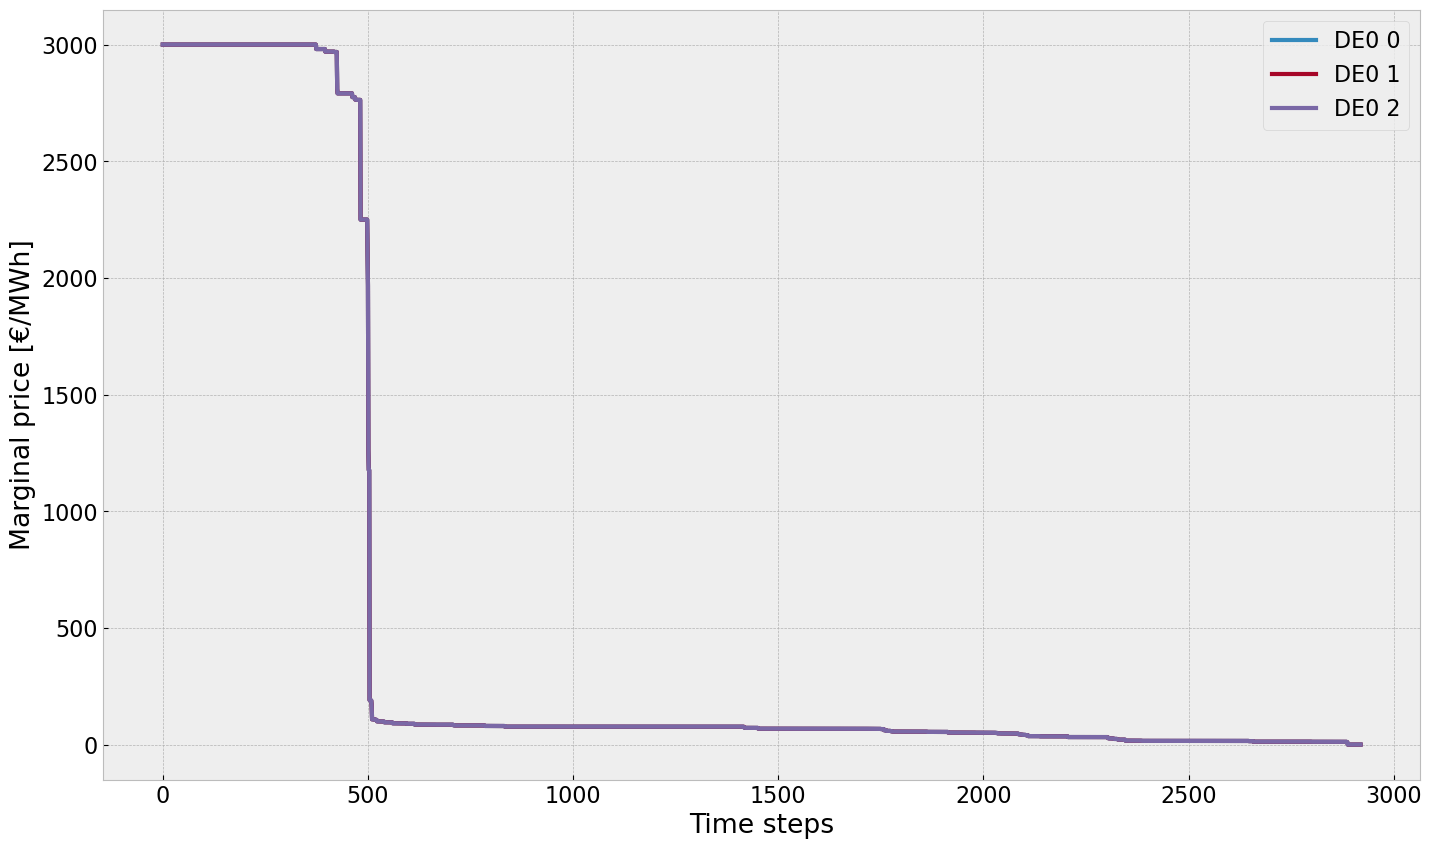

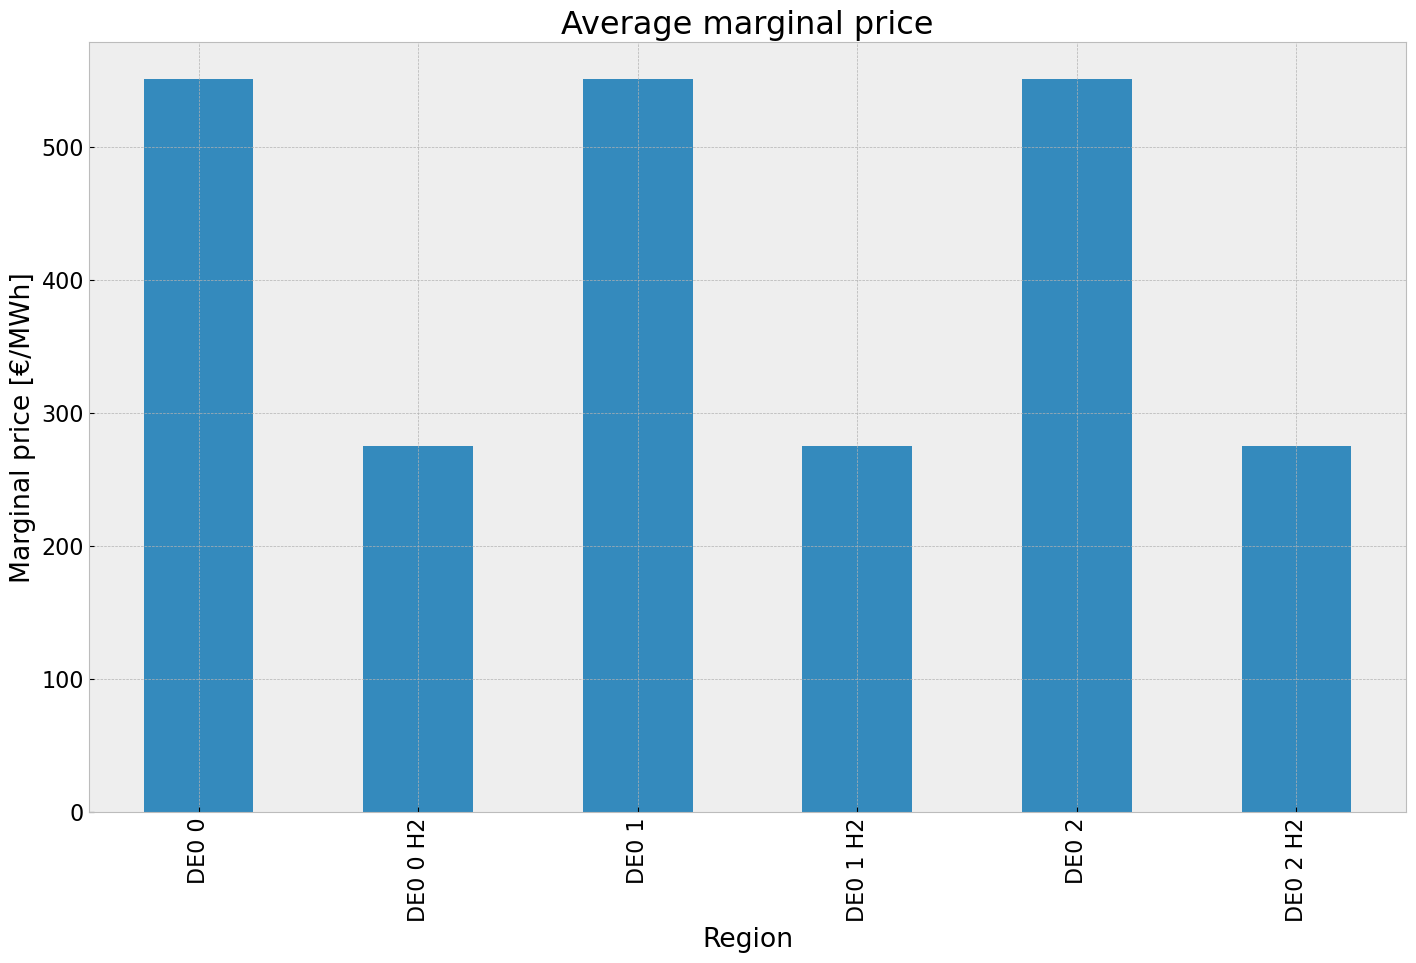

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


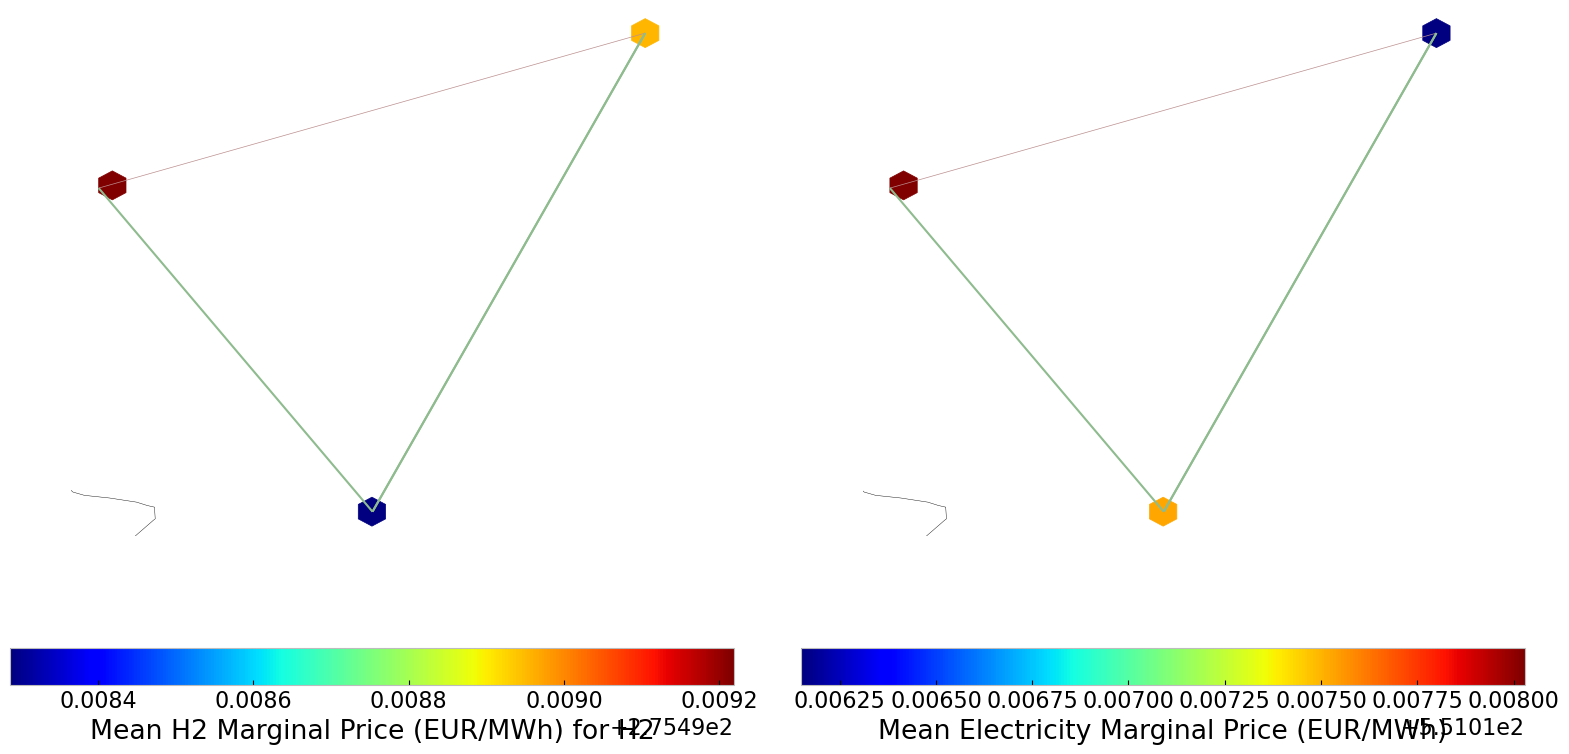

In [802]:
# Plotting
#installed cap
capacities_noinv_roll = n3.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities_noinv_roll.fillna(0, inplace=True)
gen = (capacities_noinv_roll.unstack()/1000).drop(columns=['load'],inplace=False)


cap_noinv_roll = inst_cap_table(n3, color_cap)

#Generation table
# consolidated generation table
carrier = n3.generators.carrier.unique()
df_tot_generation = n3.generators_t.p.sum()

generations = pd.Series(index = n3.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')
generations.fillna(0, inplace=True)

gen_noinv_roll =(generations.unstack()/1000)#GWh

gen_noinv_roll  = gen_power_table(n3,colors_gen_table)

#Snapshot Summer and Winter
p = n3.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
sto = n3.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)    

gen_curve(n3, '2030-12-01', '2030-12-31', colors_gen)
gen_curve(n3, '2030-06-01', '2030-06-30', colors_gen)

#installed storage unit & stores
inst_store_table(n3)
inst_storeh2_table(n3)

#State of Charge Storage unit
state_of_charge_plot(n3)
n3.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3).loc[pd.date_range(start="2013-01-01", end="2013-12-31",freq='3H')].plot(figsize=(20,10))


#Electricitty Price duration curve
price_dur_curve_plot(n3)

#avg electricity price
price_regions_table(n3)
price_regions(n3)

#Emission
em_noinv_roll =em_table(n3)
em_noinv_roll

# Scenario Analysis

## Installed Capacity

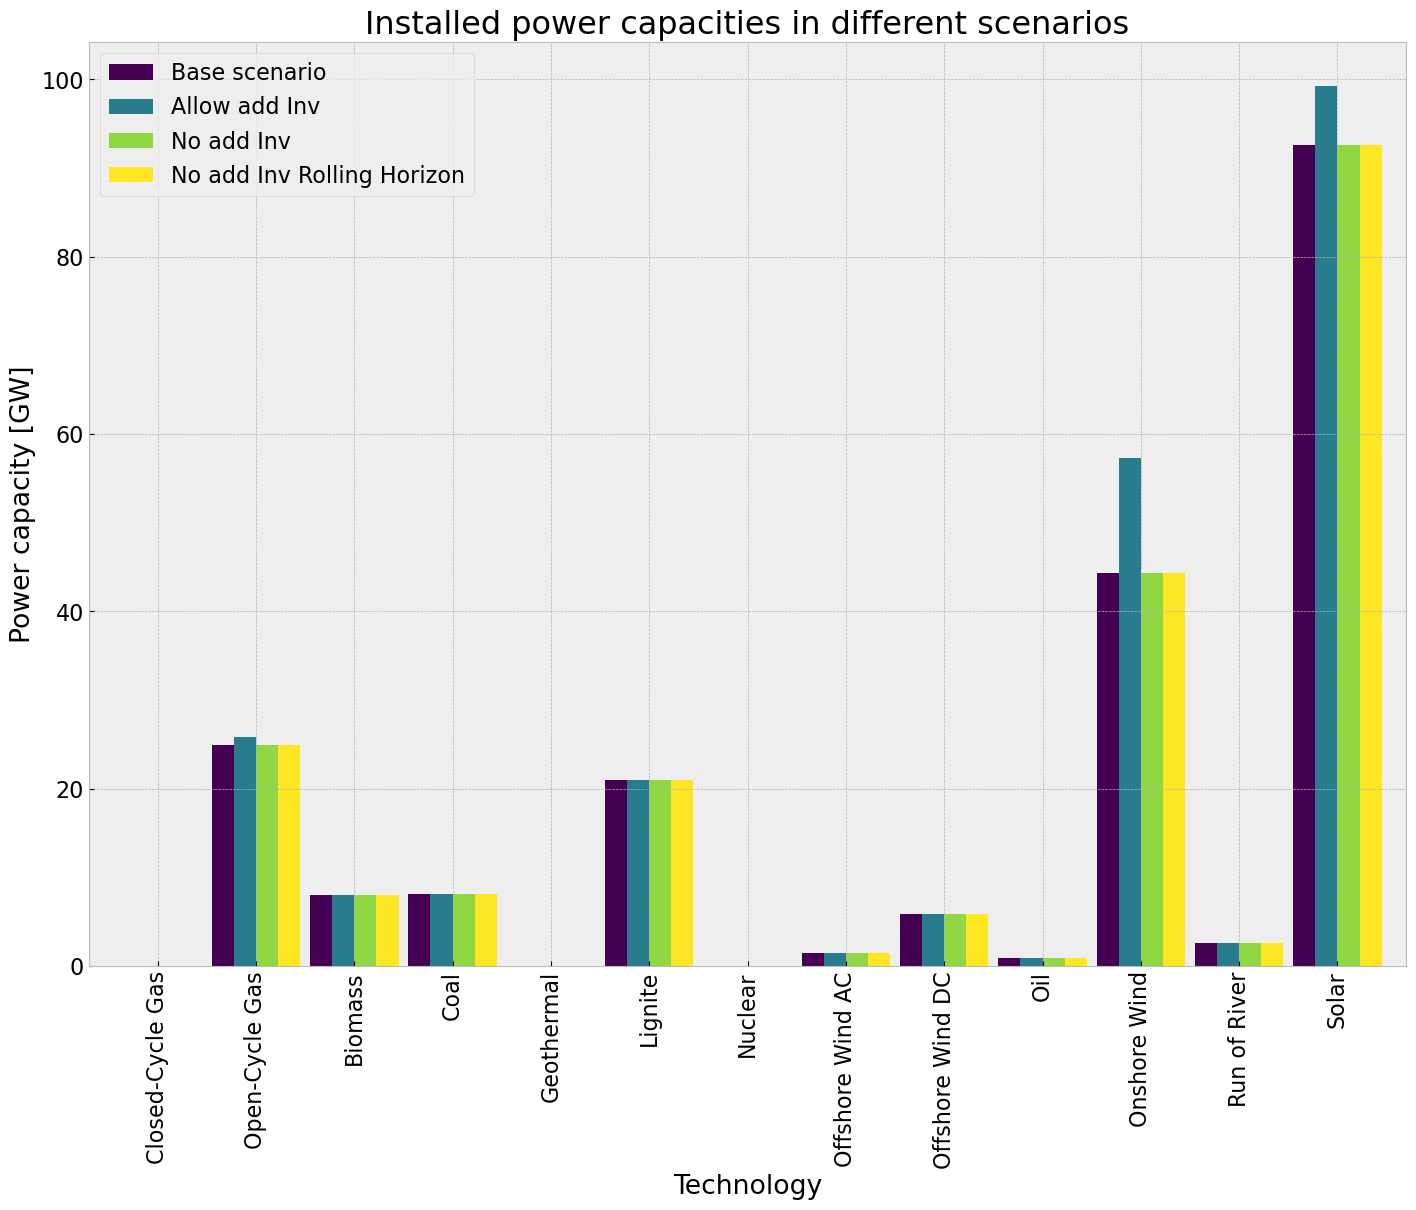

In [803]:
comp_inst_cap = pd.DataFrame(index=capacities_base.unstack().drop(columns=['load'],inplace=False).columns)

comp_inst_cap["Base scenario"] = capacities_base.groupby("carrier").sum().div(1e3).drop(index="load")
comp_inst_cap["Allow add Inv"] = capacities_inv.groupby("carrier").sum().div(1e3).drop(index="load")
comp_inst_cap["No add Inv"] = capacities_noinv.groupby("carrier").sum().div(1e3).drop(index="load")
comp_inst_cap["No add Inv Rolling Horizon"] = capacities_noinv_roll.groupby("carrier").sum().div(1e3).drop(index="load")

comp_inst_cap.rename(index = {"coal": "Coal"}, inplace=True)
comp_inst_cap.rename(index = {"OCGT": "Open-Cycle Gas"}, inplace=True)
comp_inst_cap.rename(index = {"CCGT": "Closed-Cycle Gas"}, inplace=True)
comp_inst_cap.rename(index = {"ror": "Run of River"}, inplace=True)
comp_inst_cap.rename(index = {"offwind-ac": "Offshore Wind AC"}, inplace=True)
comp_inst_cap.rename(index = {"offwind-dc": "Offshore Wind DC"}, inplace=True)
comp_inst_cap.rename(index = {"onwind": "Onshore Wind"}, inplace=True)
comp_inst_cap.rename(index = {"solar": "Solar"}, inplace=True)
comp_inst_cap.rename(index = {"oil": "Oil"}, inplace=True)
comp_inst_cap.rename(index = {"geothermal": "Geothermal"}, inplace=True)
comp_inst_cap.rename(index = {"nuclear": "Nuclear"}, inplace=True)
comp_inst_cap.rename(index = {"biomass": "Biomass"}, inplace=True)
comp_inst_cap.rename(index = {"lignite": "Lignite"}, inplace=True)

comp_inst_cap.fillna(0, inplace=True)

comp_inst_cap.plot.bar(figsize=(17,12),
                        color=cm.viridis(np.linspace(0, 5, len(comp_inst_cap))),
                        grid=True,
                        xlabel="Technology",
                        ylabel="Power capacity [GW]",
                        title=f"Installed power capacities in different scenarios",
                        #ylim=[0,350],
                        width=0.9
)
plt.show()

In [804]:
comp_inst_cap

Base scenario  Allow add Inv  No add Inv  \
carrier                                                      
Closed-Cycle Gas       0.000000       0.000000    0.000000   
Open-Cycle Gas        24.943319      25.798306   24.943319   
Biomass                8.011736       8.011736    8.011736   
Coal                   8.158220       8.158220    8.158220   
Geothermal             0.000000       0.000000    0.000000   
Lignite               20.999170      20.999170   20.999170   
Nuclear                0.000000       0.000000    0.000000   
Offshore Wind AC       1.455350       1.455350    1.455350   
Offshore Wind DC       5.856649       5.856649    5.856649   
Oil                    0.856300       0.856300    0.856300   
Onshore Wind          44.297108      57.243882   44.297108   
Run of River           2.586153       2.586153    2.586153   
Solar                 92.550528      99.252029   92.550528   

                  No add Inv Rolling Horizon  
carrier                                       
Closed-Cycle Gas                    0.000000  
Open-Cycle Gas                     24.943319  
Biomass                             8.011736  
Coal                                8.158220  
Geothermal                          0.000000  
Lignite                            20.999170  
Nuclear                             0.000000  
Offshore Wind AC                    1.455350  
Offshore Wind DC                    5.856649  
Oil                                 0.856300  
Onshore Wind                       44.297108  
Run of River                        2.586153  
Solar                              92.550528

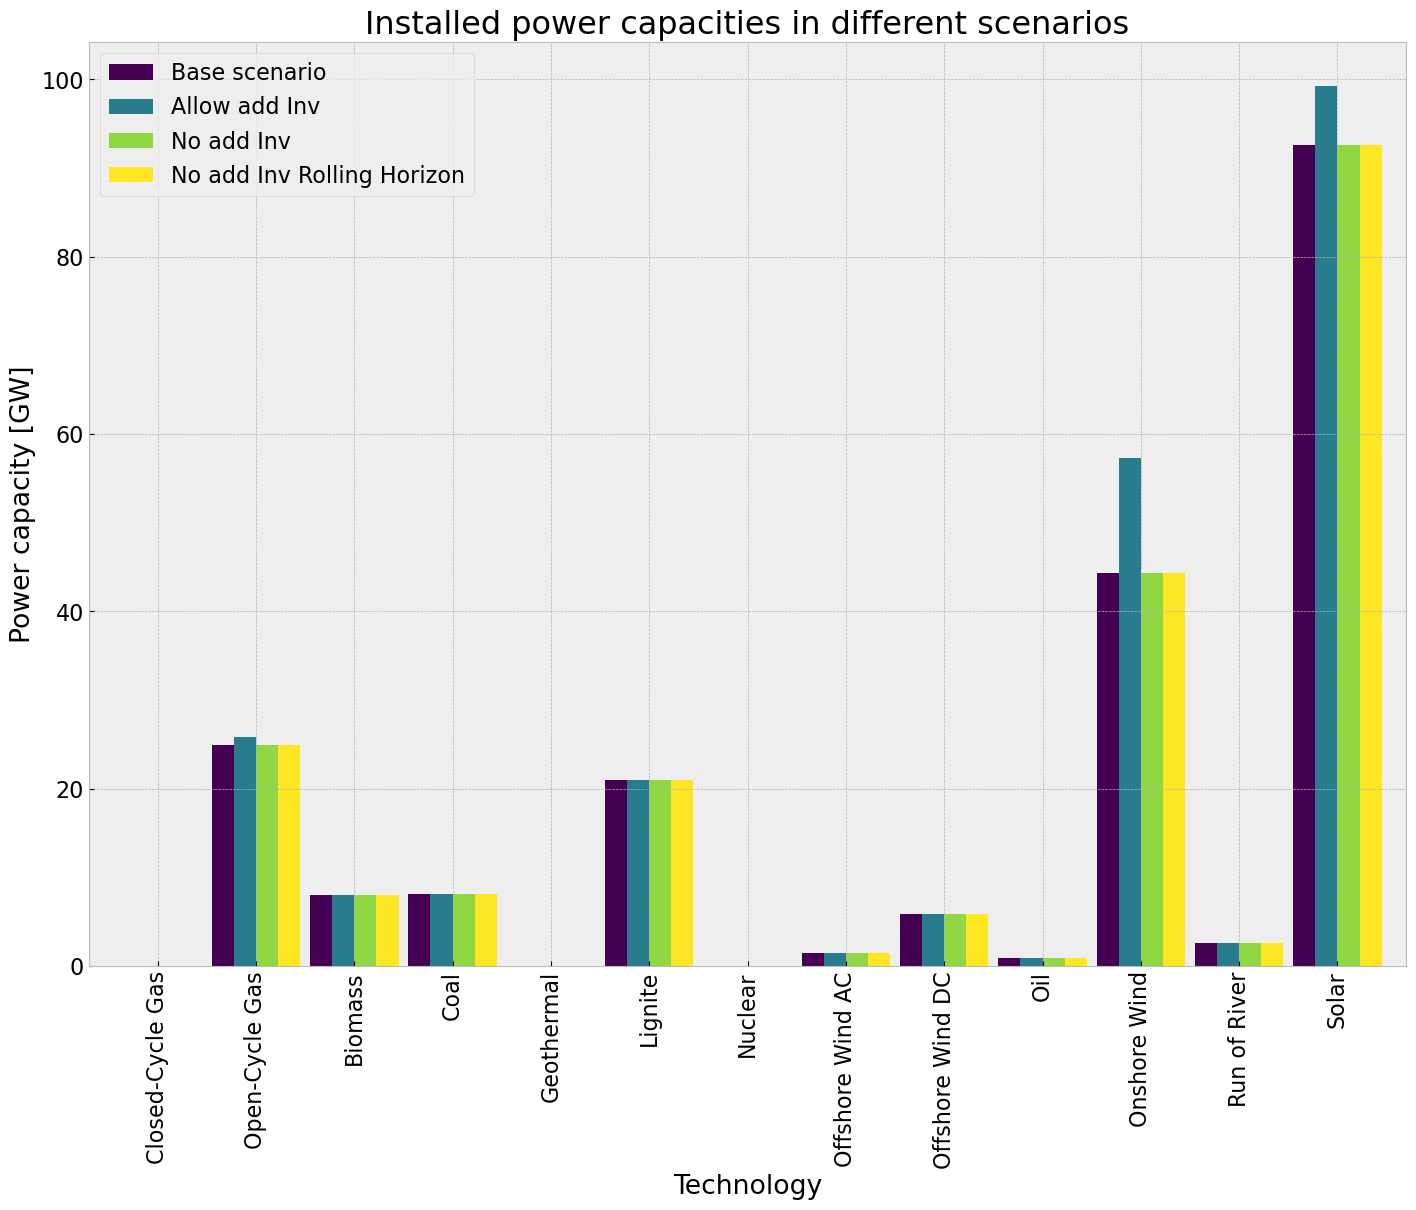

In [805]:
#colors = cm.viridis(np.linspace(0, 5, len(comp_inst_cap)))

comp_inst_cap.plot.bar(figsize=(17,12),
                        color=cm.viridis(np.linspace(0, 5, len(comp_inst_cap))),
                        grid=True,
                        xlabel="Technology",
                        ylabel="Power capacity [GW]",
                        title=f"Installed power capacities in different scenarios",
                        #ylim=[0,350],
                        width=0.9
)
plt.show()

## Power Generation

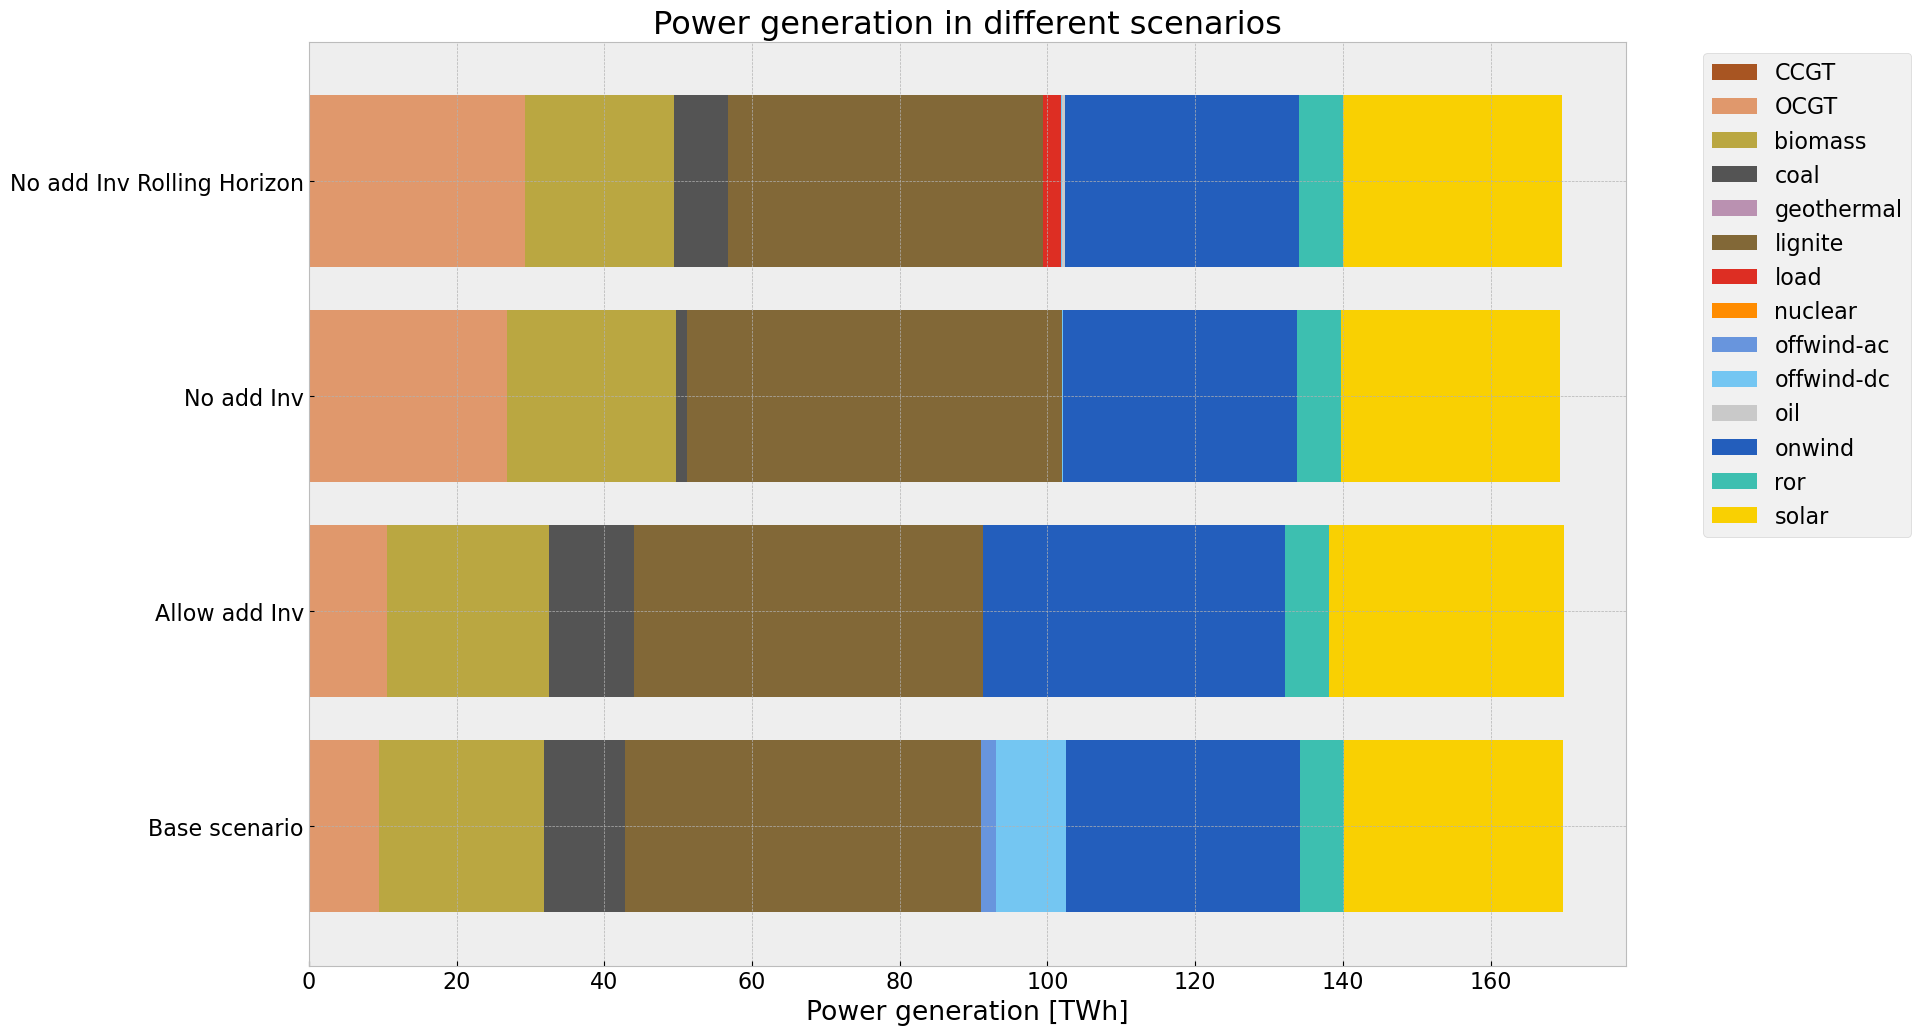

In [806]:
comp_gen_electr = pd.DataFrame(index = ["Base scenario", "Allow add Inv", "No add Inv", "No add Inv Rolling Horizon"],
                                columns = tech_list_gen_table)

comp_gen_electr.loc["Base scenario"] = gen_base.sum().div(1e3) # TWh/a
comp_gen_electr.loc["Allow add Inv"] = gen_inv.sum().div(1e3) # TWh/a
comp_gen_electr.loc["No add Inv"] = gen_noinv.sum().div(1e3) # TWh/a
comp_gen_electr.loc["No add Inv Rolling Horizon"] = gen_noinv_roll.sum().div(1e3) # TWh/a


#comp_gen_electr.rename(columns = {"coal": "Coal"}, inplace=True)
#comp_gen_electr.rename(columns = {"gas": "Gas"}, inplace=True)
#comp_gen_electr.rename(columns = {"hydro": "Hydro"}, inplace=True)
#comp_gen_electr.rename(columns = {"offwind": "Offshore Wind"}, inplace=True)
#comp_gen_electr.rename(columns = {"onwind": "Onshore Wind"}, inplace=True)
#comp_gen_electr.rename(columns = {"solar": "Solar"}, inplace=True)
#comp_gen_electr.rename(columns = {"oil": "Oil"}, inplace=True)
#comp_gen_electr.rename(columns = {"geothermal": "Geothermal"}, inplace=True)
#comp_gen_electr.rename(columns = {"nuclear": "Nuclear"}, inplace=True)

comp_gen_electr.fillna(0, inplace=True)
comp_gen_electr.plot.barh(figsize=(17,12),
                        color=colors_gen_table,
                        grid=True,
                        stacked=True, 
                        ylabel="",
                        xlabel="Power generation [TWh]",
                        title=f"Power generation in different scenarios",
                        #xlim=[0,200],
                        width=0.8
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

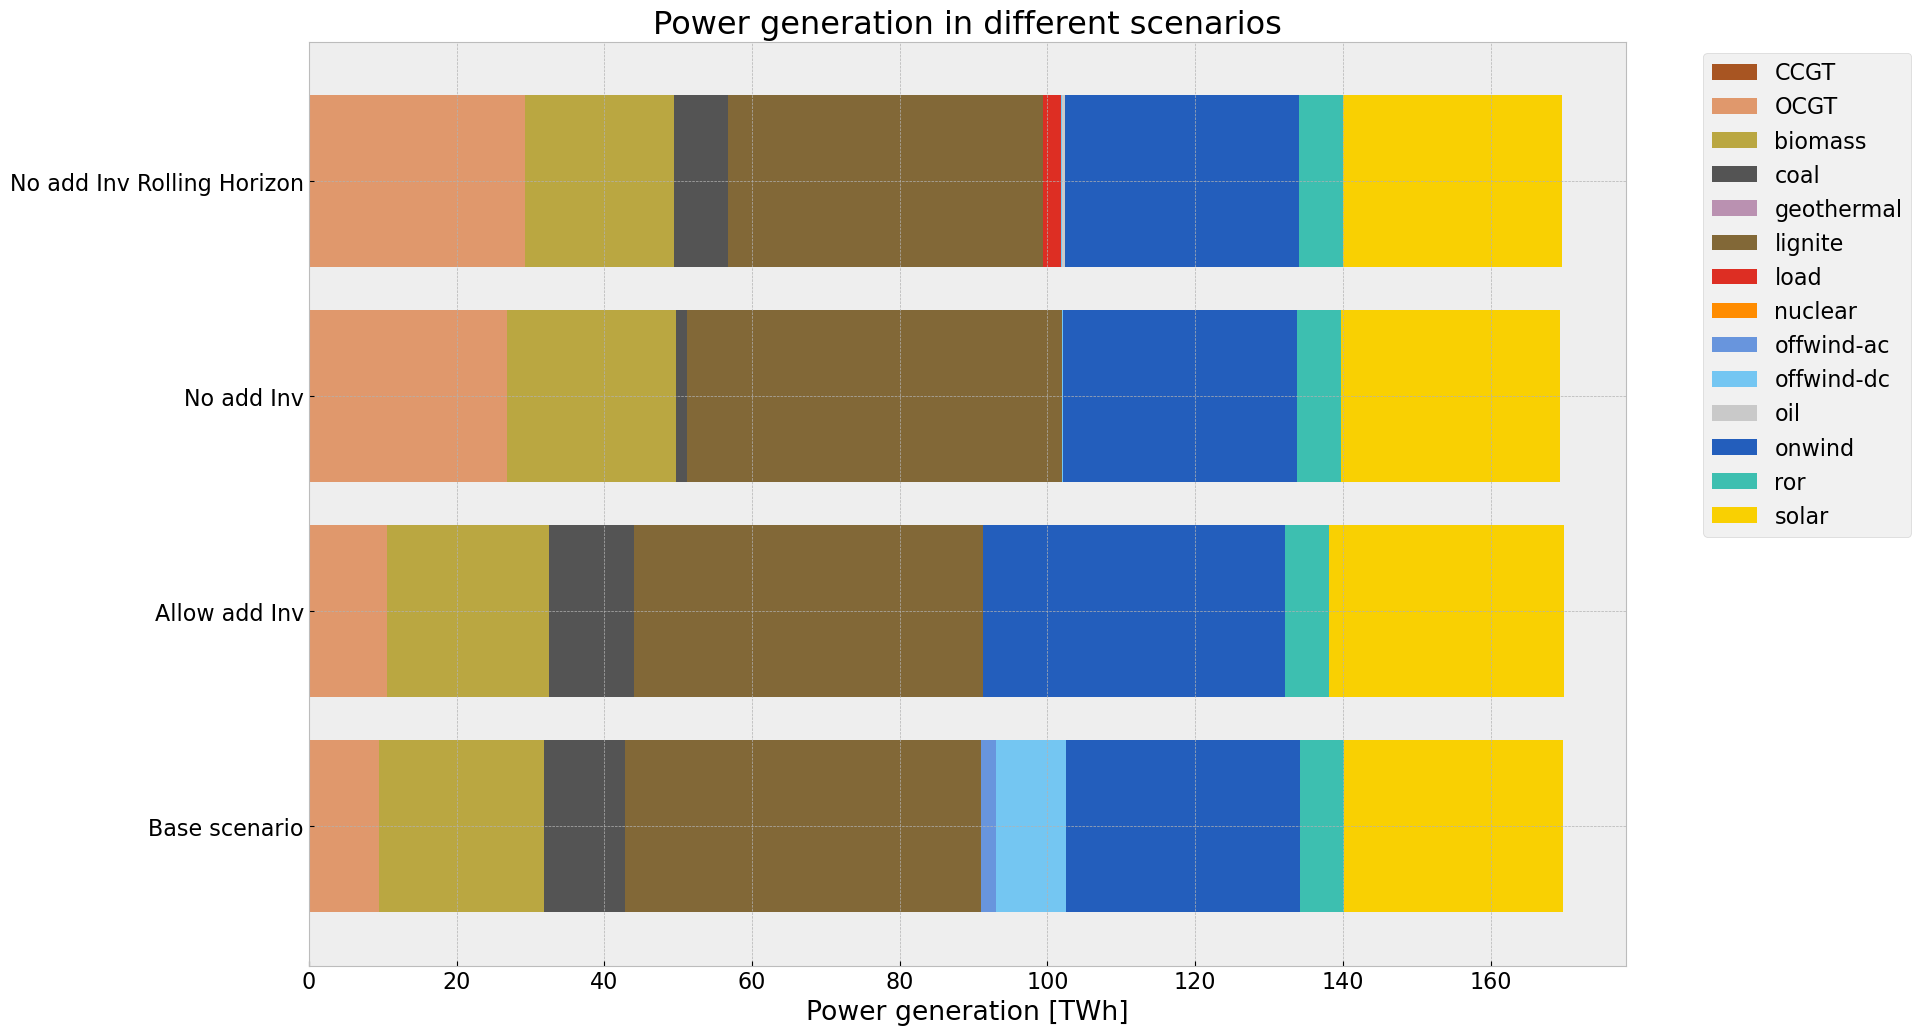

In [807]:
comp_gen_electr.plot.barh(figsize=(17,12),
                        color=colors_gen_table,
                        grid=True,
                        stacked=True, 
                        ylabel="",
                        xlabel="Power generation [TWh]",
                        title=f"Power generation in different scenarios",
                        #xlim=[0,200],
                        width=0.8
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Average System Cost

In [808]:
tech_comp = system_cost_base.index.tolist()
comp_system_cost = pd.DataFrame(index = ["Base scenario", "Allowed add Inv", "No add Inv", "No add Inv Rolling Horizon"],
                                columns =tech_comp)

demand = n.snapshot_weightings.generators @ n.loads_t.p_set.sum(axis=1) # the same in each scenario

comp_system_cost.loc["Base scenario"] = system_cost_base # Million €/a
comp_system_cost.loc["Allowed add Inv"] = system_cost_inv # Million €/a
#if tot_cost_0_PV > 0: 
#    comp_system_cost.loc["0% PV potential"] = system_cost_0_PV # Million €/a
#else: comp_system_cost.loc["0% PV potential"] = 0.0
#if tot_cost_20_PV > 0: 
#    comp_system_cost.loc["20% PV potential"] = system_cost_20_PV # Million €/a
#else: comp_system_cost.loc["20% PV potential"] = 0.0
comp_system_cost.loc["No add Inv"] = system_cost_noinv # Million €/a
comp_system_cost.loc["No add Inv Rolling Horizon"] = system_cost_noinv_roll # Million €/a

if 'AC' in system_cost_base:
    comp_system_cost.AC = comp_system_cost.AC-system_cost_base.AC # expenditure for already existing transmission lines

comp_system_cost[comp_system_cost<0] = 0 # since we subtact the AC cost (for the 0% or 20%) 
#comp_system_cost.iloc[0,0] = system_cost_base.AC


comp_system_cost = comp_system_cost.mul(1e6).div(demand) #eur0/

#comp_system_cost.rename(columns = {"battery storage": "Battery storage"}, inplace=True)
#comp_system_cost.rename(columns = {"hydrogen storage underground": "Hydrogen storage underground"}, inplace=True)

comp_system_cost.fillna(0, inplace=True)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\2925963551.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comp_system_cost.fillna(0, inplace=True)


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\3585904631.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if comp_system_cost.columns[i] == n.carriers.nice_name[j]:
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\3585904631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_comp.append(n.carriers.color[j])


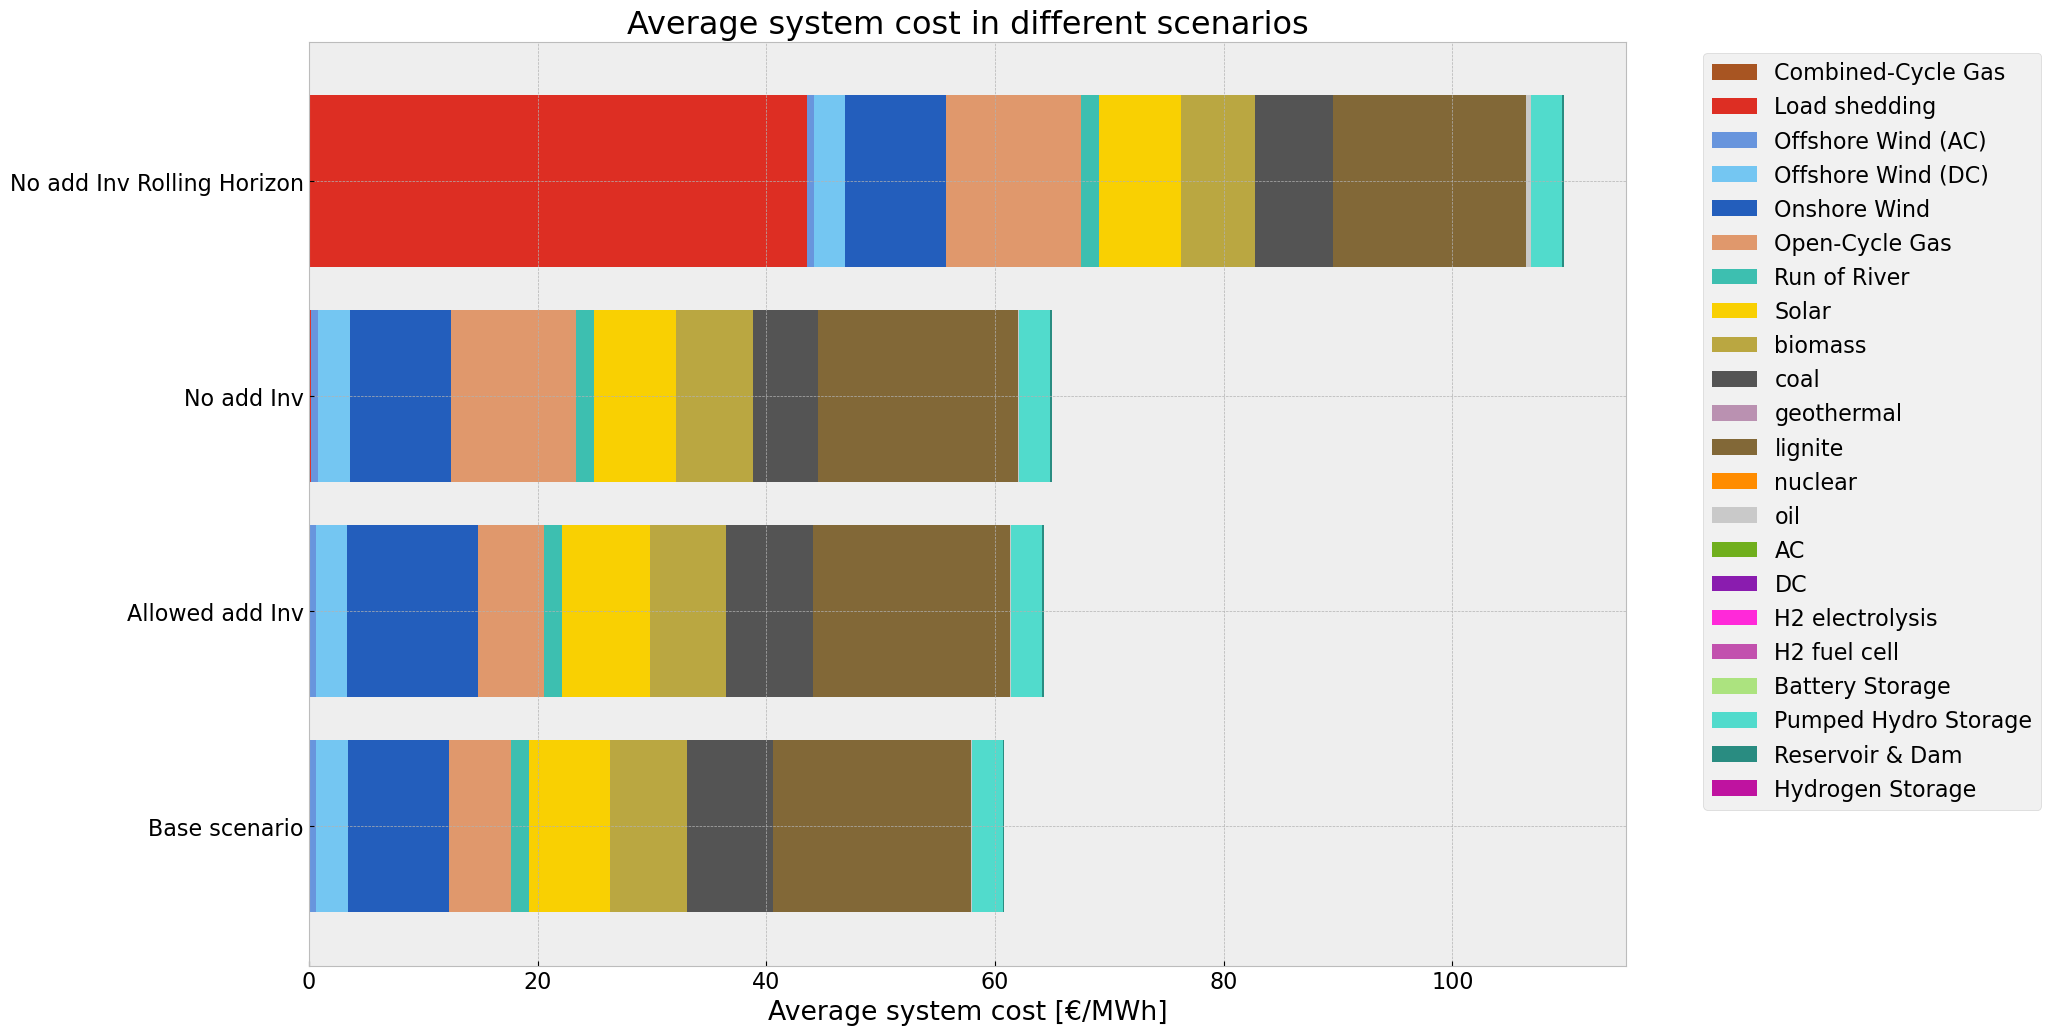

In [809]:
colors_comp = []

for i in range(len(comp_system_cost.columns)):
    for j in range(len(n.carriers.nice_name)):
        if comp_system_cost.columns[i] == n.carriers.nice_name[j]:
            colors_comp.append(n.carriers.color[j])
            #print(n.carriers.nice_name[j],comp_system_cost.columns[i],n.carriers.color[j])
            break  # break the inner loop once a match is found  



comp_system_cost.plot.barh(figsize=(17,12),
                        color=colors_comp,
                        grid=True,
                        stacked=True,
                        ylabel="",
                        xlabel="Average system cost [€/MWh]",
                        title=f"Average system cost in different scenarios",
                        #xlim=[0,100],
                        width=0.8
)
# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Curtailment

In [810]:
comp_curtailment = pd.DataFrame(index = ["Base scenario", "Allow add Inv", "No add Inv", "No add Inv Rolling Horizon"],
                                columns = stat_base.loc["Generator"].index)

comp_curtailment.loc["Base scenario"] = stat_base.loc["Generator"].Curtailment.div(1e6) # TWh
comp_curtailment.loc["Allow add Inv"] = stat_inv.loc["Generator"].Curtailment.div(1e6) # TWh
comp_curtailment.loc["No add Inv"] = stat_noinv.loc["Generator"].Curtailment.div(1e6) # TWh
comp_curtailment.loc["No add Inv Rolling Horizon"] = stat_noinv_roll.loc["Generator"].Curtailment.div(1e6) # TWh

comp_curtailment.fillna(0, inplace=True)

In [811]:
color_curtailment=[]

for i in range(len(comp_curtailment.columns)):
    for j in range(len(n.carriers.nice_name)):
        if comp_curtailment.columns[i] == n.carriers.nice_name[j]:
            color_curtailment.append(n.carriers.color[j])
            #print(n.carriers.nice_name[j],comp_system_cost.columns[i],n.carriers.color[j])
            break  # break the inner loop once a match is found 

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\3109801822.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if comp_curtailment.columns[i] == n.carriers.nice_name[j]:
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\3109801822.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_curtailment.append(n.carriers.color[j])


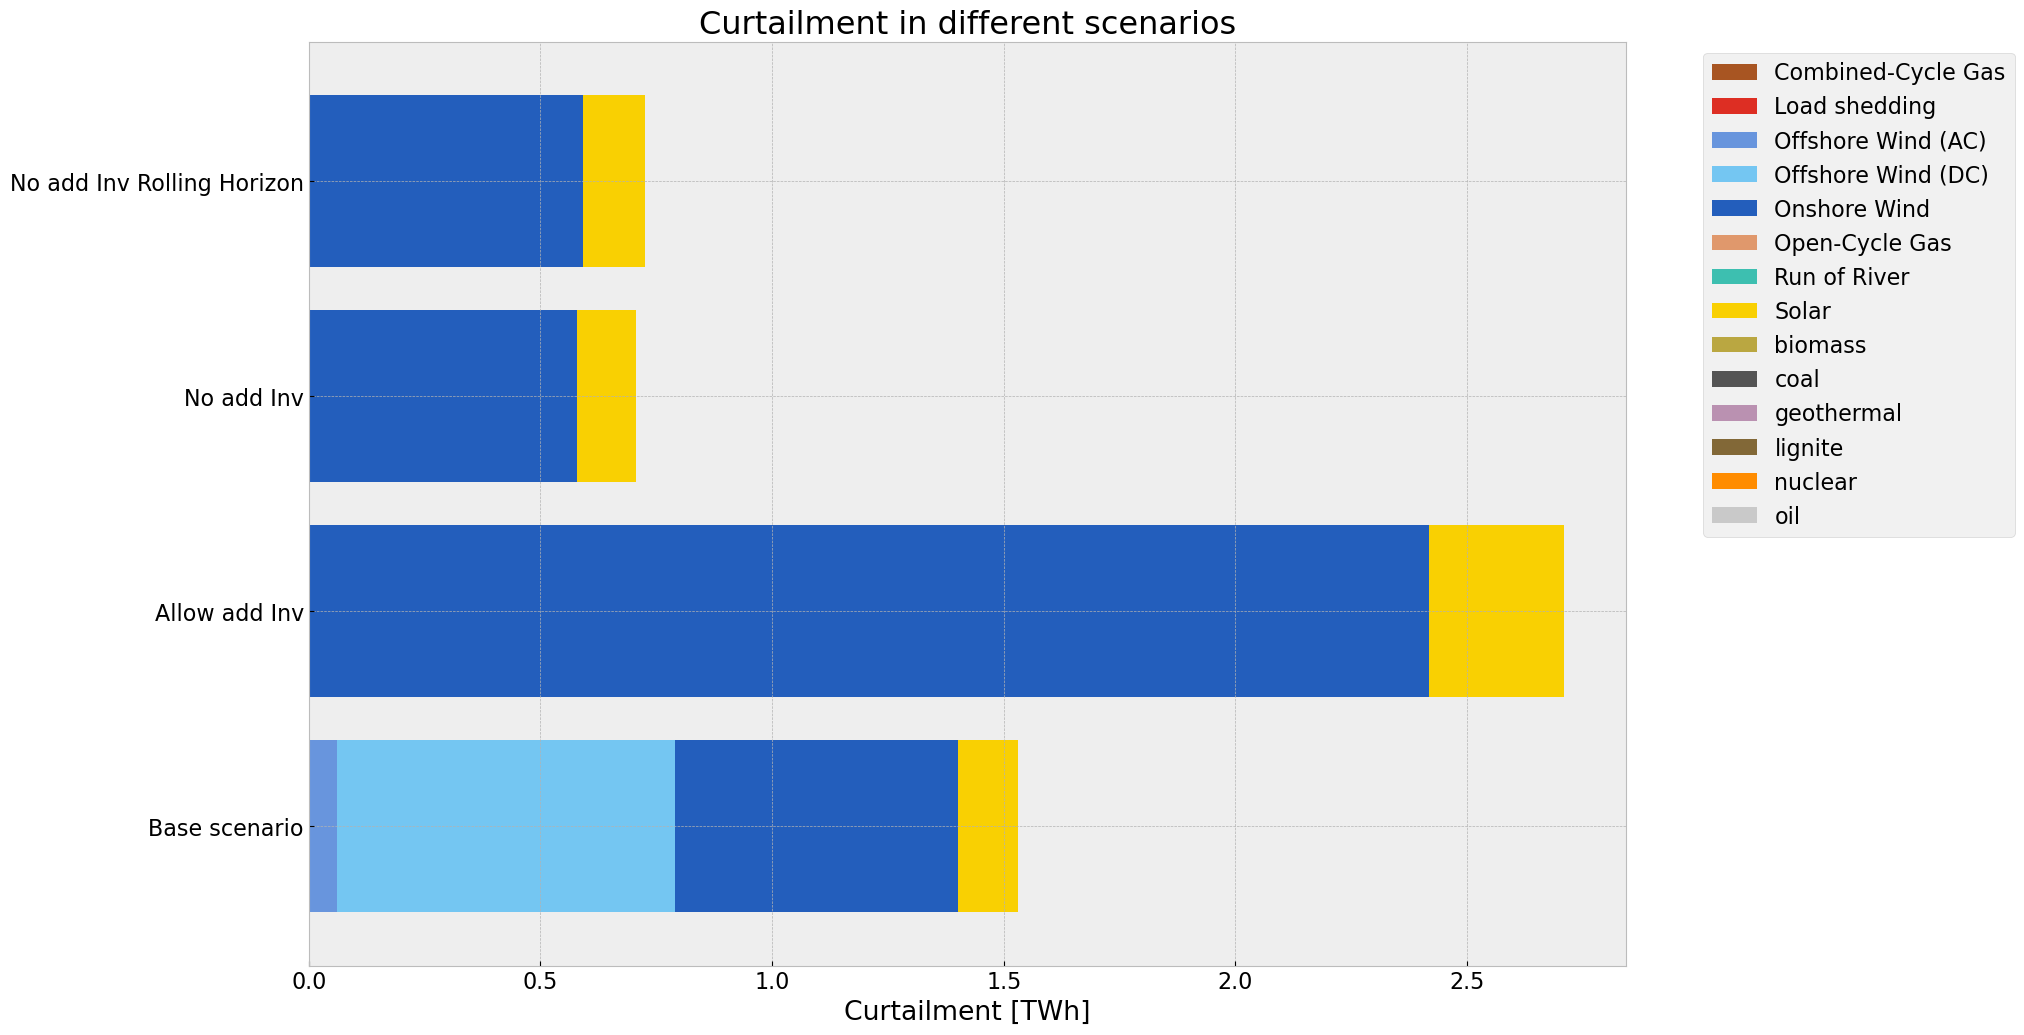

In [812]:
comp_curtailment.plot.barh(figsize=(17,12),
                        color=color_curtailment,
                        grid=True,
                        stacked=True, 
                        ylabel="",
                        xlabel="Curtailment [TWh]",
                        title=f"Curtailment in different scenarios",
                        #xlim=[0,120],
                        width=0.8
)
# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Emission

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_15764\3440082642.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_comp.append(n.carriers.color[j])


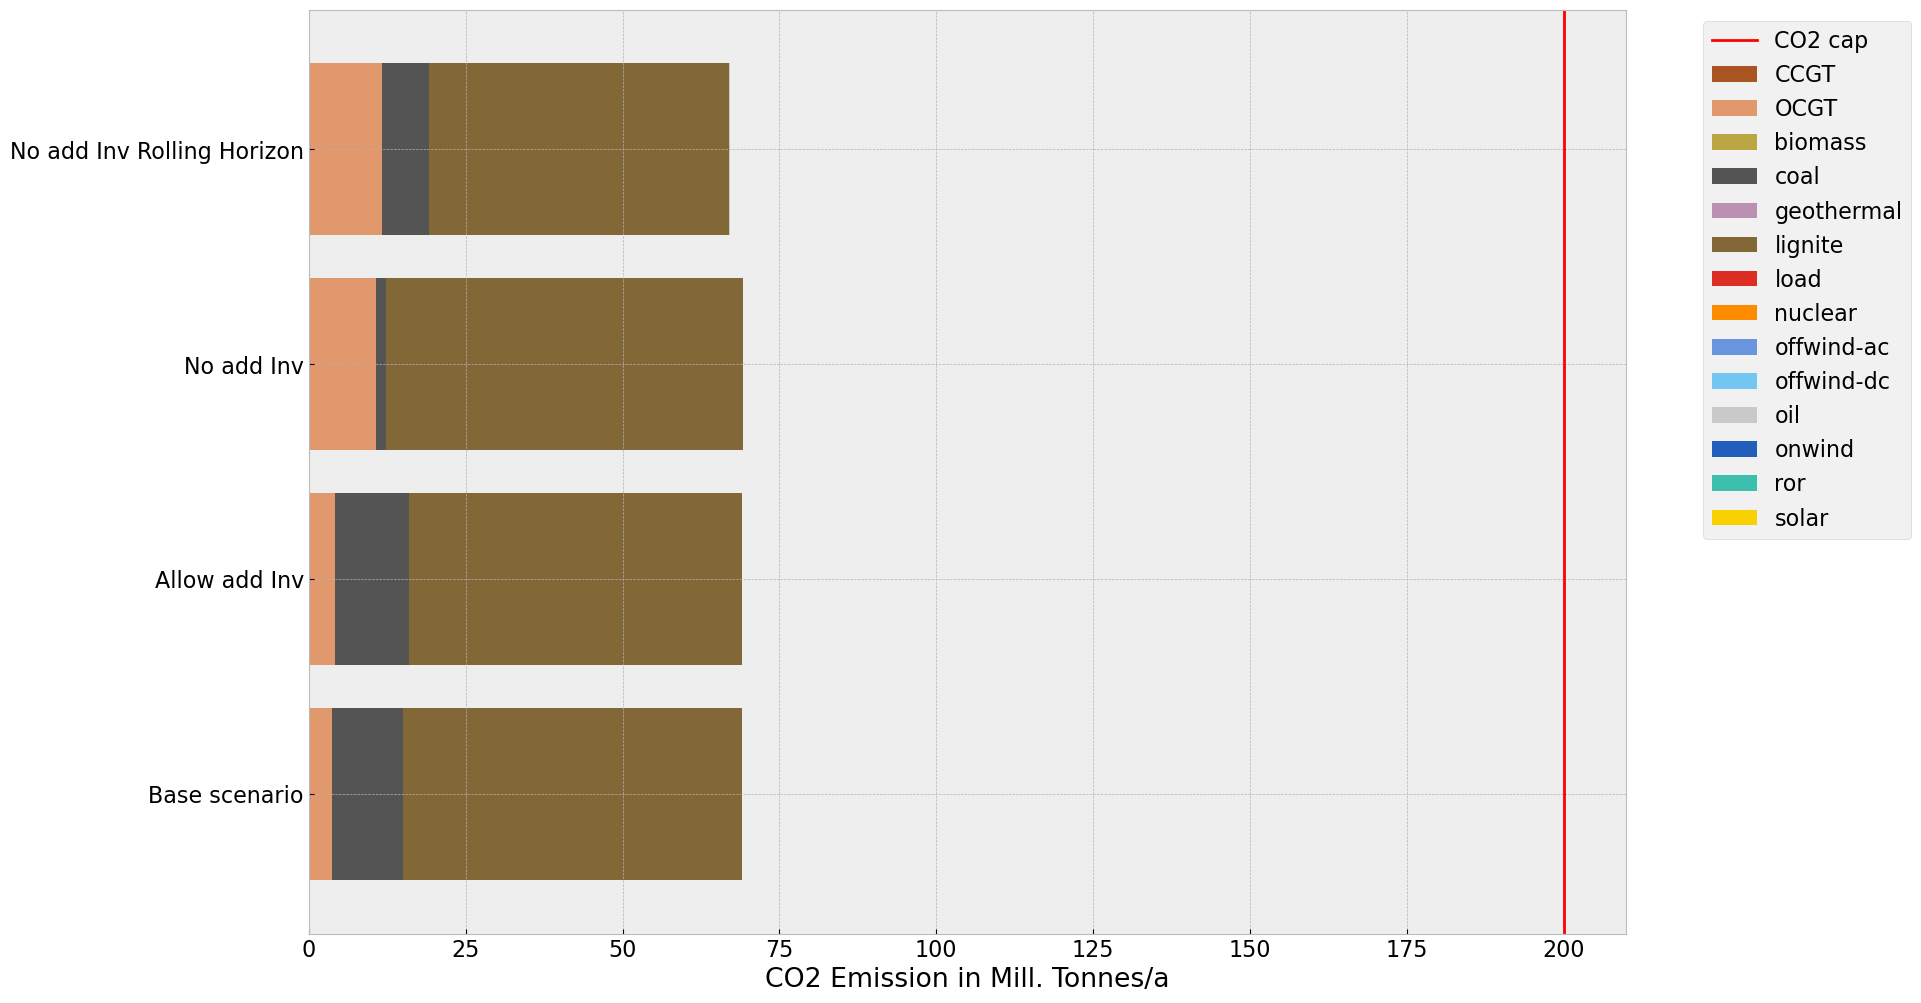

In [813]:
tech_comp = em_base.index.tolist()
comp_system_em = pd.DataFrame(index = ["Base scenario", "Allow add Inv", "No add Inv", "No add Inv Rolling Horizon"],
                                columns =tech_comp)

#demand = n.snapshot_weightings.generators @ n.loads_t.p_set.sum(axis=1) # the same in each scenario

comp_system_em.loc["Base scenario"] = em_base['emissions in Tonnes CO2']/1e6 # Mill. Tonnes CO2 /a
comp_system_em.loc["Allow add Inv"] = em_inv['emissions in Tonnes CO2'] /1e6 # Mill. Tonnes CO2 /a
comp_system_em.loc["No add Inv"] = em_noinv['emissions in Tonnes CO2'] /1e6 # Mill. Tonnes CO2 /a
comp_system_em.loc["No add Inv Rolling Horizon"] = em_noinv_roll['emissions in Tonnes CO2'] /1e6 # Mill. Tonnes CO2 /a

comp_system_em.fillna(0, inplace=True)

colors_comp = []

for i in range(len(comp_system_em.columns)):
    for j in range(len(n.carriers.index)):
        if comp_system_em.columns[i] == n.carriers.index[j]:
            colors_comp.append(n.carriers.color[j])
            #print(n.carriers.nice_name[j],comp_system_cost.columns[i],n.carriers.color[j])
            break  # break the inner loop once a match is found  



comp_system_em.plot.barh(figsize=(17,12),
                        color=colors_comp,
                        grid=True,
                        stacked=True,
                        ylabel="",
                        xlabel="CO2 Emission in Mill. Tonnes/a",
                        #title=f"Average system cost in different scenarios",
                        #xlim=[0,100],
                        width=0.8
)
#global_constraint
plt.axvline(x=n.global_constraints.loc['CO2Limit','constant']/1e6, color='r', linestyle='-', linewidth=2, label='CO2 cap')
# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()